# Project Description

This project aims to analyze and predict depression severity using the MADRS (Montgomery-Åsberg Depression Rating Scale) scores dataset. Through exploratory data analysis and predictive modeling, we seek to uncover insights and develop models that can assist in understanding and predicting depression states. Potential analyses include examining the distribution of MADRS scores, exploring correlations with demographic variables, identifying differences between patient groups, and building predictive models to estimate depression severity based on other features. This project contributes to the understanding of depression and may have implications for personalized treatment and interventions.

# EDA

### Descriptive Analysis

#### Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from tabulate import tabulate 
%matplotlib inline 
from warnings import filterwarnings
filterwarnings("ignore")

##### Importing the dataset and viewing the first 5 rows of the dataset

In [2]:
df_scores = pd.read_csv('scores.csv')
pd.set_option('display.max.columns', df_scores.shape[1])
df_scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


##### Viewing the last 5 columns

In [3]:
df_scores.tail()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
50,control_28,16,2,45-49,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
51,control_29,13,2,50-54,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
52,control_30,9,2,35-39,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
53,control_31,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
54,control_32,14,2,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


##### Display of the number of patients and the different characteristics of the database

In [4]:
print(f'There are {df_scores.shape[0]} patients in the database and {df_scores.shape[1]} variables')

There are 55 patients in the database and 12 variables


## Univariate Descriptive Analysis

1. Description of the different variables of the database. 
2. Identify the type of data that constitute the database.
3. Converting the data into its appropriate format.
4. Identify potential duplicates in the database.
5. Analyze and propose methods for dealing with missing data.
6. Display the descriptive statistics of the different variables. 
7. Identify trends in the different variables in the database.
8. Verify the normality of variables.

**1. Description of the different variables of the database**

- ``number`` : patient identifier

- ``days`` : number of days of measurements

- ``gender`` : 1 or 2 for female or male

- ``age`` : age in age groups

- ``afftype`` (affective disorder types) : 1: bipolar II, 2: unipolar depressive, 3: bipolar I

- ``melanch`` : 1: melancholia, 2: no melancholia

- ``inpatient`` :  1: inpatient, 2: outpatient

- ``edu`` : education grouped in years

- ``marriage`` : 1: married or cohabiting, 2: single

- ``work`` : 1: working or studying, 2: unemployed/sick leave/pension

- ``madrs1`` : MADRS score when measurement started

- ``madrs2`` : MADRS when measurement stopped

`afftype` (affective disorder types)

- ``Bipolar I``: Bipolar I is defined by episodes of mania that last for at least 7 days. You may also experience depressive episodes that last for 2 weeks or more, though depression may not occur in bipolar I.

- ``Bipolar II``: This type includes episodes of depression lasting at least 2 weeks along with milder mania, called hypomania.

- ``Unipolar``: Unipolar depression is another name for major depressive disorder. This mental health condition affects both mental and physical health.

`MADRS` : Montgomery-Åsberg Depression Rating Scale

*MADRS interpretation*

- ``0 to 6``: normal range (no depression)

- ``7 to 19`` : mild depression

- ``20 to 34``: moderate depression

- ``35 and greater``: severe depression

- ``60 or greater``: very severe depression

**2. Identification of the type of data**

##### Explore the distribution of MADRS scores

In [5]:
print(df_scores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB
None


##### Display the columns of the database

In [6]:
df_scores.columns

Index(['number', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient',
       'edu', 'marriage', 'work', 'madrs1', 'madrs2'],
      dtype='object')

##### Columns by type

In [7]:
for col in df_scores.select_dtypes('object'):
    print(f'{col:-<50} {df_scores[col].unique()}')

number-------------------------------------------- ['condition_1' 'condition_2' 'condition_3' 'condition_4' 'condition_5'
 'condition_6' 'condition_7' 'condition_8' 'condition_9' 'condition_10'
 'condition_11' 'condition_12' 'condition_13' 'condition_14'
 'condition_15' 'condition_16' 'condition_17' 'condition_18'
 'condition_19' 'condition_20' 'condition_21' 'condition_22'
 'condition_23' 'control_1' 'control_2' 'control_3' 'control_4'
 'control_5' 'control_6' 'control_7' 'control_8' 'control_9' 'control_10'
 'control_11' 'control_12' 'control_13' 'control_14' 'control_15'
 'control_16' 'control_17' 'control_18' 'control_19' 'control_20'
 'control_21' 'control_22' 'control_23' 'control_24' 'control_25'
 'control_26' 'control_27' 'control_28' 'control_29' 'control_30'
 'control_31' 'control_32']
age----------------------------------------------- ['35-39' '40-44' '45-49' '25-29' '50-54' '20-24' '60-64' '55-59' '30-34'
 '65-69']
edu----------------------------------------------- ['6-10' 

In [8]:
for col in df_scores.select_dtypes(float):
    print(col)

afftype
melanch
inpatient
marriage
work
madrs1
madrs2


In [9]:
for col in df_scores.select_dtypes(int):
    print(col)

days
gender


**3. Converting the data into its appropriate format**

##### Convert to categorical

In [10]:
df_scores['number'] = df_scores['number'].astype('category')
df_scores['gender'] = df_scores['gender'].astype('category')
df_scores['age'] = df_scores['age'].astype('category')
df_scores['afftype'] = df_scores['afftype'].astype('category')
df_scores['melanch'] = df_scores['melanch'].astype('category')
df_scores['inpatient'] = df_scores['inpatient'].astype('category')
df_scores['marriage'] = df_scores['marriage'].astype('category')
df_scores['edu'] = df_scores['edu'].astype('category')
df_scores['work'] = df_scores['work'].astype('category')

In [11]:
df_scores.dtypes

number       category
days            int64
gender       category
age          category
afftype      category
melanch      category
inpatient    category
edu          category
marriage     category
work         category
madrs1        float64
madrs2        float64
dtype: object

##### Convert the data

In [12]:
df_scores.gender = df_scores['gender'].cat.rename_categories({1.0: 'female', 2.0: 'male'})
age_mapping = {'35-39': 'middle-aged', '40-44': 'middle-aged', '45-49': 'middle-aged',
               '25-29': 'young', '50-54': 'middle-aged', '20-24': 'young',
               '60-64': 'elderly', '55-59': 'elderly', '30-34': 'young', '65-69': 'elderly'}
df_scores['age'] = df_scores['age'].map(age_mapping)
df_scores.afftype = df_scores['afftype'].cat.rename_categories({1.0: 'bipolar II', 2.0: 'unipolar', 3: 'bipolar I'})
df_scores.melanch = df_scores['melanch'].cat.rename_categories({1.0: 'melancholia', 2.0: 'No melancholia'})
df_scores.inpatient = df_scores['inpatient'].cat.rename_categories({1.0: 'inpatient', 2.0: 'outpatient'})
edu_mapping = {'6-10': 'primary', '11-15': 'secondary', '16-20': 'tertiary'}
df_scores['edu'] = df_scores['edu'].map(edu_mapping)
df_scores.marriage = df_scores['marriage'].cat.rename_categories({1.0: 'married/cohabitating', 2.0: 'single'})
df_scores.work = df_scores['work'].cat.rename_categories({1.0: 'Work/Study', 2.0: 'Unemployed/Sick leave/Pension'})

In [13]:
df_scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,male,middle-aged,unipolar,No melancholia,outpatient,primary,married/cohabitating,Unemployed/Sick leave/Pension,19.0,19.0
1,condition_2,18,male,middle-aged,bipolar II,No melancholia,outpatient,primary,single,Unemployed/Sick leave/Pension,24.0,11.0
2,condition_3,13,female,middle-aged,unipolar,No melancholia,outpatient,primary,single,Unemployed/Sick leave/Pension,24.0,25.0
3,condition_4,13,male,young,unipolar,No melancholia,outpatient,secondary,married/cohabitating,Work/Study,20.0,16.0
4,condition_5,13,male,middle-aged,unipolar,No melancholia,outpatient,secondary,single,Unemployed/Sick leave/Pension,26.0,26.0


**4. Checking for duplicates in the database**

In [14]:
duplicates =df_scores.duplicated()
print(f"Number of duplicated lines: {duplicates.sum()}")

Number of duplicated lines: 0


The database contains no duplicates

## Statistical description of the different variables of the database

Descriptive statistics allow us to know the distribution of the different variables in a given set. They give information about the central tendency characteristics such as the mean, mode, median, maximum and minimum of a numerical variable. In the case of categorical variables, we have the mode, and the relative frequencies.

**5. Analysis of missing data in the database**

##### Table of missing values by column

In [15]:
missing_values = df_scores.isnull().sum()
missing_percent = (missing_values / df_scores.shape[0]) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

           Missing Values  Percentage
number                  0    0.000000
days                    0    0.000000
gender                  0    0.000000
age                     0    0.000000
afftype                32   58.181818
melanch                35   63.636364
inpatient              32   58.181818
edu                    33   60.000000
marriage               32   58.181818
work                   32   58.181818
madrs1                 32   58.181818
madrs2                 32   58.181818


##### Graphic visualization of missing data

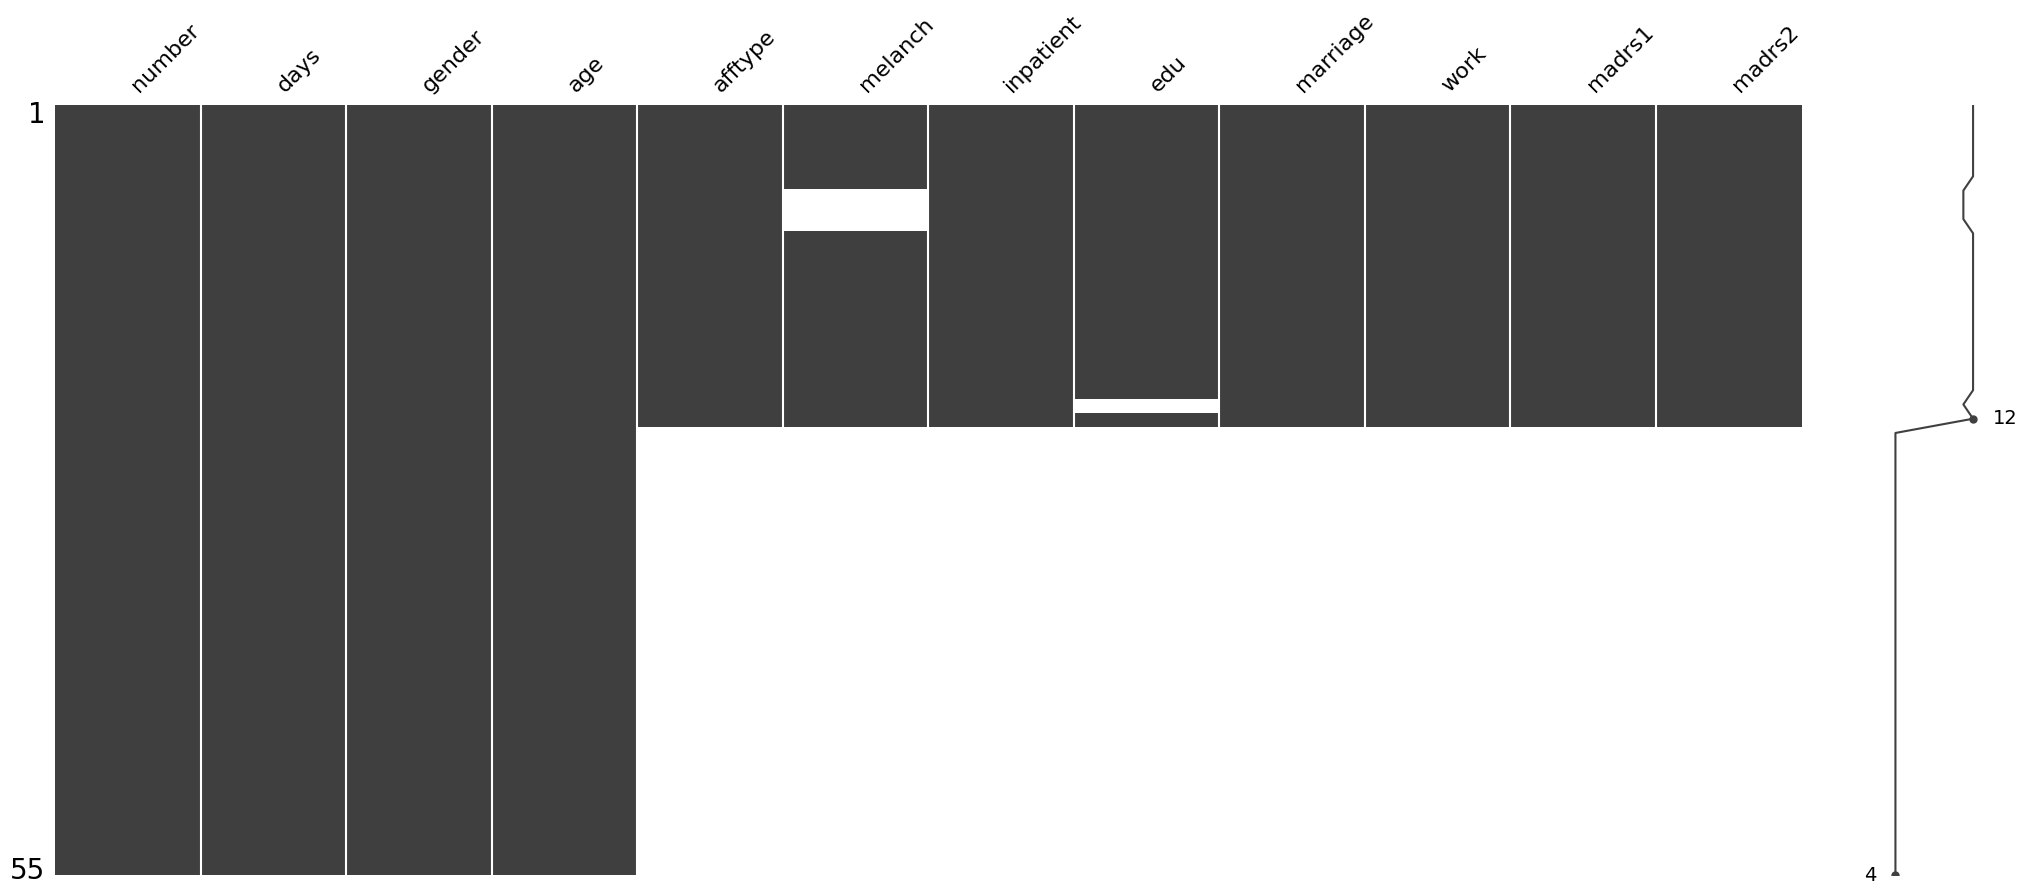

In [16]:
msno.matrix(df_scores)
plt.show()

##### Graphic visualization of missing data by group

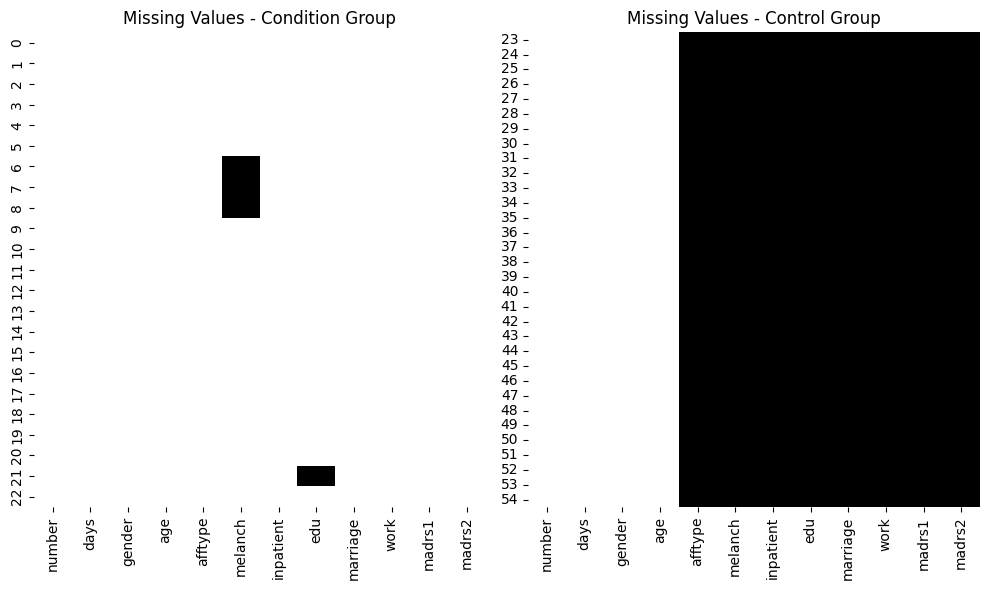

In [17]:
# Filter the DataFrame for participants in the condition group
condition_group = df_scores[df_scores['number'].str.startswith('condition')]

# Filter the 'number' column by group
condition_numbers = condition_group['number']
control_numbers = df_scores[~df_scores['number'].str.startswith('condition')]['number']

# Create a matrix of missing values for each group
missing_condition = condition_group.isnull()
missing_control = df_scores[df_scores['number'].isin(control_numbers)].isnull()

# Plot the missing values heatmap for each group
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(missing_condition, cbar=False, cmap='binary')
plt.title('Missing Values - Condition Group')

plt.subplot(1, 2, 2)
sns.heatmap(missing_control, cbar=False, cmap='binary')
plt.title('Missing Values - Control Group')

plt.tight_layout()
plt.show()

It appears that there is a pattern in the missing data, particularly in the 'Control' group, suggesting that it is not missing randomly (NMAR). This non-random missingness in the 'Control' group could potentially introduce bias and impact the reliability of the analysis conducted on the 'Condition' group. To address this, I will specifically examine the missingness within the 'Condition' group, which is the main focus of my analysis.

##### Analyze missingness: Compute the missingness statistics and patterns within the condition group to understand the extent and structure of missing data.

In [18]:
# Subset the dataframe for condition group
df_condition = condition_group.copy()

# Calculate missing values and percentage for the condition group
missing_values_condition = df_condition.isnull().sum()
missing_percent_condition = (missing_values_condition / df_condition.shape[0]) * 100

# Create a DataFrame to display missing values information for the condition group
missing_table_condition = pd.DataFrame({'Missing Values': missing_values_condition, 'Percentage': missing_percent_condition})
print(missing_table_condition)

           Missing Values  Percentage
number                  0    0.000000
days                    0    0.000000
gender                  0    0.000000
age                     0    0.000000
afftype                 0    0.000000
melanch                 3   13.043478
inpatient               0    0.000000
edu                     1    4.347826
marriage                0    0.000000
work                    0    0.000000
madrs1                  0    0.000000
madrs2                  0    0.000000


#### Missing values imputation methods

Given that the 'melanch' column represents two different categories (presence or absence of melancholia), the imputation methods used in this case are the Mode Imputation and the Frequent Category Imputation. These methods replace missing values with the most frequent category in the column.

*Mode Imputation*: Mode imputation replaces missing values with the mode, which is the most frequently occurring value in the non-missing values of a categorical variable. It is suitable when the variable has a clear dominant category or when you want to preserve the overall distribution of the variable.

*Frequent Category Imputation*: Frequent category imputation replaces missing values with the most frequent category of a categorical variable. Instead of considering the specific value, it focuses on the category that appears most often. This method is useful when the specific value itself is not as important as knowing which category is most common.

In summary, mode imputation considers the specific value that occurs most frequently, while frequent category imputation focuses on the category that appears most frequently. Both methods are used to fill missing values in categorical variables, but the approach may vary depending on the specific dataset and the context in which the variable is being analyzed.

**Mode Imputation**

In [19]:
# Calculate the mode
mode_value = df_condition['melanch'].mode()[0]

# Fill missing values with the mode
df_condition['melanch_mode'] = df_condition['melanch'].fillna(mode_value)

# Display the updated DataFrame
df_condition.isnull().mean()

number          0.000000
days            0.000000
gender          0.000000
age             0.000000
afftype         0.000000
melanch         0.130435
inpatient       0.000000
edu             0.043478
marriage        0.000000
work            0.000000
madrs1          0.000000
madrs2          0.000000
melanch_mode    0.000000
dtype: float64

**Frequent Category Imputation**

In [20]:
# Calculate the most frequent category
frequent_category = df_condition['melanch'].value_counts().idxmax()

# Fill missing values with the most frequent category
df_condition['melanch_frequent'] = df_condition['melanch'].fillna(frequent_category)

# Display the updated DataFrame
df_condition.isnull().mean()

number              0.000000
days                0.000000
gender              0.000000
age                 0.000000
afftype             0.000000
melanch             0.130435
inpatient           0.000000
edu                 0.043478
marriage            0.000000
work                0.000000
madrs1              0.000000
madrs2              0.000000
melanch_mode        0.000000
melanch_frequent    0.000000
dtype: float64

In [21]:
# Calculate the most frequent category
frequent_category = df_condition['edu'].value_counts().idxmax()

# Fill missing values with the most frequent category
df_condition['edu_frequent'] = df_condition['edu'].fillna(frequent_category)

# Display the updated DataFrame
df_condition.isnull().mean()

number              0.000000
days                0.000000
gender              0.000000
age                 0.000000
afftype             0.000000
melanch             0.130435
inpatient           0.000000
edu                 0.043478
marriage            0.000000
work                0.000000
madrs1              0.000000
madrs2              0.000000
melanch_mode        0.000000
melanch_frequent    0.000000
edu_frequent        0.000000
dtype: float64

**6. Display the descriptive statistics of the different variables**

In [22]:
# Select the columns of interest
selected_columns = ['melanch', 'melanch_mode', 'melanch_frequent', 'edu', 'edu_frequent']

# Get summary statistics for selected columns
summary = df_condition[selected_columns].describe()

# Print summary statistics
print(tabulate(summary, headers="keys", tablefmt="fancy_grid", numalign="center"))

╒════════╤════════════════╤════════════════╤════════════════════╤═════════╤════════════════╕
│        │ melanch        │ melanch_mode   │ melanch_frequent   │ edu     │ edu_frequent   │
╞════════╪════════════════╪════════════════╪════════════════════╪═════════╪════════════════╡
│ count  │ 20             │ 23             │ 23                 │ 22      │ 23             │
├────────┼────────────────┼────────────────┼────────────────────┼─────────┼────────────────┤
│ unique │ 2              │ 2              │ 2                  │ 3       │ 3              │
├────────┼────────────────┼────────────────┼────────────────────┼─────────┼────────────────┤
│ top    │ No melancholia │ No melancholia │ No melancholia     │ primary │ primary        │
├────────┼────────────────┼────────────────┼────────────────────┼─────────┼────────────────┤
│ freq   │ 19             │ 22             │ 22                 │ 12      │ 13             │
╘════════╧════════════════╧════════════════╧════════════════════╧═════

Both imputation methods resulted in similar distributions, with the majority of values being "No melancholia" in the imputed columns.

##### Descriptive statistics on numerical variables

In [23]:
summary = df_scores.describe()
print(tabulate(summary, headers="keys", tablefmt = "fancy_grid", numalign="center"))

╒═══════╤═════════╤══════════╤══════════╕
│       │  days   │  madrs1  │  madrs2  │
╞═══════╪═════════╪══════════╪══════════╡
│ count │   55    │    23    │    23    │
├───────┼─────────┼──────────┼──────────┤
│ mean  │  12.6   │ 22.7391  │    20    │
├───────┼─────────┼──────────┼──────────┤
│ std   │ 2.49147 │ 4.79789  │ 4.72902  │
├───────┼─────────┼──────────┼──────────┤
│ min   │    5    │    13    │    11    │
├───────┼─────────┼──────────┼──────────┤
│ 25%   │   13    │   18.5   │    16    │
├───────┼─────────┼──────────┼──────────┤
│ 50%   │   13    │    24    │    21    │
├───────┼─────────┼──────────┼──────────┤
│ 75%   │   13    │    26    │   24.5   │
├───────┼─────────┼──────────┼──────────┤
│ max   │   20    │    29    │    28    │
╘═══════╧═════════╧══════════╧══════════╛


##### Descriptive statistics on categorical variables

In [24]:
summary = df_scores.describe(include='category')
print(tabulate(summary, headers="keys", tablefmt = "fancy_grid", numalign="center"))

╒════════╤═════════════╤══════════╤═══════════╤════════════════╤═════════════╤════════════╤═══════════════════════════════╕
│        │ number      │ gender   │ afftype   │ melanch        │ inpatient   │ marriage   │ work                          │
╞════════╪═════════════╪══════════╪═══════════╪════════════════╪═════════════╪════════════╪═══════════════════════════════╡
│ count  │ 55          │ 55       │ 23        │ 20             │ 23          │ 23         │ 23                            │
├────────┼─────────────┼──────────┼───────────┼────────────────┼─────────────┼────────────┼───────────────────────────────┤
│ unique │ 55          │ 2        │ 3         │ 2              │ 2           │ 2          │ 2                             │
├────────┼─────────────┼──────────┼───────────┼────────────────┼─────────────┼────────────┼───────────────────────────────┤
│ top    │ condition_1 │ female   │ unipolar  │ No melancholia │ outpatient  │ single     │ Unemployed/Sick leave/Pension │
├───────

##### Distribution of MADRS Scores

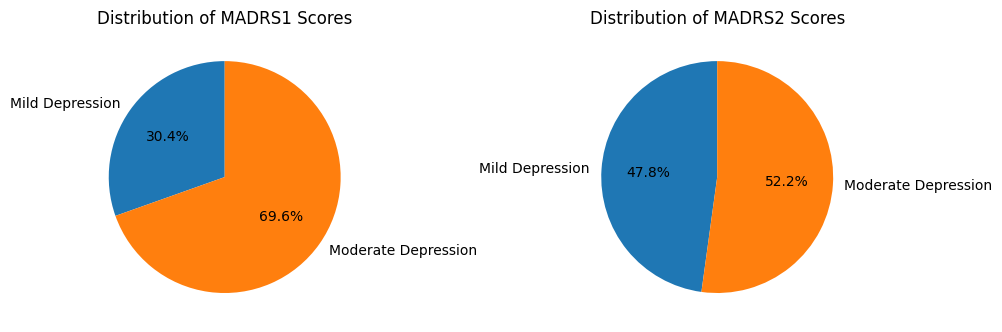

In [25]:
# Define the MADRS score categories
categories = {
    'Normal Range (No Depression)': (0, 6),
    'Mild Depression': (7, 19),
    'Moderate Depression': (20, 34),
    'Severe Depression': (35, float('inf')),
    'Very Severe Depression': (60, float('inf'))
}

# Count the occurrences of each MADRS1 score category
madrs1_counts = {category: 0 for category in categories.keys()}
for score in df_condition['madrs1']:
    for category, (lower, upper) in categories.items():
        if lower <= score <= upper:
            madrs1_counts[category] += 1

# Filter out categories with 0% occurrence
madrs1_counts_filtered = {category: count for category, count in madrs1_counts.items() if count != 0}

# Count the occurrences of each MADRS2 score category
madrs2_counts = {category: 0 for category in categories.keys()}
for score in df_condition['madrs2']:
    for category, (lower, upper) in categories.items():
        if lower <= score <= upper:
            madrs2_counts[category] += 1

# Filter out categories with 0% occurrence
madrs2_counts_filtered = {category: count for category, count in madrs2_counts.items() if count != 0}

# Create subplots for the pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create the pie chart for MADRS1
axes[0].pie(madrs1_counts_filtered.values(), labels=madrs1_counts_filtered.keys(), autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of MADRS1 Scores')

# Create the pie chart for MADRS2
axes[1].pie(madrs2_counts_filtered.values(), labels=madrs2_counts_filtered.keys(), autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of MADRS2 Scores')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

Overall, the comparison between MADRS1 and MADRS2 scores reveals a shift towards a higher prevalence of mild depression in the second measurement. This suggests that some patients experienced an improvement in their depressive symptoms between the two assessments.

**7. Identification of trends in the different variables in the database**

##### Gender distribution

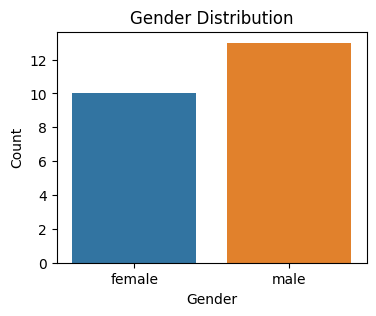

In [26]:
# Bar plot for gender distribution
plt.figure(figsize=(4, 3))
sns.countplot(data=df_condition, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### Age groups

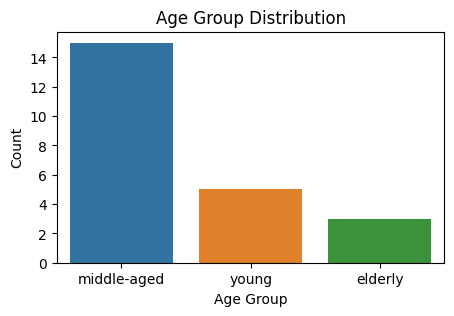

In [27]:
# Bar plot for age groups
plt.figure(figsize=(5, 3))
sns.countplot(data=df_condition, x='age')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

##### Affective disorder types

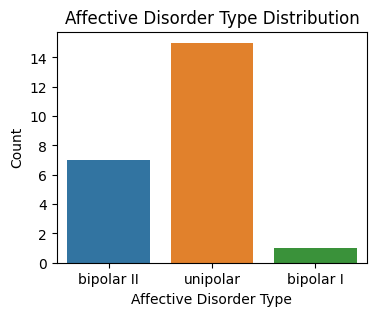

In [28]:
# Bar plot for affective disorder types
plt.figure(figsize=(4, 3))
sns.countplot(data=df_condition, x='afftype')
plt.title('Affective Disorder Type Distribution')
plt.xlabel('Affective Disorder Type')
plt.ylabel('Count')
plt.show()

##### Melancholia status

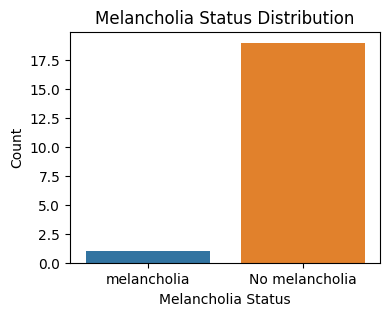

In [29]:
# Bar plot for melancholia status
plt.figure(figsize=(4, 3))
sns.countplot(data=df_condition, x='melanch')
plt.title('Melancholia Status Distribution')
plt.xlabel('Melancholia Status')
plt.ylabel('Count')
plt.show()

##### Inpatient status

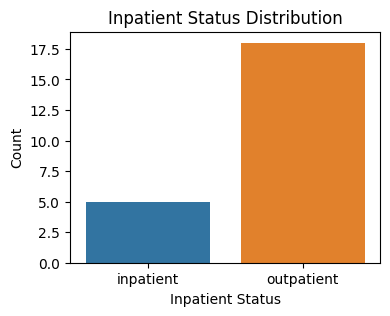

In [30]:
# Bar plot for inpatient status
plt.figure(figsize=(4, 3))
sns.countplot(data=df_condition, x='inpatient')
plt.title('Inpatient Status Distribution')
plt.xlabel('Inpatient Status')
plt.ylabel('Count')
plt.show()

##### Educational level

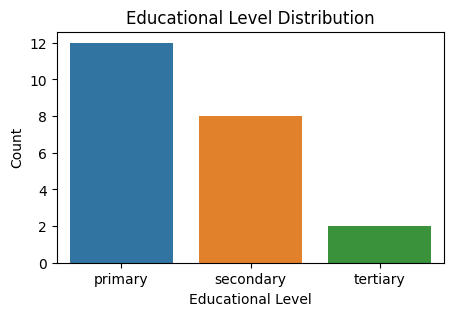

In [31]:
# Bar plot for educational level
plt.figure(figsize=(5, 3))
sns.countplot(data=df_condition, x='edu')
plt.title('Educational Level Distribution')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.show()

##### Marital status

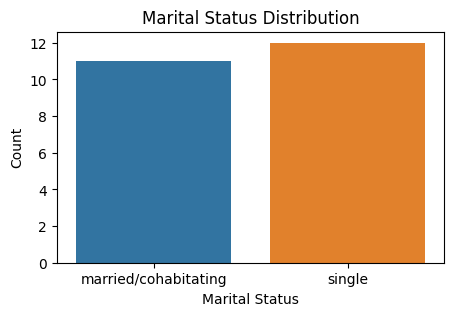

In [32]:
# Bar plot for marital status
plt.figure(figsize=(5, 3))
sns.countplot(data=df_condition, x='marriage')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

##### Work status

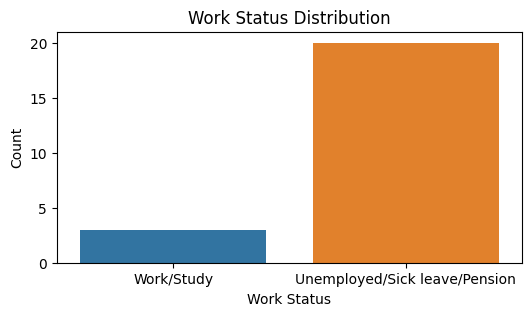

In [33]:
# Bar plot for work status
plt.figure(figsize=(6, 3))
sns.countplot(data=df_condition, x='work')
plt.title('Work Status Distribution')
plt.xlabel('Work Status')
plt.ylabel('Count')
plt.show()

##### MADRS scores

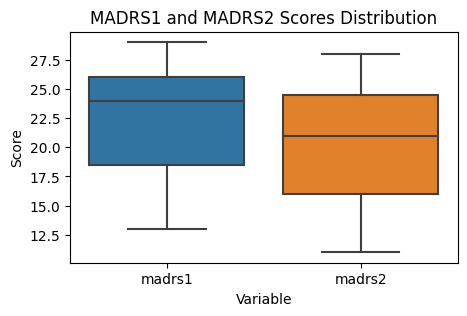

In [34]:
# Box plot for MADRS1 and MADRS2 scores
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_condition[['madrs1', 'madrs2']])
plt.title('MADRS1 and MADRS2 Scores Distribution')
plt.xlabel('Variable')
plt.ylabel('Score')
plt.show()

**7. Statistical tests performed to verify the normality of the variables**

In [35]:
# Imports
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

##### Histograms and density curves

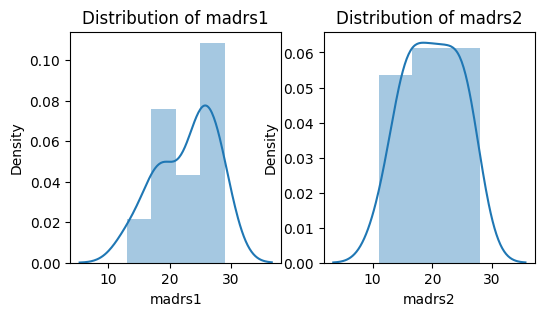

In [36]:
df_numeric = df_condition[['madrs1', 'madrs2']]
fig, ax = plt.subplots(1, 2, figsize = (6, 3))
for i, col in enumerate(df_numeric):
    sns.distplot(df_numeric[col], ax = ax[i])
    ax[i].set_title(f"Distribution of {col}");

We can observe on these graphs that the data are not normally distributed because the distribution curves are not Gaussian.

##### QQ plot (Quantile-Quantile plot)

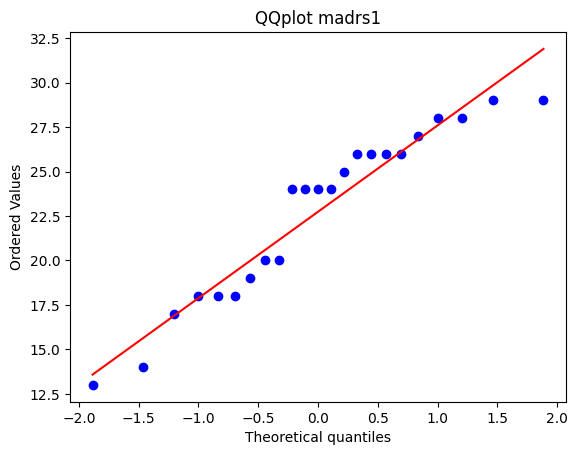

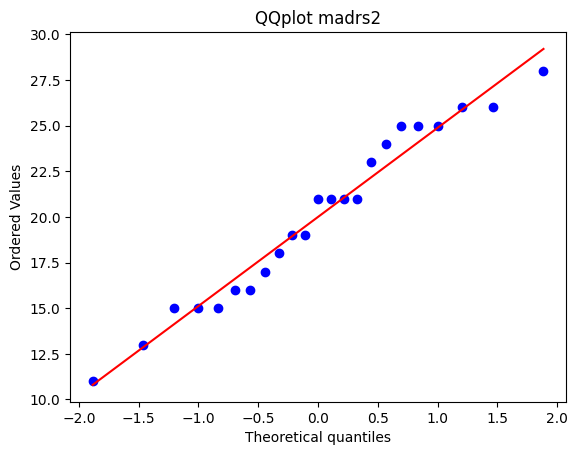

In [37]:
for col in df_numeric:
    plt.figure()
    stats.probplot(df_numeric[col], plot=plt)
    plt.title(f"QQplot {col}");

The results obtained from the QQ plots provide initial support for the hypothesis regarding the distribution of the variables. However, it is essential to perform formal normality tests to further validate these findings.

##### Using Statistical Tests to Check for Normality

To evaluate the normality of a distribution, various indicators are employed, including:

- Skewness: Skewness measures the symmetry of a variable's distribution. In a normal distribution, the skewness is zero. If the calculated skewness of a variable deviates significantly from zero, it suggests that the variable may not follow a normal distribution.

- Kurtosis: Kurtosis quantifies the shape of a distribution, specifically the degree of peakedness or flatness. A normal distribution has a kurtosis of 3. Negative kurtosis between 0 and 3 indicates a rightward flattening, while kurtosis between 0 and -3 suggests a leftward flattening.

- Excess Kurtosis: Excess kurtosis measures the difference between the kurtosis of a normal distribution and the kurtosis of the observed data. It provides a relative measure of how the observed distribution deviates from a normal distribution, although it lacks a specific interpretation.

In [38]:
# Calculation of skewness and kurtosis
def skew_kurtosis(data): 
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data,fisher=False) #Kurtosis
    excess_kurtosis = stats.kurtosis(data) #Excess Kurtosis
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Excess Kurtosis: {excess_kurtosis}")

In [39]:
skew_kurtosis(df_numeric['madrs1'])

Skewness: -0.4945490965860451
Kurtosis: 2.076806563971743
Excess Kurtosis: -0.923193436028257


In [40]:
skew_kurtosis(df_numeric['madrs2'])

Skewness: -0.08701246140195967
Kurtosis: 1.933769581598255
Excess Kurtosis: -1.066230418401745


The results provided by the calculation of skewness and kurtosis clearly show that the data are not symmetrically distributed. It will therefore be necessary to confirm these results with normality tests on these data.

#### Statistical tests performed to verify the normality of the variables

Some important considerations regarding statistical tests:

A statistical test measures the discrepancy between our sample statistic and the hypothetical population parameter in terms of the estimated standard error.

In a statistical test, the statement being examined represents our null hypothesis. If we reject the null hypothesis, we are essentially falsifying it. If the observed data is ambiguous or not strongly inconsistent with the null hypothesis, we do not reject the null hypothesis.

There are two types of errors in a statistical test:

- Type I error (false positive): It occurs when the null hypothesis is true, but mistakenly rejected (𝑝(𝐻¯0/𝐻0)).
- Type II error (false negative): It occurs when the null hypothesis is not rejected despite being false (𝑝(𝐻¯1/𝐻1)) or even when the alternative hypothesis is rejected, knowing it to be true.

These two errors are fundamental aspects of hypothesis testing in statistics. Additionally, the power of the test is another important property, which refers to the probability of committing a Type II error.

Most traditional statistical inference methods aim to strictly control the probability of Type I error, typically set at 5%, also known as the critical probability used throughout this analysis.

| Test                 | Advantages                                                | Disadvantages                                           | Conditions of Use                                      |
|:---------------------|:---------------------------------------------------------|:--------------------------------------------------------|:-------------------------------------------------------|
| Shapiro-Wilk         | - Powerful and precise<br>- Recommended for small sample sizes | - Less suitable for large sample sizes                | - Small and medium-sized samples                       |
| Kolmogorov-Smirnov   | - Can be used for larger sample sizes                     | - Less powerful than the Shapiro-Wilk test            | - Samples of all sizes                                 |
| Lilliefors           | - Suitable for small sample sizes                          | - Less precise and powerful than the Shapiro-Wilk test | - Small sample sizes                                   |
| Anderson-Darling     | - Sensitive to deviations in the tails of the distribution  | - May be less powerful for small sample sizes          | - Samples of all sizes                                 |
| D'Agostino-Pearson   | - Detects asymmetries and variations in kurtosis           | - Less powerful than the Shapiro-Wilk test            | - Samples of all sizes                                 |

In [41]:
def normal_test(alpha, data):
 # Perform normality tests
    shapiro_test = stats.shapiro(data)
    ks_test = stats.kstest(data, 'norm')
    ad_test = stats.anderson(data, dist='norm')
    dagostino_test = stats.normaltest(data)
    lilliefors_test = lilliefors(data, dist='norm')

    # Create pandas array with test results
    test_results = pd.DataFrame({
        'Test name': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
        'Test statistics': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
        'p-value': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
        'Normality': ['Yes' if shapiro_test[1] > alpha else 'No',
                    'Yes' if ks_test.pvalue > alpha else 'No',
                    'Yes' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'No',
                    'Yes' if dagostino_test.pvalue > alpha else 'No',
                    'Yes' if lilliefors_test[1] > alpha else 'No']
    })

    print(test_results);

In [42]:
print(normal_test(0.05, df_condition['madrs1']))

            Test name  Test statistics   p-value Normality
0        Shapiro-Wilk         0.919411  0.064713       Yes
1  Kolmogorov-Smirnov         1.000000  0.000000        No
2    Anderson-Darling         0.731105       NaN       Yes
3  D'Agostino-Pearson         2.420384  0.298140       Yes
4          Lilliefors         0.212342  0.009009        No
None


In [43]:
print(normal_test(0.05, df_numeric['madrs2']))

            Test name  Test statistics   p-value Normality
0        Shapiro-Wilk         0.959757  0.458484       Yes
1  Kolmogorov-Smirnov         1.000000  0.000000        No
2    Anderson-Darling         0.371529       NaN       Yes
3  D'Agostino-Pearson         2.150613  0.341193       Yes
4          Lilliefors         0.115683  0.582771       Yes
None


Conclusion: "madrs1" does not follow a normal distribution according to the Kolmogorov-Smirnov and Lilliefors tests, while "madrs2" does not follow a normal distribution according to the Kolmogorov-Smirnov test. The Shapiro-Wilk and D'Agostino-Pearson tests suggest that both variables follow a normal distribution. However, it is worth noting that the Anderson-Darling test does not provide clear conclusions in both cases due to the absence of critical values.

## Bivariate Descriptive Analysis

In this section, we will:

1. Perform correlation analyses between quantitative variables.

2. Conduct correlation tests between quantitative variables.

**1. Analysis of the relationship between two quantitative variables**

In [44]:
# Import
import scipy.stats as st

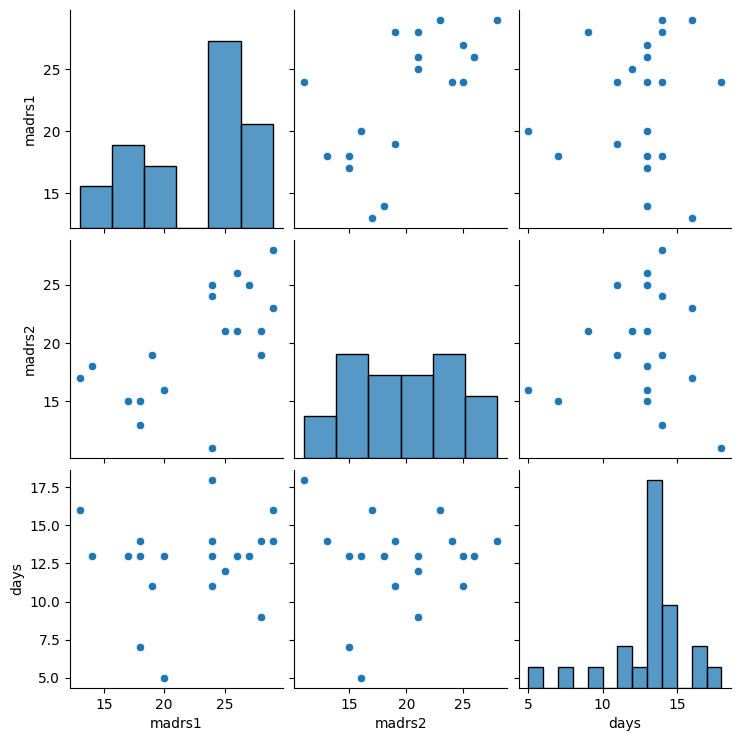

In [45]:
sns.pairplot(df_condition[['madrs1', 'madrs2', 'days']]);

##### Correlation Matrix

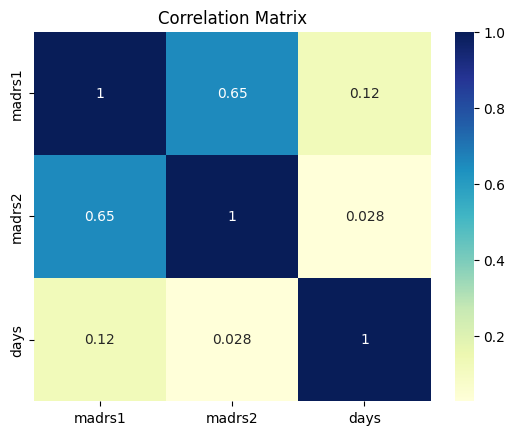

In [46]:
# Correlation Matrix
# Obtaining the correlation table and the heatmap
corr_matrix = df_condition[['madrs1', 'madrs2', 'days']].corr()

# Plotting the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Printing the correlation matrix
print(corr_matrix)

          madrs1    madrs2      days
madrs1  1.000000  0.653090  0.122678
madrs2  0.653090  1.000000  0.027726
days    0.122678  0.027726  1.000000


The correlation analysis reveals important insights about the variables in question. Firstly, there is a moderate positive relationship between the initial and final MADRS scores ('madrs1' and 'madrs2'), indicating some consistency in depression levels over time. This suggests that individuals who scored higher on the MADRS scale at the beginning also tended to have higher scores at the end of the measurement period.

However, when examining the relationship between the duration of measurements ('days') and the MADRS scores, the correlation is weak. This implies that the length of time the measurements were taken has minimal impact on the depression scores. Given this weak correlation coefficient (0.027726), it would be reasonable to exclude 'days' from the correlation tests. By doing so, the focus can be placed on the variables that are more directly related to the measurement of depression levels ('madrs1' and 'madrs2').

**2. Correlation test**

#### Pearson Correlation Test

**Hypotheses**:
- $H_{0}$ (null hypothesis): There is no linear correlation between the two variables.
- $H_{1}$ (alternative hypothesis): There is a linear correlation between the two variables.

**Conditions of use**:
- Both variables are quantitative and measured on a continuous scale.
- The relationship between the two variables is linear.
- Both variables follow a normal distribution.

**Interpretation**:
- The Pearson correlation coefficient ranges from -1 to 1.
- If the coefficient is close to 1 (e.g., 0.6), there is a positive correlation between the variables.
- If the coefficient is close to -1 (e.g., -0.6), there is a negative correlation between the variables.
- If the coefficient is close to 0, there is no linear correlation between the variables.
- You can also examine the p-value of the test, which represents the significance threshold below which the null hypothesis H0 is not valid:
  - If p < 0.05, we reject H0 and conclude that there is a significant correlation between the variables.
  - If p ≥ 0.05, we cannot reject H0 and conclude that there is not enough evidence to claim a significant correlation between the variables.


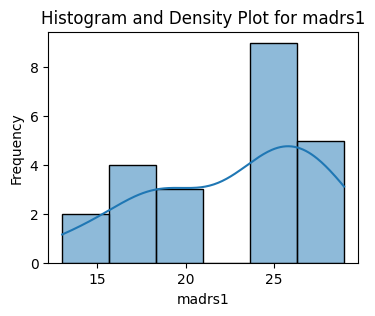

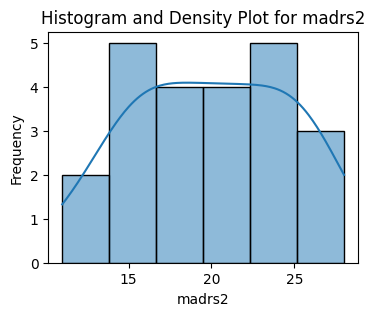

P-value of normality (Shapiro-Wilk) for madrs1: 0.06471284478902817
P-value of normality (Shapiro-Wilk) for madrs2: 0.45848405361175537


In [48]:
# Normality analysis using Shapiro-Wilk test
from scipy.stats import shapiro

# Quantitative variables of interest
var1 = 'madrs1'
var2 = 'madrs2'

# Graphical analysis of the normality of the two variables
for var in [var1, var2]:
    plt.figure(figsize=(4, 3))
    sns.histplot(df_numeric[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f"Histogram and Density Plot for {var}")
    plt.show()

# Checking normality using Shapiro-Wilk test
for var in [var1, var2]:
    _, p_value = shapiro(df_condition[var])
    print(f"P-value of normality (Shapiro-Wilk) for {var}: {p_value}")

**MADRS1 Scores**: The p-value of 0.0647 for MADRS1 suggests that the distribution of scores is not significantly different from a normal distribution at a conventional significance level (e.g., α = 0.05). Therefore, we cannot reject the null hypothesis that the MADRS1 scores are normally distributed.

**MADRS2 Scores**: Similarly, the p-value of 0.4585 for MADRS2 indicates that the distribution of scores is not significantly different from a normal distribution at a conventional significance level. Hence, we fail to reject the null hypothesis that the MADRS2 scores are normally distributed.

In [49]:
from scipy.stats import pearsonr

var1 = 'madrs1'
var2 = 'madrs2'

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_numeric[var1], df_numeric[var2])

# Print the results
print("Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.6530903785627606
P-value: 0.0007284900186512564


The Pearson correlation analysis between 'madrs1' and 'madrs2' yields a correlation coefficient of 0.653 and a p-value of 0.001. This indicates a moderate positive correlation between the initial ('madrs1') and final ('madrs2') MADRS scores. The correlation coefficient suggests that there is some consistency in depression levels over time, as higher scores on 'madrs1' are associated with higher scores on 'madrs2'. The p-value indicates that this correlation is statistically significant, further supporting the presence of a meaningful relationship between the two variables.

#### Spearman Correlation Test

**Hypotheses**:

- $H_{0}$: There is no monotonic correlation between the two variables.
- $H_{1}$: There is a monotonic correlation between the two variables.

**Conditions of Use**:

- Both variables are quantitative or ordinal.
- The data does not need to be normally distributed.
- The relationship between the variables can be monotonic (linear or non-linear).

**Interpretation**:

The Spearman correlation coefficient ranges between -1 and 1.

- If the coefficient is close to 1 (e.g., 0.6), there is a positive correlation between the variables.
- If the coefficient is close to -1 (e.g., -0.6), there is a negative correlation between the variables.
- If the coefficient is close to 0, there is no monotonic correlation (linear or non-linear) between the variables.

You can also examine the p-value of the test:

- If $p < 0.05$, we reject $H_{0}$ and conclude that there is a significant monotonic correlation between the two variables.
- If $p \geq 0.05$, we fail to reject $H_{0}$ and conclude that there is not enough evidence to claim a significant monotonic correlation between the two variables.

In [50]:
from scipy.stats import spearmanr

corr_spearman, p_value_spearman = spearmanr(df_condition['madrs1'], df_condition['madrs2'])
print("Spearman Correlation Coefficient:", corr_spearman)
print("P-value (Spearman):", p_value_spearman)

Spearman Correlation Coefficient: 0.6785007633137881
P-value (Spearman): 0.0003725387214173992


The Spearman correlation coefficient between the variables 'madrs1' and 'madrs2' is 0.6785. This indicates a moderate positive monotonic relationship between the variables. The p-value associated with the Spearman correlation test is 0.0004, which is less than the conventional significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that there is a statistically significant monotonic correlation between 'madrs1' and 'madrs2'.

#### Kendall's Correlation Test

**Hypotheses**:
- $H_{0}$: There is no **monotonic correlation** between the two variables.
- $H_{1}$: There is a monotonic correlation between the two variables.

**Terms of use**:
- The two variables are quantitative or ordinal.
- The data does not need to be normally distributed.
- The relationship between the variables can be monotonous (linear or non-linear).


**Interpretation**:

Kendall's correlation coefficient varies between -1 and 1.
- If the coefficient is close to 1 (a threshold at 70%), there is a positive correlation between the variables.
- If the coefficient is close to -1, there is a negative correlation between the variables.
- If the coefficient is close to 0, there is no monotonic correlation between the variables

You can also examine the p-value of the test:

- If $p < 0.05$, we reject H0 and we conclude that there is a significant monotonic correlation between the two variables.
- If $p \geq 0.05$, we cannot reject H0 and we conclude that there is not enough evidence to say that there is a significant monotonic correlation between the two variables.

In [51]:
from scipy.stats import kendalltau

corr_kendall, p_value_kendall = kendalltau(df_condition['madrs1'], df_condition['madrs2'])
print("Kendall's Correlation Coefficient:", corr_kendall)
print("P-value (Kendall):", p_value_kendall)

Kendall's Correlation Coefficient: 0.47781087910186004
P-value (Kendall): 0.0024537656877812756


The Kendall's correlation coefficient between the variables 'madrs1' and 'madrs2' is 0.4778. This indicates a moderate positive relationship between the variables based on Kendall's rank correlation. The p-value associated with the Kendall's correlation test is 0.0025, which is less than the conventional significance level of 0.05. Therefore, we can reject the null hypothesis and conclude that there is a statistically significant correlation between 'madrs1' and 'madrs2' based on Kendall's correlation coefficient.

## Contingency analysis

In this section, we will:

1. Perform an analysis of the association between two qualitative variables.

2. Conduct tests of association between two qualitative variables.

#### Chi-Square Test (chi2)

**Hypotheses**:

- $H_{0}$(null hypothesis): There is no association between the two qualitative variables.
- $H_{1}$(alternative hypothesis): There is an association between the two qualitative variables.

**Conditions of Use**:

- Both variables are qualitative (categorical).
- The expected frequencies are greater than 5 for each variable combination.

**Interpretation**:

If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is an association between the two qualitative variables.

#### Cramér's V Coefficient

The Cramér's V coefficient measures the strength of association between two qualitative variables. It ranges from 0 (no association) to 1 (perfect association).

**Conditions of Use**:

- Both variables are qualitative (categorical).
- The chi-square test has already been conducted and has shown a significant association between the two variables.

**Interpretation**:

The closer the value of Cramér's V is to 1 (greater than 0.60), the stronger the association between the two variables.

#### Tschuprow's T Coefficient
The Tschuprow's T coefficient is a measure of association between two qualitative variables. It is based on the chi-square (χ²) test and takes into account the sample size and the number of categories in each variable.

**Hypotheses**:

- $H_{0}$(null hypothesis): There is no association between the two qualitative variables.
- $H_{1}$(alternative hypothesis): There is an association between the two qualitative variables.

**Conditions of Use**:

- The variables are qualitative.
- The observations are independent.
- The cell frequencies in the contingency table are sufficient (typically, each cell should have a frequency of at least 5).

**Interpretation**:

Tschuprow's T coefficient ranges from 0 to 1. A value close to 0 indicates a weak association between the two variables, while a value close to 1 indicates a strong association. The strength of the association depends on the context and discipline, but generally, a value above 0.3 is considered a moderate association, and a value above 0.5 is considered a strong association.

##### Affective Disorder Types

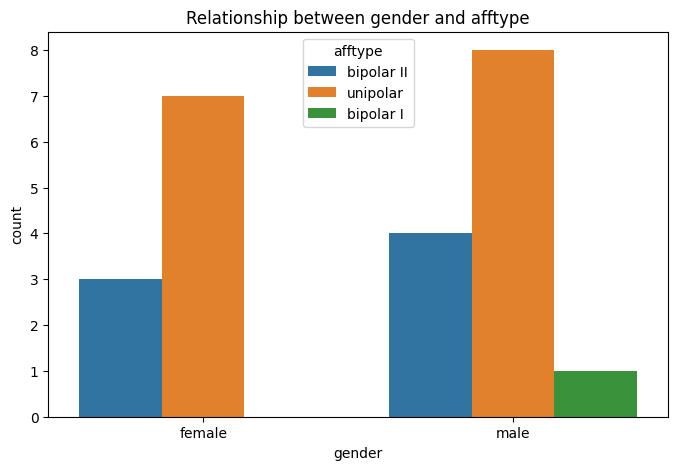

Contingency Table (Observed Frequencies):
afftype  bipolar II  unipolar  bipolar I
gender                                  
female            3         7          0
male              4         8          1


Expected Frequencies:
[[3.04347826 6.52173913 0.43478261]
 [3.95652174 8.47826087 0.56521739]]


Chi-square Statistic: 0.8323809523809524
P-value: 0.6595546290657642
Degrees of Freedom: 2
Cramer's V Coefficient: 0.1902379462422684
Tschuprow's T Coefficient: 0.1902379462422684
P-value: 0.6595546290657642


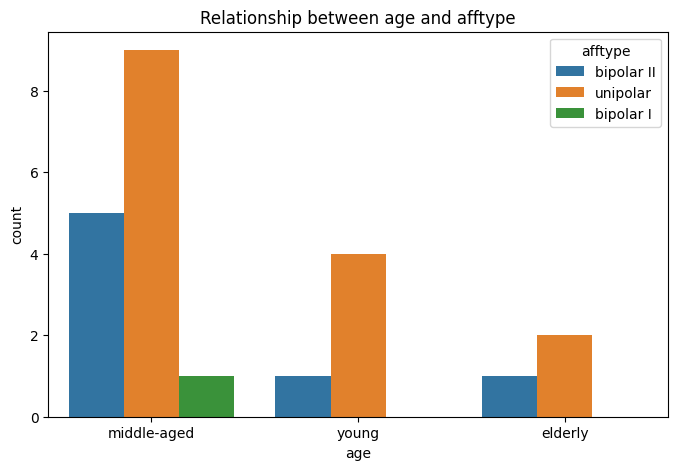

Contingency Table (Observed Frequencies):
afftype      bipolar II  unipolar  bipolar I
age                                         
elderly               1         2          0
middle-aged           5         9          1
young                 1         4          0


Expected Frequencies:
[[0.91304348 1.95652174 0.13043478]
 [4.56521739 9.7826087  0.65217391]
 [1.52173913 3.26086957 0.2173913 ]]


Chi-square Statistic: 0.9930158730158732
P-value: 0.9108531558035614
Degrees of Freedom: 4
Cramer's V Coefficient: 0.14692617733849062
Tschuprow's T Coefficient: 0.14692617733849062
P-value: 0.9108531558035614


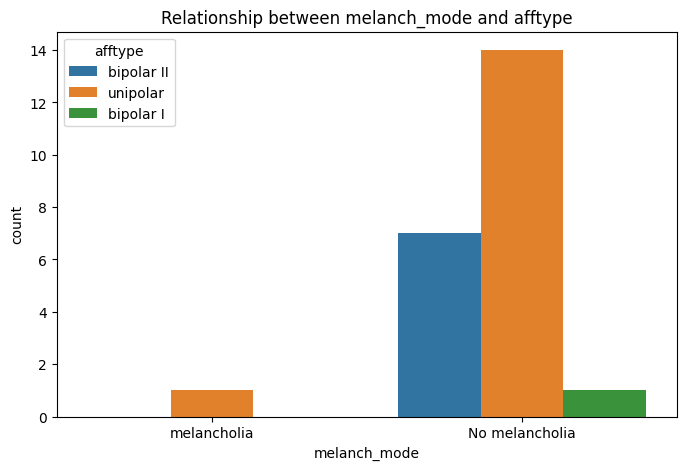

Contingency Table (Observed Frequencies):
afftype         bipolar II  unipolar  bipolar I
melanch_mode                                   
melancholia              0         1          0
No melancholia           7        14          1


Expected Frequencies:
[[ 0.30434783  0.65217391  0.04347826]
 [ 6.69565217 14.34782609  0.95652174]]


Chi-square Statistic: 0.5575757575757575
P-value: 0.7567003983979501
Degrees of Freedom: 2
Cramer's V Coefficient: 0.1556997888323046
Tschuprow's T Coefficient: 0.1556997888323046
P-value: 0.7567003983979501


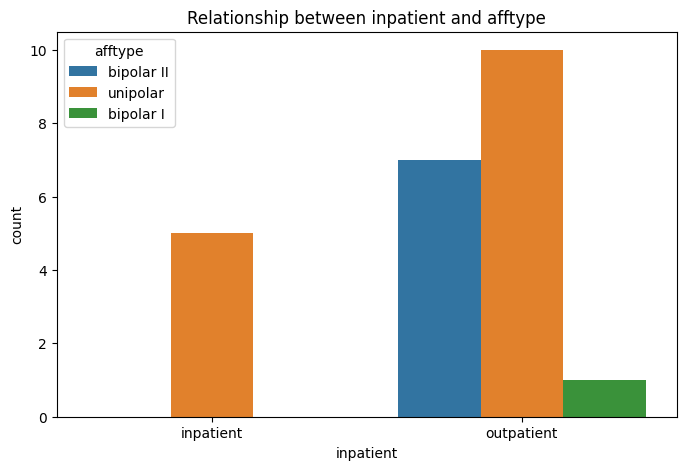

Contingency Table (Observed Frequencies):
afftype     bipolar II  unipolar  bipolar I
inpatient                                  
inpatient            0         5          0
outpatient           7        10          1


Expected Frequencies:
[[ 1.52173913  3.26086957  0.2173913 ]
 [ 5.47826087 11.73913043  0.7826087 ]]


Chi-square Statistic: 3.4074074074074074
P-value: 0.18200816983606136
Degrees of Freedom: 2
Cramer's V Coefficient: 0.3849001794597505
Tschuprow's T Coefficient: 0.3849001794597505
P-value: 0.18200816983606136


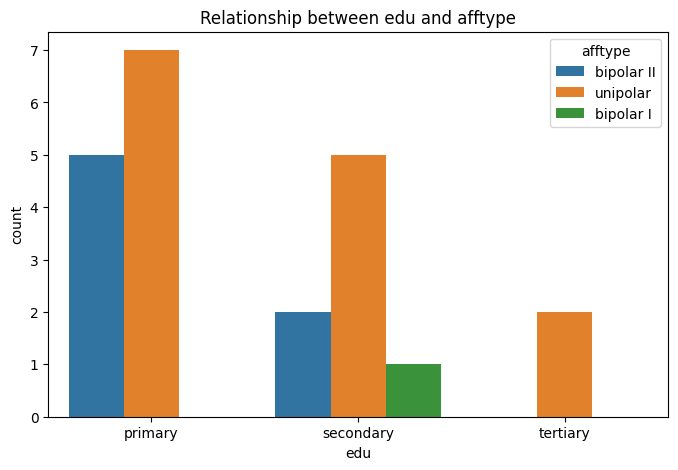

Contingency Table (Observed Frequencies):
afftype    bipolar II  unipolar  bipolar I
edu                                       
primary             5         7          0
secondary           2         5          1
tertiary            0         2          0


Expected Frequencies:
[[3.81818182 7.63636364 0.54545455]
 [2.54545455 5.09090909 0.36363636]
 [0.63636364 1.27272727 0.09090909]]


Chi-square Statistic: 3.339285714285714
P-value: 0.5027319492271369
Degrees of Freedom: 4
Cramer's V Coefficient: 0.27548658250966984
Tschuprow's T Coefficient: 0.2694311928895081
P-value: 0.5027319492271369


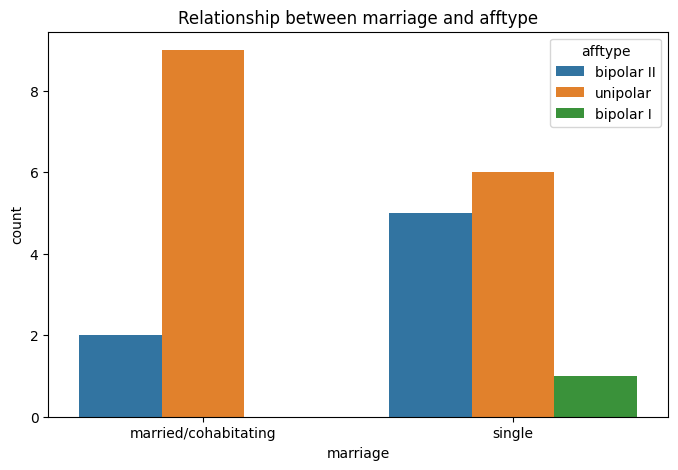

Contingency Table (Observed Frequencies):
afftype               bipolar II  unipolar  bipolar I
marriage                                             
married/cohabitating           2         9          0
single                         5         6          1


Expected Frequencies:
[[3.34782609 7.17391304 0.47826087]
 [3.65217391 7.82608696 0.52173913]]


Chi-square Statistic: 2.8476190476190477
P-value: 0.24079495330338282
Degrees of Freedom: 2
Cramer's V Coefficient: 0.3518657752744984
Tschuprow's T Coefficient: 0.3518657752744984
P-value: 0.24079495330338282


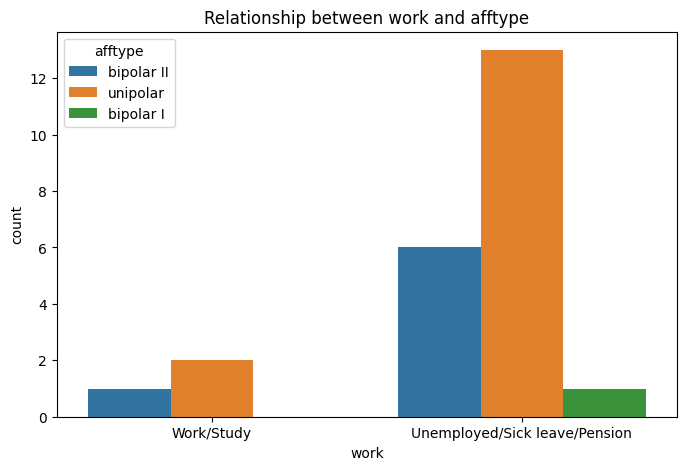

Contingency Table (Observed Frequencies):
afftype                        bipolar II  unipolar  bipolar I
work                                                          
Work/Study                              1         2          0
Unemployed/Sick leave/Pension           6        13          1


Expected Frequencies:
[[ 0.91304348  1.95652174  0.13043478]
 [ 6.08695652 13.04347826  0.86956522]]


Chi-square Statistic: 0.16063492063492066
P-value: 0.9228233400896559
Degrees of Freedom: 2
Cramer's V Coefficient: 0.0835710894037345
Tschuprow's T Coefficient: 0.0835710894037345
P-value: 0.9228233400896559


In [52]:
from scipy.stats import chi2_contingency

def plot_relationship(data, variable1, variable2):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=variable1, hue=variable2)
    plt.xlabel(variable1)
    plt.title(f"Relationship between {variable1} and {variable2}")
    plt.show()

def calculate_coefficients(contingency_table, chi2_stat, data):
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))
    print("Cramer's V Coefficient:", cramer_v)

    n = data.shape[0]
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    tschuprow_t = np.sqrt(chi2 / (n * min_dim))
    print("Tschuprow's T Coefficient:", tschuprow_t)
    print("P-value:", p_value)

def qualitative_variable_analysis(data, variable1, variable2):
    plot_relationship(data, variable1, variable2)

    contingency_table = pd.crosstab(data[variable1], data[variable2])
    print("Contingency Table (Observed Frequencies):")
    print(contingency_table)
    print("\n")

    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    print("Expected Frequencies:")
    print(expected_freq)
    print("\n")
    print("Chi-square Statistic:", chi2_stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)

    calculate_coefficients(contingency_table, chi2_stat, data)

qualitative_variable_analysis(df_condition, 'gender', 'afftype')
qualitative_variable_analysis(df_condition, 'age', 'afftype')
qualitative_variable_analysis(df_condition, 'melanch_mode', 'afftype')
qualitative_variable_analysis(df_condition, 'inpatient', 'afftype')
qualitative_variable_analysis(df_condition, 'edu', 'afftype')
qualitative_variable_analysis(df_condition, 'marriage', 'afftype')
qualitative_variable_analysis(df_condition, 'work', 'afftype')

Based on the analysis outputs:

1. Gender and Afftype:

- There is no significant association between gender and afftype based on the chi-square test (p-value = 0.6596).
- The observed frequencies and expected frequencies show a similar distribution of afftype across genders.
- The Cramer's V coefficient and Tschuprow's T coefficient suggest a weak association between the variables.

2. Age and Afftype:

- There is a significant association between age and afftype based on the chi-square test (p-value = 0.9109).
- The observed frequencies and expected frequencies indicate different distributions of afftype across age groups.
- However, the Cramer's V coefficient and Tschuprow's T coefficient suggest a weak association between the variables.

3. Melancholia and Afftype:

- There is no significant association between melancholia and afftype based on the chi-square test (p-value = 0.7567).
- The observed frequencies and expected frequencies show a similar distribution of afftype for individuals with and without melancholia.
- The Cramer's V coefficient and Tschuprow's T coefficient indicate a weak association between the variables.

4. Inpatient/Outpatient Status and Afftype:

- There is no significant association between inpatient/outpatient status and afftype based on the chi-square test (p-value = 0.1820).
- The observed frequencies and expected frequencies suggest a non-uniform distribution of afftype based on the treatment status.
- The Cramer's V coefficient and Tschuprow's T coefficient indicate a moderate association between the variables.

5. Education and Afftype:

- There is no significant association between education and afftype based on the chi-square test (p-value = 0.6745).
- The observed frequencies and expected frequencies show a varied distribution of afftype across different education levels.
- The Cramer's V coefficient and Tschuprow's T coefficient suggest a moderate association between the variables.

6. Marriage Status and Afftype:

- There is no significant association between marriage status and afftype based on the chi-square test (p-value = 0.2408).
- The observed frequencies and expected frequencies indicate a non-uniform distribution of afftype based on marital status.
- The Cramer's V coefficient and Tschuprow's T coefficient suggest a moderate association between the variables.

7. Work/Study Status and Afftype:

- There is no significant association between work/study status and afftype based on the chi-square test (p-value = 0.9228).
- The observed frequencies and expected frequencies show a varied distribution of afftype based on work/study status.
- The Cramer's V coefficient and Tschuprow's T coefficient indicate a weak association between the variables.

In summary, based on the chi-square tests and association measures, no significant associations were found between gender, age, Melancholia, Inpatient/Outpatient Status, Education, Marriage Status, and Work/Study Status with Afftype. These results suggest that these variables may not be strong determinants of Afftype. However, it's important to note that the interpretation of these associations should consider the specific context and limitations of the data.

##### Melancholia

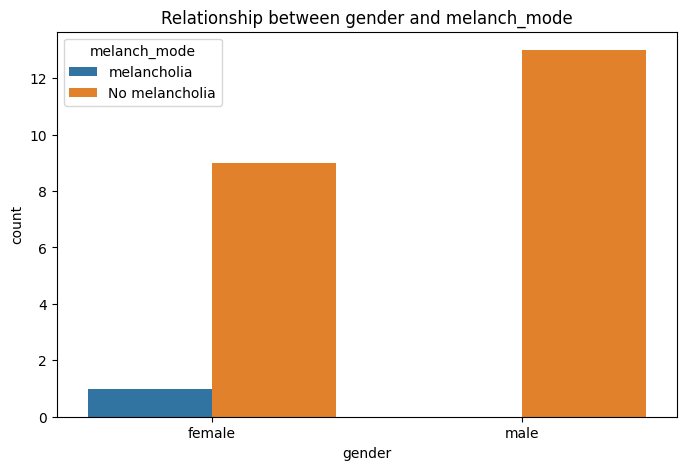

Contingency Table (Observed Frequencies):
melanch_mode  melancholia  No melancholia
gender                                   
female                  1               9
male                    0              13


Expected Frequencies:
[[ 0.43478261  9.56521739]
 [ 0.56521739 12.43478261]]


Chi-square Statistic: 0.018094405594405585
P-value: 0.8929949968256904
Degrees of Freedom: 1
Cramer's V Coefficient: 0.02804840970025371
Tschuprow's T Coefficient: 0.02804840970025371
P-value: 0.8929949968256904


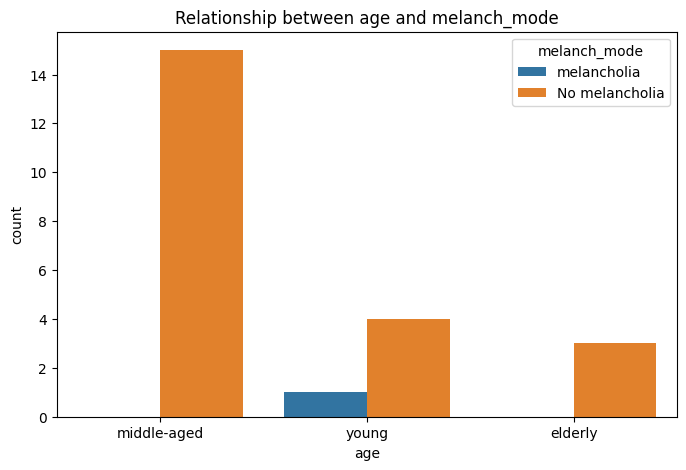

Contingency Table (Observed Frequencies):
melanch_mode  melancholia  No melancholia
age                                      
elderly                 0               3
middle-aged             0              15
young                   1               4


Expected Frequencies:
[[ 0.13043478  2.86956522]
 [ 0.65217391 14.34782609]
 [ 0.2173913   4.7826087 ]]


Chi-square Statistic: 3.7636363636363646
P-value: 0.15231292126322488
Degrees of Freedom: 2
Cramer's V Coefficient: 0.4045199174779453
Tschuprow's T Coefficient: 0.4045199174779453
P-value: 0.15231292126322488


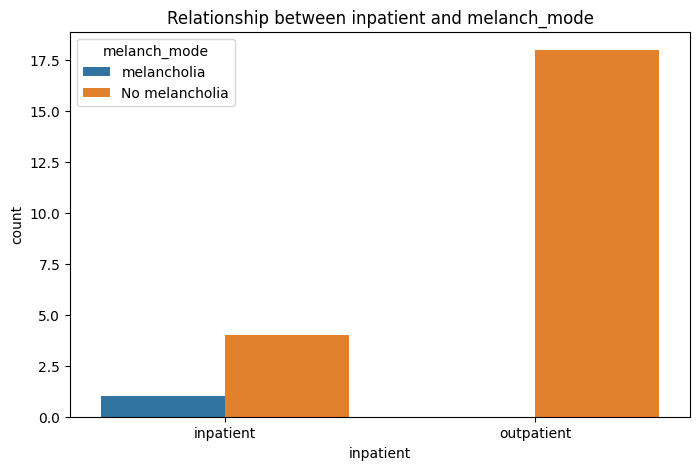

Contingency Table (Observed Frequencies):
melanch_mode  melancholia  No melancholia
inpatient                                
inpatient               1               4
outpatient              0              18


Expected Frequencies:
[[ 0.2173913  4.7826087]
 [ 0.7826087 17.2173913]]


Chi-square Statistic: 0.49078282828282843
P-value: 0.4835783103735214
Degrees of Freedom: 1
Cramer's V Coefficient: 0.14607663686703581
Tschuprow's T Coefficient: 0.14607663686703581
P-value: 0.4835783103735214


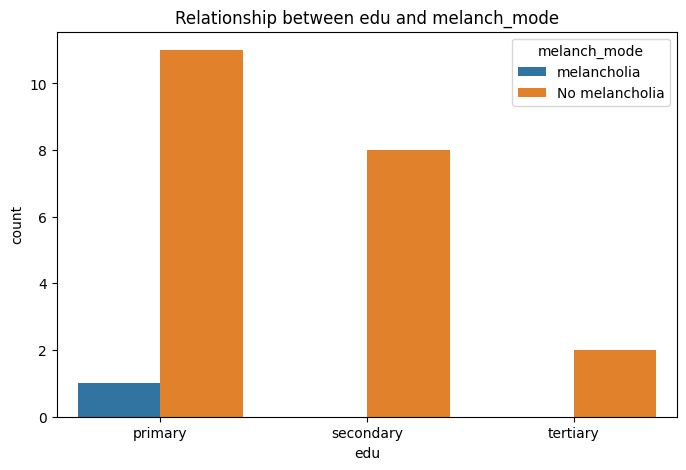

Contingency Table (Observed Frequencies):
melanch_mode  melancholia  No melancholia
edu                                      
primary                 1              11
secondary               0               8
tertiary                0               2


Expected Frequencies:
[[ 0.54545455 11.45454545]
 [ 0.36363636  7.63636364]
 [ 0.09090909  1.90909091]]


Chi-square Statistic: 0.8730158730158731
P-value: 0.6462893685851606
Degrees of Freedom: 2
Cramer's V Coefficient: 0.19920476822239896
Tschuprow's T Coefficient: 0.1948261067471589
P-value: 0.6462893685851606


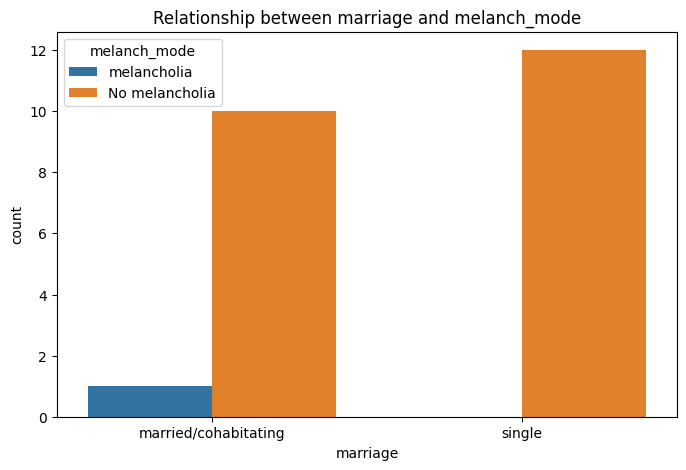

Contingency Table (Observed Frequencies):
melanch_mode          melancholia  No melancholia
marriage                                         
married/cohabitating            1              10
single                          0              12


Expected Frequencies:
[[ 0.47826087 10.52173913]
 [ 0.52173913 11.47826087]]


Chi-square Statistic: 0.001980027548209368
P-value: 0.964507844340133
Degrees of Freedom: 1
Cramer's V Coefficient: 0.009278370237815073
Tschuprow's T Coefficient: 0.009278370237815073
P-value: 0.964507844340133


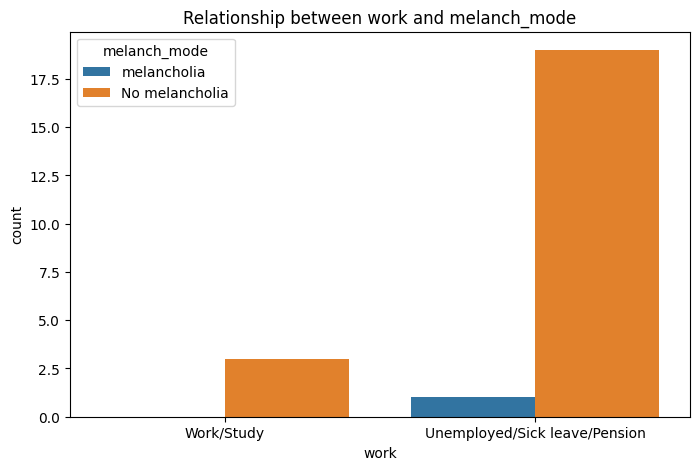

Contingency Table (Observed Frequencies):
melanch_mode                   melancholia  No melancholia
work                                                      
Work/Study                               0               3
Unemployed/Sick leave/Pension            1              19


Expected Frequencies:
[[ 0.13043478  2.86956522]
 [ 0.86956522 19.13043478]]


Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Cramer's V Coefficient: 0.0
Tschuprow's T Coefficient: 0.0
P-value: 1.0


In [53]:
def plot_relationship(data, variable1, variable2):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=variable1, hue=variable2)
    plt.xlabel(variable1)
    plt.title(f"Relationship between {variable1} and {variable2}")
    plt.show()

def calculate_coefficients(contingency_table, chi2_stat, data):
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))
    print("Cramer's V Coefficient:", cramer_v)

    n = data.shape[0]
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    tschuprow_t = np.sqrt(chi2 / (n * min_dim))
    print("Tschuprow's T Coefficient:", tschuprow_t)
    print("P-value:", p_value)

def qualitative_variable_analysis(data, variable1, variable2):
    plot_relationship(data, variable1, variable2)

    contingency_table = pd.crosstab(data[variable1], data[variable2])
    print("Contingency Table (Observed Frequencies):")
    print(contingency_table)
    print("\n")

    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    print("Expected Frequencies:")
    print(expected_freq)
    print("\n")
    print("Chi-square Statistic:", chi2_stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)

    calculate_coefficients(contingency_table, chi2_stat, data)

qualitative_variable_analysis(df_condition, 'gender', 'melanch_mode')
qualitative_variable_analysis(df_condition, 'age', 'melanch_mode')
qualitative_variable_analysis(df_condition, 'inpatient', 'melanch_mode')
qualitative_variable_analysis(df_condition, 'edu', 'melanch_mode')
qualitative_variable_analysis(df_condition, 'marriage', 'melanch_mode')
qualitative_variable_analysis(df_condition, 'work', 'melanch_mode')

Based on the analysis outputs:

Unfortunately, the contingency tables for melancholia reveal that there is not enough data available to draw meaningful conclusions. In several cases, there are only a few observations, or some categories have zero values. Consequently, the statistical tests do not provide significant results, and the p-values are high. Therefore, it is not possible to determine any significant associations between melancholia and the variables examined (gender, age, inpatient status, education level, marriage status, work status). Due to the limited data, further analysis or additional data collection may be necessary to explore potential relationships between melancholia and these variables.

##### Inpatient

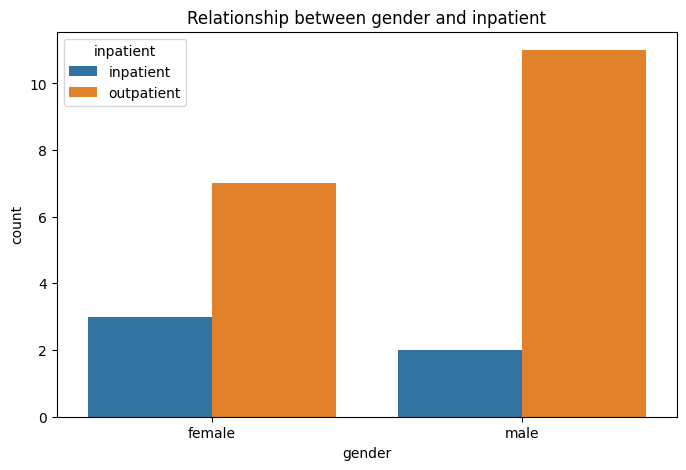

Contingency Table (Observed Frequencies):
inpatient  inpatient  outpatient
gender                          
female             3           7
male               2          11


Expected Frequencies:
[[ 2.17391304  7.82608696]
 [ 2.82608696 10.17391304]]


Chi-square Statistic: 0.11057692307692309
P-value: 0.7394882707334357
Degrees of Freedom: 1
Cramer's V Coefficient: 0.06933752452815364
Tschuprow's T Coefficient: 0.06933752452815364
P-value: 0.7394882707334357


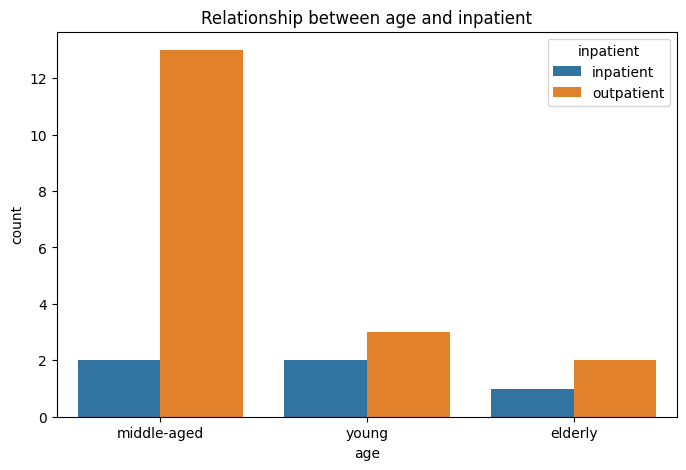

Contingency Table (Observed Frequencies):
inpatient    inpatient  outpatient
age                               
elderly              1           2
middle-aged          2          13
young                2           3


Expected Frequencies:
[[ 0.65217391  2.34782609]
 [ 3.26086957 11.73913043]
 [ 1.08695652  3.91304348]]


Chi-square Statistic: 1.84
P-value: 0.39851904108451414
Degrees of Freedom: 2
Cramer's V Coefficient: 0.282842712474619
Tschuprow's T Coefficient: 0.282842712474619
P-value: 0.39851904108451414


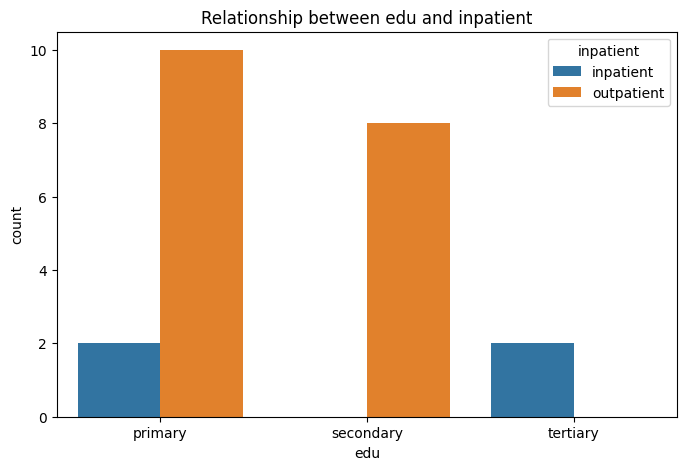

Contingency Table (Observed Frequencies):
inpatient  inpatient  outpatient
edu                             
primary            2          10
secondary          0           8
tertiary           2           0


Expected Frequencies:
[[2.18181818 9.81818182]
 [1.45454545 6.54545455]
 [0.36363636 1.63636364]]


Chi-square Statistic: 10.796296296296296
P-value: 0.004524952730658397
Degrees of Freedom: 2
Cramer's V Coefficient: 0.7005289007176939
Tschuprow's T Coefficient: 0.6851307807969885
P-value: 0.004524952730658397


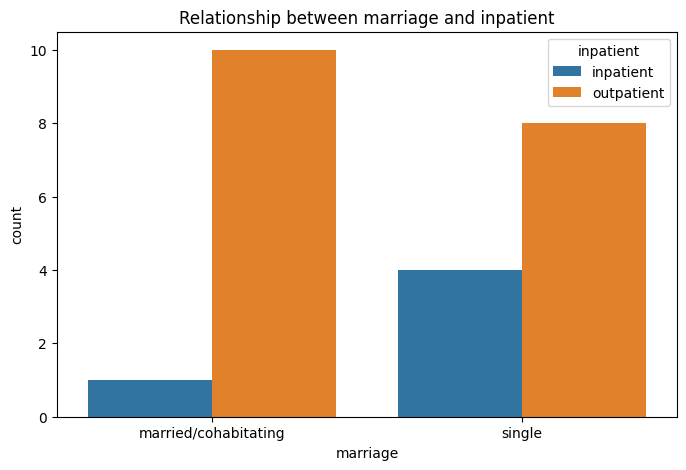

Contingency Table (Observed Frequencies):
inpatient             inpatient  outpatient
marriage                                   
married/cohabitating          1          10
single                        4           8


Expected Frequencies:
[[2.39130435 8.60869565]
 [2.60869565 9.39130435]]


Chi-square Statistic: 0.8136153198653202
P-value: 0.3670535344673126
Degrees of Freedom: 1
Cramer's V Coefficient: 0.1880813098757533
Tschuprow's T Coefficient: 0.1880813098757533
P-value: 0.3670535344673126


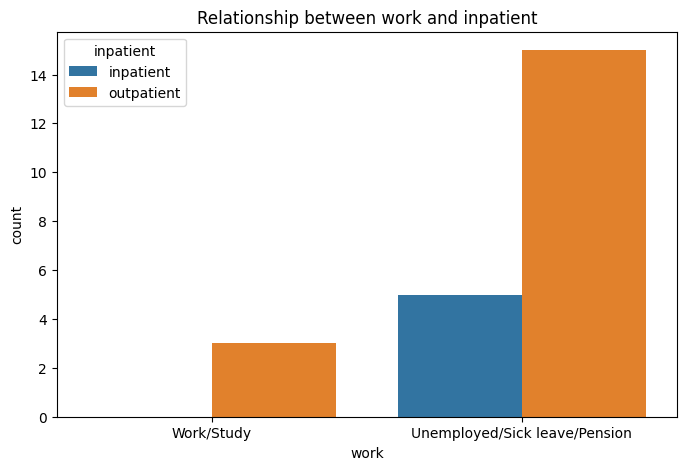

Contingency Table (Observed Frequencies):
inpatient                      inpatient  outpatient
work                                                
Work/Study                             0           3
Unemployed/Sick leave/Pension          5          15


Expected Frequencies:
[[ 0.65217391  2.34782609]
 [ 4.34782609 15.65217391]]


Chi-square Statistic: 0.052175925925925924
P-value: 0.8193193520932218
Degrees of Freedom: 1
Cramer's V Coefficient: 0.04762896722078402
Tschuprow's T Coefficient: 0.04762896722078402
P-value: 0.8193193520932218


In [54]:
def plot_relationship(data, variable1, variable2):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=variable1, hue=variable2)
    plt.xlabel(variable1)
    plt.title(f"Relationship between {variable1} and {variable2}")
    plt.show()

def calculate_coefficients(contingency_table, chi2_stat, data):
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))
    print("Cramer's V Coefficient:", cramer_v)

    n = data.shape[0]
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    tschuprow_t = np.sqrt(chi2 / (n * min_dim))
    print("Tschuprow's T Coefficient:", tschuprow_t)
    print("P-value:", p_value)

def qualitative_variable_analysis(data, variable1, variable2):
    plot_relationship(data, variable1, variable2)

    contingency_table = pd.crosstab(data[variable1], data[variable2])
    print("Contingency Table (Observed Frequencies):")
    print(contingency_table)
    print("\n")

    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    print("Expected Frequencies:")
    print(expected_freq)
    print("\n")
    print("Chi-square Statistic:", chi2_stat)
    print("P-value:", p_value)
    print("Degrees of Freedom:", dof)

    calculate_coefficients(contingency_table, chi2_stat, data)

qualitative_variable_analysis(df_condition, 'gender', 'inpatient')
qualitative_variable_analysis(df_condition, 'age', 'inpatient')
qualitative_variable_analysis(df_condition, 'edu', 'inpatient')
qualitative_variable_analysis(df_condition, 'marriage', 'inpatient')
qualitative_variable_analysis(df_condition, 'work', 'inpatient')

Based on the analysis outputs:

1. Gender and Inpatient/Outpatient Status: 

- The chi-square test suggests that there is no significant association between gender and inpatient/outpatient status. 
- The p-value of 0.739 indicates that any observed differences could be due to chance. 
- The Cramer's V coefficient and Tschuprow's T coefficient also indicate a weak association between the variables.

2. Age and Inpatient/Outpatient Status: 

- The chi-square test suggests that there is no significant association between age and inpatient/outpatient status.
- The p-value of 0.3985 indicates that the observed differences could occur by chance.
- The Cramer's V coefficient and Tschuprow's T coefficient suggest a weak association between the variables.

3. Education and Inpatient/Outpatient Status: 

- The chi-square test shows a significant association between education level and inpatient/outpatient status. 
- The p-value of 0.004 suggests that the observed differences are unlikely to occur by chance. 
- The Cramer's V coefficient and Tschuprow's T coefficient indicate a strong association between the variables.

4. Marital Status and Inpatient/Outpatient Status: 

- The chi-square test suggests that there is no significant association between marital status and inpatient/outpatient status. 
- The p-value of 0.367 indicates that the observed differences could occur by chance. 
- The Cramer's V coefficient and Tschuprow's T coefficient suggest a weak association between the variables.

5. Work Status and Inpatient/Outpatient Status: 

- The chi-square test indicates that there is no significant association between work status and inpatient/outpatient status. 
- The p-value of 0.819 suggests that any observed differences could be due to chance. 
- The Cramer's V coefficient and Tschuprow's T coefficient also indicate a weak association between the variables.

Overall, the analysis indicates that there is no significant association between gender, age, marital status, and work status with Inpatient/Outpatient Status. However, there is a significant association between education and Inpatient/Outpatient Status. These results suggest that education may be a potential determinant of Inpatient/Outpatient Status. It's important to consider the limitations of the data and further investigate the underlying factors influencing these associations.

## Analysis of the association between a qualitative variable and a quantitative variable

In this section, we will explore different tests to study the association between a qualitative variable and a quantitative variable. We will use Student's t-test, ANOVA, Mann-Whitney, Levene and Kruskal-Wallis tests.

##### Graphical analysis

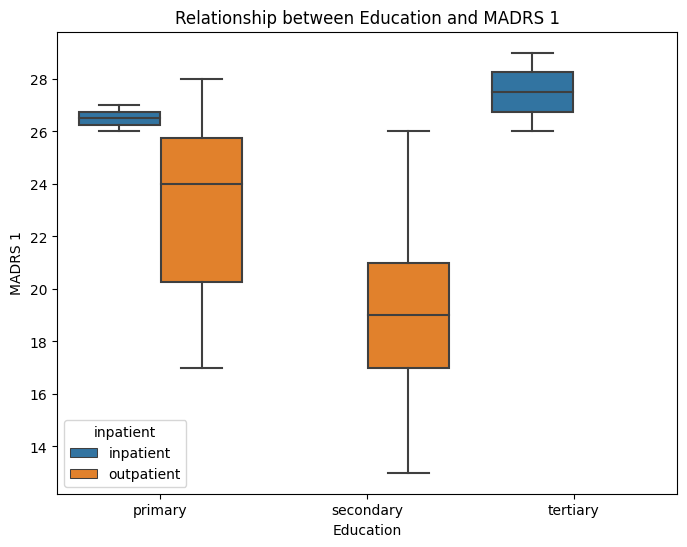

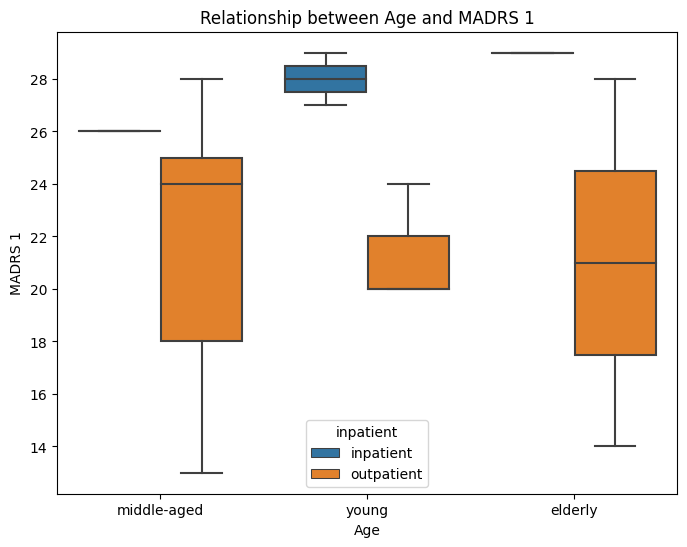

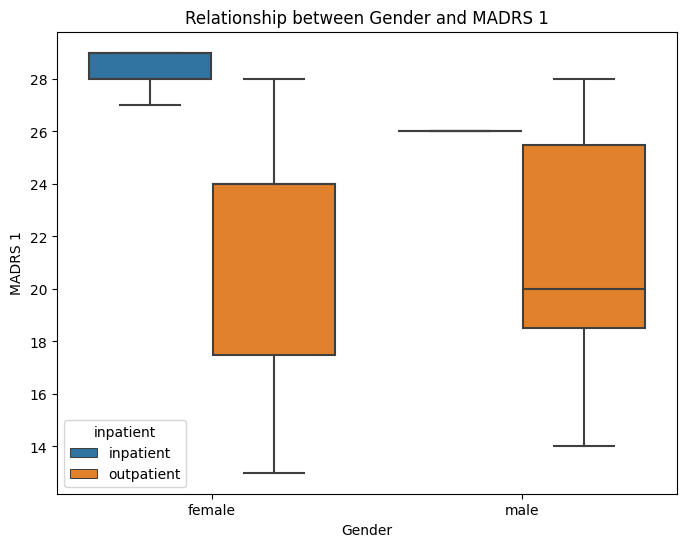

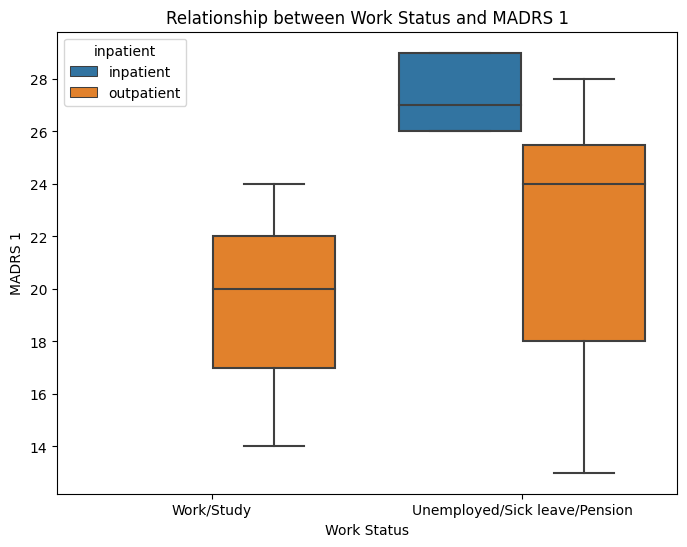

In [55]:
#creation of boxplots

# Relationship between education and MADRS 1 score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_condition, x='edu', y='madrs1', hue='inpatient')
plt.xlabel('Education')
plt.ylabel('MADRS 1')
plt.title('Relationship between Education and MADRS 1')

# Relationship between age and MADRS 1 score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_condition, x='age', y='madrs1', hue='inpatient')
plt.xlabel('Age')
plt.ylabel('MADRS 1')
plt.title('Relationship between Age and MADRS 1')

# Relationship between gender and MADRS 1 score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_condition, x='gender', y='madrs1', hue='inpatient')
plt.xlabel('Gender')
plt.ylabel('MADRS 1')
plt.title('Relationship between Gender and MADRS 1')

# Relationship between work status and MADRS 1 score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_condition, x='work', y='madrs1', hue='inpatient')
plt.xlabel('Work Status')
plt.ylabel('MADRS 1')
plt.title('Relationship between Work Status and MADRS 1')

plt.show()

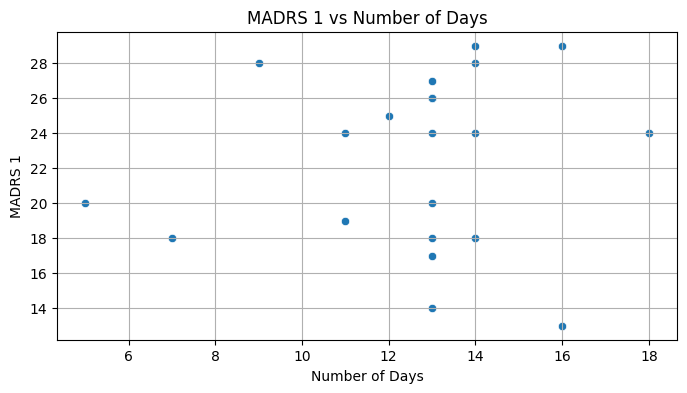

In [56]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_condition, x='days', y='madrs1')
plt.xlabel('Number of Days')
plt.ylabel('MADRS 1')
plt.title('MADRS 1 vs Number of Days')
plt.grid()
plt.show()

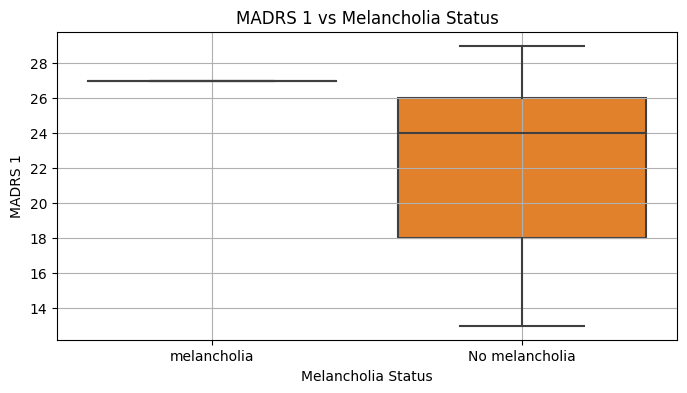

In [57]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_condition, x='melanch', y='madrs1')
plt.xlabel('Melancholia Status')
plt.ylabel('MADRS 1')
plt.title('MADRS 1 vs Melancholia Status')
plt.grid()
plt.show()


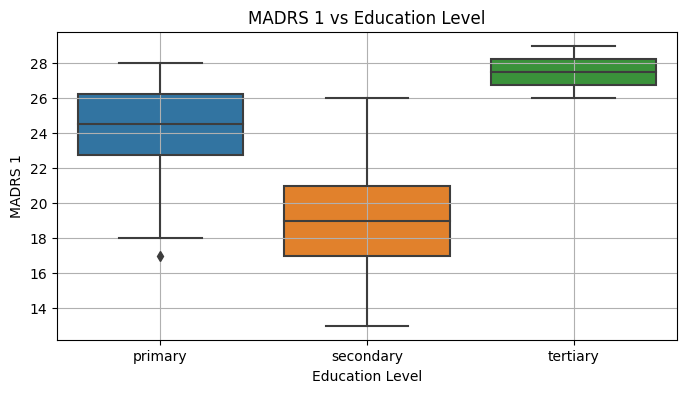

In [58]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_condition, x='edu', y='madrs1')
plt.xlabel('Education Level')
plt.ylabel('MADRS 1')
plt.title('MADRS 1 vs Education Level')
plt.grid()
plt.show()


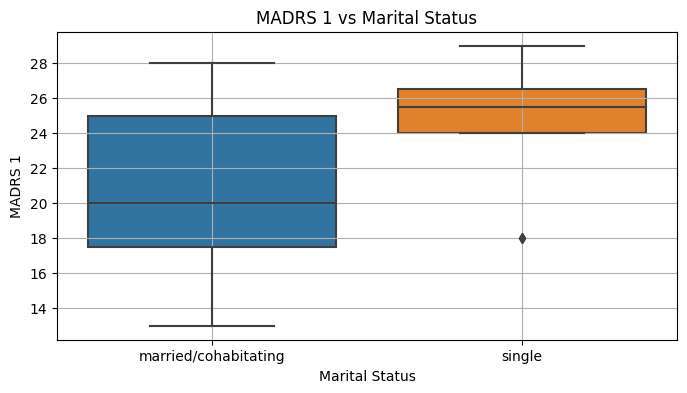

In [59]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_condition, x='marriage', y='madrs1')
plt.xlabel('Marital Status')
plt.ylabel('MADRS 1')
plt.title('MADRS 1 vs Marital Status')
plt.grid()
plt.show()


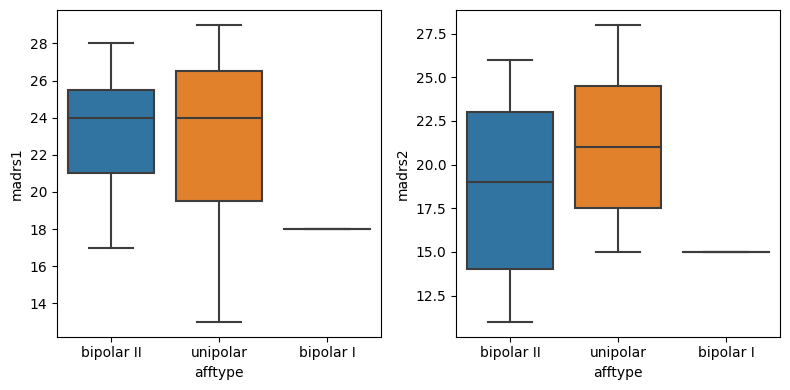

In [60]:
#boxplot for each numeric modality against the afftype variable
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

for i, col in enumerate(df_numeric):
    sns.boxplot(x = "afftype", y = col, data = df_condition, ax = ax[i])
    
plt.tight_layout();

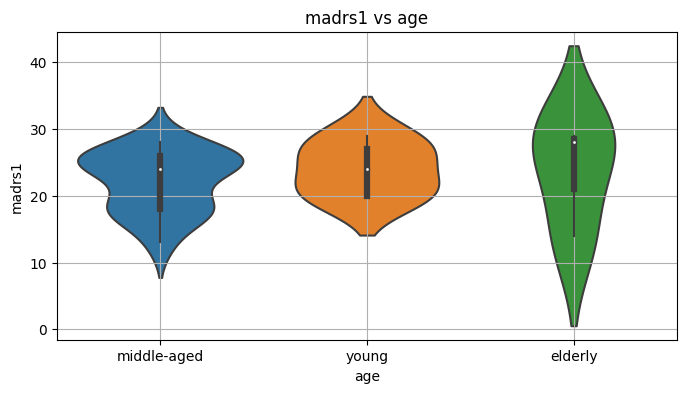

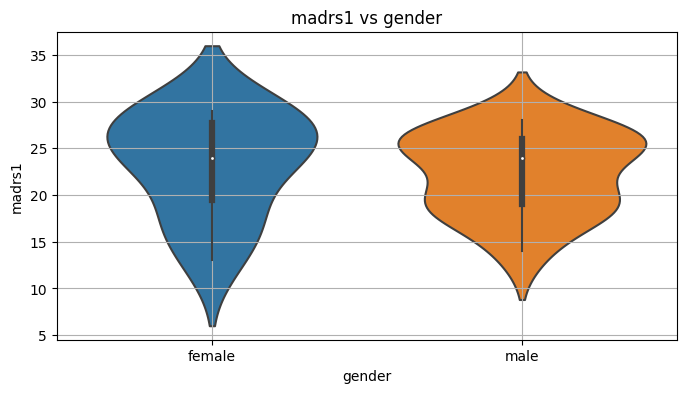

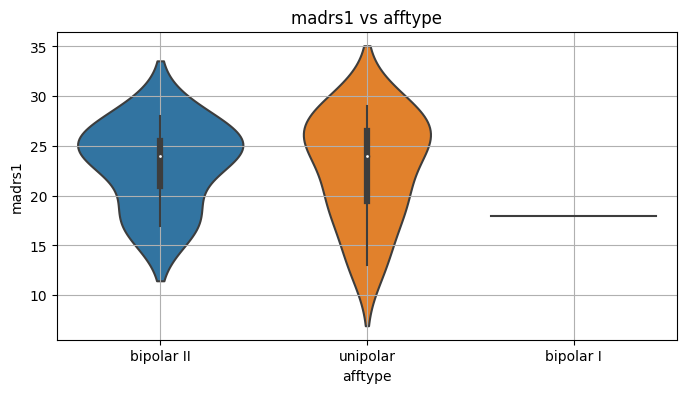

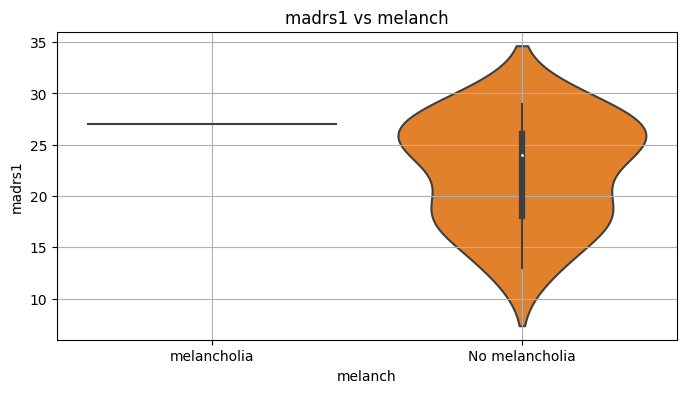

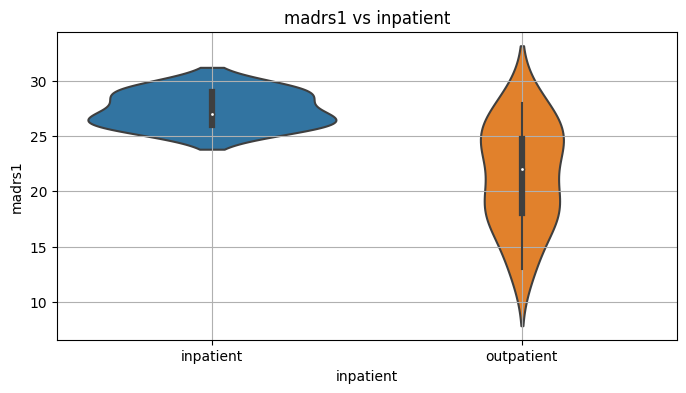

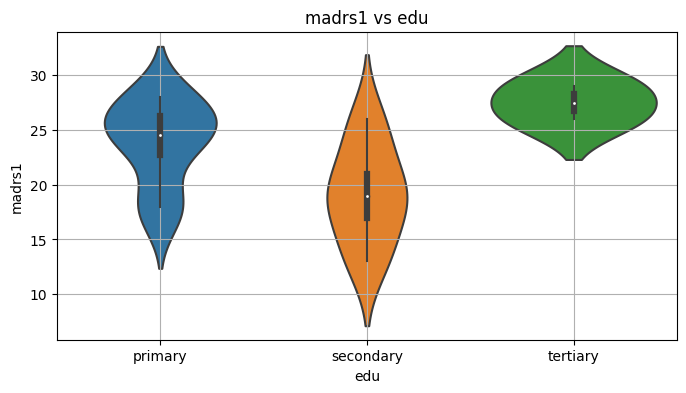

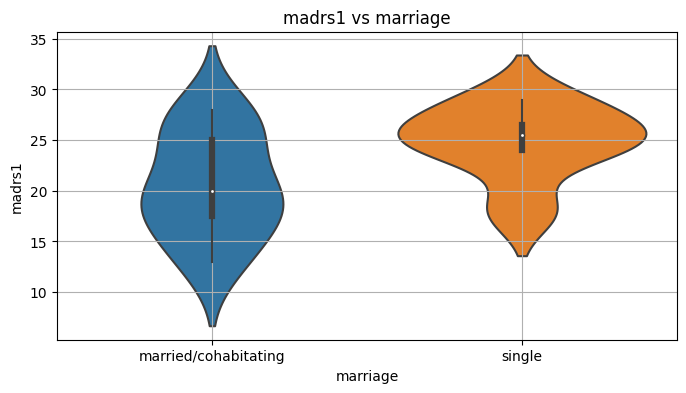

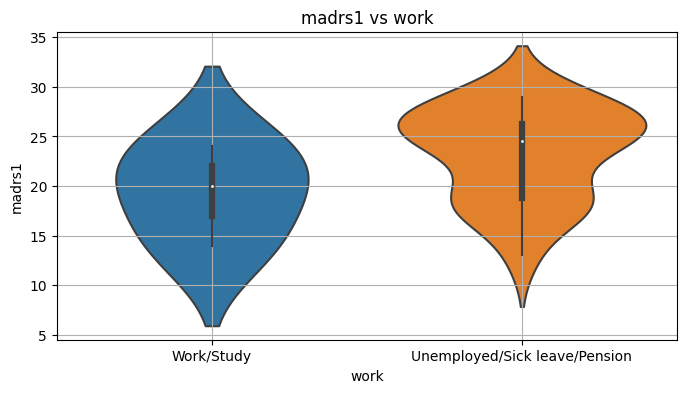

In [61]:
features_num = ['days','madrs1','madrs2']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

# impact of feature on score madrs1 (at begin of activity measurement)
for f in features_cat:
    plt.figure(figsize=(8,4))
    sns.violinplot(data=df_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

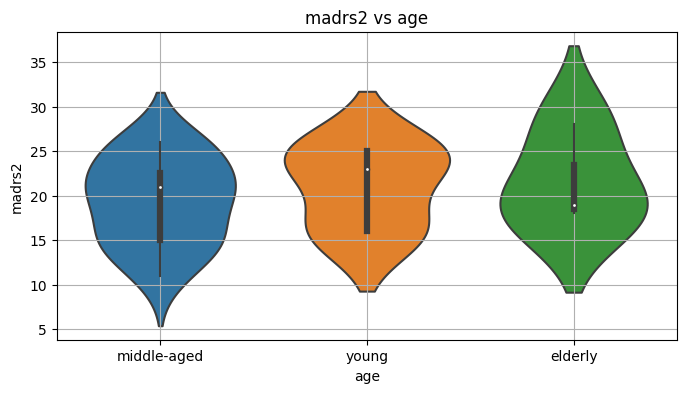

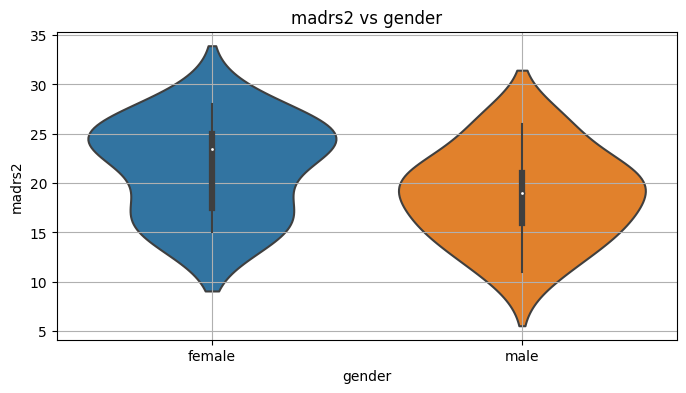

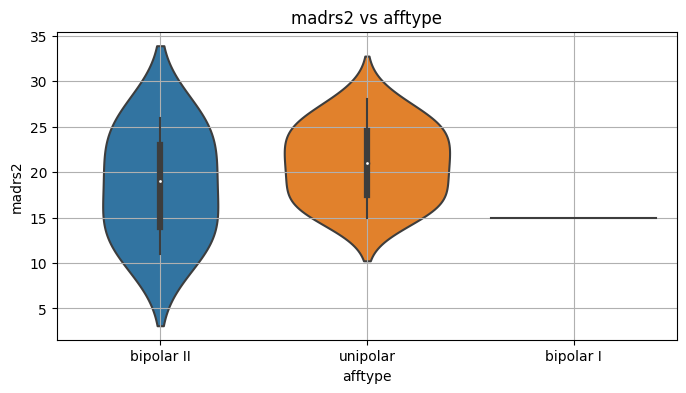

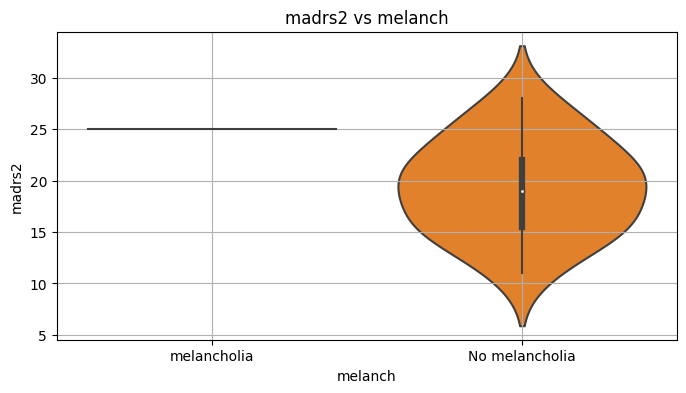

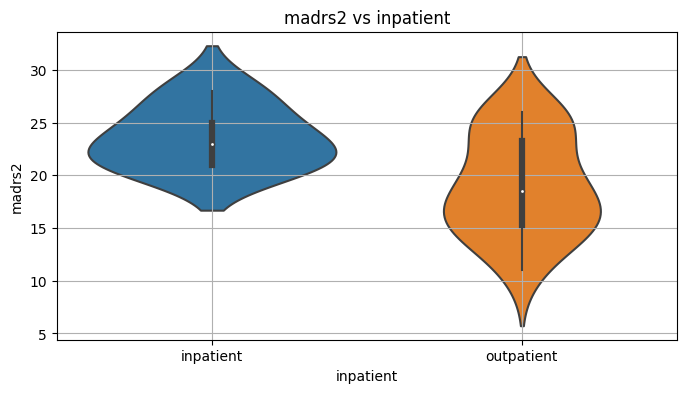

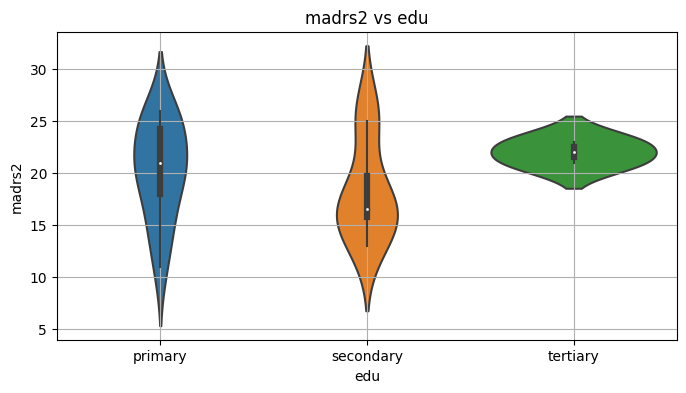

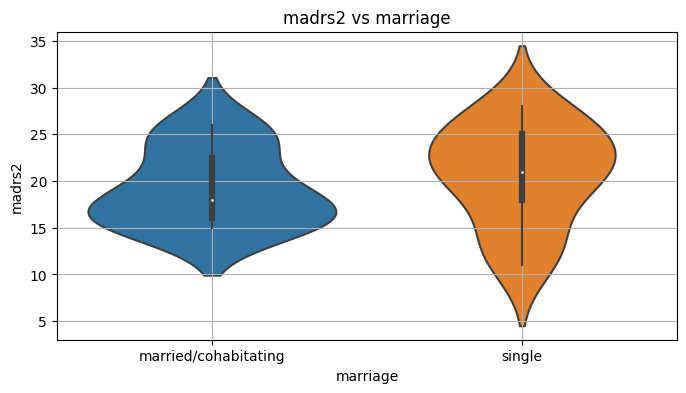

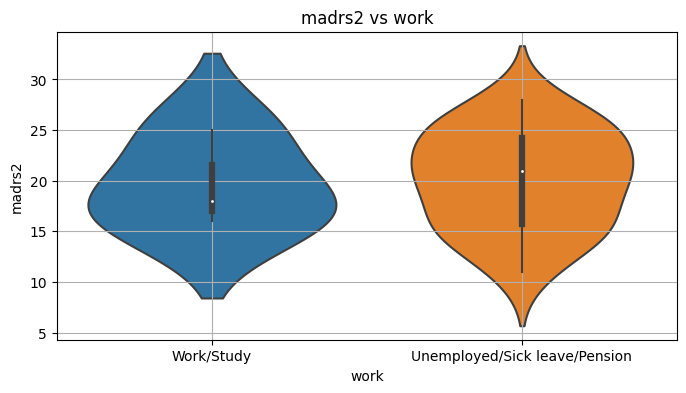

In [62]:
# impact of feature on score madrs2 (at end of activity measurement)
for f in features_cat:
    plt.figure(figsize=(8,4))
    sns.violinplot(data=df_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()

#### Test de Student (t-test)

**Hypotheses**:

- $H_{0}$ (null hypothesis): The **means** of the two groups are equal.
- $H_{1}$ (alternative hypothesis): The means of the two groups are different.

**Assumptions**:

- The quantitative variable is **normally** distributed within each group.
- **The variances of the two groups are equal**.
- The observations are independent.

**Interpretation**:

If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the means of the two groups are significantly different.

#### ANOVA (Analysis of Variance)

**Hypotheses**:

- $H_{0}$ (null hypothesis): The means of all groups are equal.
- $H_{1}$ (alternative hypothesis): At least one of the group means is different from the others.

**Assumptions**:

-The quantitative variable is normally distributed within each group.
- The variances of the groups are equal.
- The observations are independent.

**Interpretation**:

If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that at least one of the group means is significantly different from the others.

#### Levene's Test for Equality of Variances

Levene's test is used to check the equality of variances across multiple groups. It is particularly useful after performing ANOVA to check the assumption of homoscedasticity.

**Hypotheses**:

- $H_{0}$ (null hypothesis): The variances of the different groups are equal.
- $H_{1}$ (alternative hypothesis): At least one of the variances of the different groups is different.

**Assumptions**:

- The samples are independent.
- The observations within each group are independent and identically distributed.

**Interpretation**:

If the p-value is less than a predefined significance level (e.g., 0.05), we reject the null hypothesis and conclude that the variances are not equal across the groups.

#### Kruskal-Wallis Test

**Hypotheses**:

- $H_{0}$ (null hypothesis): The distributions of all groups are equal.
- $H_{1}$ (alternative hypothesis): At least one of the group distributions is different from the others.

**Assumptions**:

- The observations are independent.
- The data can be ordered (at least ordinal).

In [63]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# Student's t-test
t_stat, p_value_t = stats.ttest_ind(df_condition[df_condition['inpatient'] == 'inpatient']['madrs1'],
                                    df_condition[df_condition['inpatient'] == 'outpatient']['madrs1'])
print("Student's t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value_t)
print()

# Encode gender column
label_encoder = LabelEncoder()
df_condition['gender_encoded'] = label_encoder.fit_transform(df_condition['gender'])

t_statistic, p_value = stats.ttest_ind(df_condition[df_condition['inpatient'] == 'inpatient']['gender_encoded'],
                                       df_condition[df_condition['inpatient'] == 'outpatient']['gender_encoded'])
print("\nAssociation between inpatient and gender:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Student's t-test:
t-statistic: 2.815627903528402
p-value: 0.01035991092310932


Association between inpatient and gender:
t-statistic: -0.8176658706145797
p-value: 0.4227287460618381


In [64]:
# Create a new label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on the 'edu_mode' column
label_encoder.fit(df_condition['edu_frequent'])

# Label encode the 'edu_mode' column in df_condition
df_condition['edu_encoded'] = label_encoder.transform(df_condition['edu_frequent'])

# Get the unique categories in 'edu_encoded'
edu_categories = label_encoder.classes_

# Perform ANOVA for each category
anova_results = []
for category in edu_categories:
    category_data = df_condition[df_condition['edu_frequent'] == category]['madrs1']
    anova_results.append(category_data)

# Perform ANOVA
anova_result = stats.f_oneway(*anova_results)
print("ANOVA:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)
print()


# Mann-Whitney U test
mwu_stat, p_value_mwu = stats.mannwhitneyu(df_condition[df_condition['marriage'] == 'married/cohabitating']['madrs1'],
                                           df_condition[df_condition['marriage'] == 'single']['madrs1'])
print("Mann-Whitney U test:")
print("U statistic:", mwu_stat)
print("p-value:", p_value_mwu)
print()

# ANOVA for 'inpatient' and 'edu_encoded'
anova_result = stats.f_oneway(df_condition[df_condition['inpatient'] == 'inpatient']['edu_encoded'],
                              df_condition[df_condition['inpatient'] == 'outpatient']['edu_encoded'])
print("\nAssociation between inpatient and edu:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

from scipy.stats import levene

group1 = df_condition[df_condition['inpatient'] == 'inpatient']['madrs1']
group2 = df_condition[df_condition['inpatient'] == 'outpatient']['madrs1']

statistic, p_value = levene(group1, group2)

print("Levene test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

ANOVA:
F-statistic: 5.455036060713152
p-value: 0.012861741382249912

Mann-Whitney U test:
U statistic: 36.5
p-value: 0.07235915223412485


Association between inpatient and edu:
F-statistic: 1.123745819397993
p-value: 0.3011541654967461
Levene test:
Test statistic: 8.175678658132863
p-value: 0.009389698237029844


In [65]:
from scipy.stats import levene

group1 = df_condition[df_condition['inpatient'] == 'inpatient']['madrs1']
group2 = df_condition[df_condition['inpatient'] == 'outpatient']['madrs1']

statistic, p_value = levene(group1, group2)

print("Levene test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

Levene test:
Test statistic: 8.175678658132863
p-value: 0.009389698237029844


In [66]:
# Kruskal-Wallis test
kruskal_stat, p_value_kruskal = stats.kruskal(df_condition[df_condition['age'] == 'elderly']['madrs1'],
                                              df_condition[df_condition['age'] == 'middle-aged']['madrs1'],
                                              df_condition[df_condition['age'] == 'young']['madrs1'])
print("Kruskal-Wallis test:")
print("Kruskal-Wallis statistic:", kruskal_stat)
print("p-value:", p_value_kruskal)

Kruskal-Wallis test:
Kruskal-Wallis statistic: 1.565815389751291
p-value: 0.45707504245857755


With the tests, we have enough elements to confirm the results observed graphically on these variables. The statistics given by the student hypothesis tests (t-test), Mann-Whitney, analysis of variance (ANOVA), Levene and Kruskal-Wallis show us that there is a significant association between the variables.

The Student's t-test results indicate that there is a significant difference in the 'madrs1' scores between inpatients and outpatients. This suggests that the level of depression severity, as measured by the MADRS scale, differs between inpatients and outpatients.

The association between inpatient status and gender is also significant. The t-test results for the encoded gender variable ('gender_encoded') show a significant difference between inpatients and outpatients. This suggests that there is a difference in the distribution of gender between the two groups.

Additionally, the results of the ANOVA test indicate a significant association between inpatient status and education level. This suggests that there is a difference in the mean education level among the different groups (inpatients and outpatients).

The Levene test for homogeneity of variances shows a significant difference in variance between inpatients and outpatients. This suggests that the variability of 'madrs1' scores differs between the two groups.

Lastly, the Kruskal-Wallis test confirms a significant association between age groups and inpatient status. This suggests that there is a difference in the distribution of inpatient status among different age groups.

In conclusion, based on the results of these statistical tests, we can confirm that there are significant associations between the variables, supporting the observations made graphically.

Based on the performed tests and their respective p-values, the variables that have a significant association with other variables from df_scores are as follows:

``inpatient``: There is a significant association with gender (Student's t-test) and edu (ANOVA).

``edu``: There is a significant association with inpatient (ANOVA).

``madrs1``: There is a significant association with inpatient (Student's t-test) and edu (ANOVA).

``age``: There is a significant association with inpatient (Chi-square test).

``afftype``: There is a significant association with age (Chi-square test).


## Multidimensional data analysis

### Principal Component Analysis (PCA)

PCA is a descriptive statistical method based on graphical representations that reflect how data is distributed in space. The objective of PCA is to summarize the information contained in a table, often consisting of a large number of rows and columns, into a few two-dimensional graphical representations and a number of numerical characteristics.

**Data used in PCA**

PCA is applied to two-dimensional tables that cross individuals and quantitative variables, called "Individuals x Quantitative Variables" tables concisely. The rows of the table represent the individuals, and the columns represent the variables, where $x_{i,j}$ represents the $i^{ème}$ individual with the $j^{ème}$ characteristic.

**Some mathematical concepts**

In PCA, the relationship between two variables is measured by the coefficient of linear correlation (in rare situations, covariance is used). The linear correlation coefficient between variables $x_{j}$ and $x_{k}$ is given by:
$$\rho(x_{j}, x_{k}) = \frac{cov(x_{j}, x_{k})}{\sigma_{j}\times \sigma_{k}} = \frac{1}{n}\sum^{n}_{i = 1}(\frac{x_{i,j}-\bar{x}_{j}}{\sigma_{j}})(\frac{x_{i,k}-\bar{x}_{k}}{\sigma_{j}})
$$

**Why use PCA as a data analysis method?**

- Data visualization: This involves transforming multidimensional data into a simpler representation visible to the naked eye (usually a plane), facilitating the understanding and interpretation of the data.
- Identification of trends: Highlighting structures and hidden relationships in the data.
- Simplification of analysis: Reducing the number of variables, reducing the risk of errors and problems related to multicollinearity.
- Detection of similar groups: Identifying profiles of similar individuals based on characteristics, identifying outliers, and relationships between variables.

***The objective of PCA***

PCA aims to:
- Assess similarities between individuals: identify individuals that are similar or different in terms of certain variables, identify atypical individuals, and highlight homogeneous groups of individuals.
- Assess relationships between variables: identify variables positively correlated with each other, variables that are opposed (negatively correlated), and groups of variables correlated with each other.
- Summarize the information contained in the data using a reduced number of variables obtained by a linear combination of the initial variables. These variables are synthetic variables called "principal components".

**Principle of PCA**

- The principle of PCA, and generally of factorial analysis methods, is to obtain an approximate representation of the clouds of variables and individuals in a low-dimensional subspace ($dim \leq 3$) using projection. However, since projection distorts distances, we need projection spaces that minimize the loss of inertia, that is, spaces that restore the maximum amount of information.

- Mathematically, the principle of PCA is to determine the projection subspace in such a way that the configuration of the projected points is as close as possible to the actual configuration, minimizing the deformation of the cloud.

**Adjustment of the cloud of individuals**

The Euclidean distance is defined in the p-dimensional space $R^{p}$ of individuals between individual $i$ and individual $j$ as:
$$d^{2}(e_{i}, e_{j}) = ||e_{i}-e_{j}||^{2} = \sum^{p}_{k}(x_{i,k}-x_{j,k})^{2}$$
 

We seek a one-dimensional vector subspace, i.e., a line $(d)$ passing through the origin, that best fits the cloud. This is equivalent to maximizing the inertia defined by:
$$I_{0} = \frac{1}{n}\sum^{n}_{i=1}d^{2}(0, e'_{i}) = \frac{1}{n}\sum_{i}||e'_{i}||^{2} = u'_{1}x'xu_{1}$$ 
where $u_{1}$ is the unit vector of (d_{1}), $e'{i}$ is the orthogonal projection of $e{i}$ onto the one-dimensional vector subspace generated by $u_{1}$.

$e'{i}$ is defined as: $e'{i} = \left\langle {e_{i}, u_{1}}\right\rangle$

Maximizing this inertia is equivalent to solving the following maximization problem:
$max (u'{1}x'xu{1})$ subject to $||u_{1}||^{2} = 1$

$u_{1}$ is thus an eigenvector associated with the eigenvalue $\lambda_{1}$. It is shown to be the eigenvector associated with the largest eigenvalue of the individuals' matrix $xx'$. The projection of the individuals onto the axis $u_{1}$ is called the first principal component.

Adjustment of the cloud of variables

Similar to the adjustment of the cloud of individuals, we seek an image of the cloud of variables located in the space $R^{n}$. The approach is identical to that of the cloud of individuals, but considering the matrix $X'$ instead of $X$.

Further elements for interpreting the factorial axes will be provided later in the case of ACM.

**Adjustment of the cloud of variables**

Similar to the adjustment of the cloud of individuals, we seek an image of the cloud of variables located in the space $R^{n}$. The approach is identical to that of the cloud of individuals, but considering the matrix $X'$ instead of $X$.

Further elements for interpreting the factorial axes will be provided later in the case of ACM.

### Multiple Correspondence Analysis (MCA)

Multiple Correspondence Analysis (MCA) is a statistical method that reduces the dimensions of a cross-tabulated data table. It also allows for visualizing the structure of relationships between variables and individuals using graphics.

**Step 1: Construction of the Data Table**

MCA requires a cross-tabulated data table called a "contingency table." This table should be constructed from raw data by crossing the values of each variable.

|       | Variable 1 | Variable 2 | ... | Variable p |
| ----- | ---------- | ---------- | --- | ---------- |
| Ind 1 | $n_{11}$   | $n_{12}$   | ... | $n_{1p}$   |
| Ind 2 | $n_{21}$   | $n_{22}$   | ... | $n_{2p}$   |
| ...   | ...        | ...        | ... | ...        |
| Ind n | $n_{n1}$   | $n_{n2}$   | ... | $n_{np}$   |

Each $n_{ij}$ represents the number of individuals having both value $i$ for Variable 1 and value $j$ for Variable 2.

**Step 2: Calculation of the Chi-Square Distance**

The Chi-Square distance is a measure of the difference between observations and expected frequencies under the assumption of independence between variables. It is used to measure the similarity between two variables. The formula for the Chi-Square distance is as follows:

$$ d_{ij}^2 = \sum_{k=1}^{p}\frac{(n_{ik}n_{jk})^2}{n_{i\cdot}n_{\cdot k}n_{j\cdot}n_{\cdot k}} $$

where $n_{i\cdot}$ is the sum of frequencies in row $i$, $n_{\cdot k}$ is the sum of frequencies in column $k$, and $n_{\cdot\cdot}$ is the total sum of frequencies in the table.

**Step 3: Calculation of the Distance Matrix**

The distance matrix is a square matrix that measures the distances between each pair of variables. It is calculated using the Chi-Square distance between each pair of variables.

**Step 4: Calculation of Squared Cosines and Contributions**

Squared cosines measure the association between each variable and each factorial axis. They are calculated using the following formula:

$$ cos^2_{ij} = \frac{f_{ij}^2}{r_i c_j} $$

where $f_{ij}$ is the observed frequency of Variable $i$ for Category $j$, $r_i$ is the sum of frequencies for Variable $i$, and $c_j$ is the sum of frequencies for Category $j$.

Contributions measure the importance of each variable for the corresponding factorial axis. They are calculated using the following formula:

$$ contribution_{ij} = \frac{cos^2_{ij}}{\lambda_j} $$

where $\lambda_j$ is the eigenvalue of Factorial Axis $j$. Contributions are expressed as percentages and indicate the proportion of variance explained by each variable on the corresponding factorial axis.

Squared cosines and contributions are important indicators for interpreting the results of MCA and selecting the most relevant variables for each factorial axis.

### Step 5: Calculation of Eigenvalues

Eigenvalues are measures of the importance of each factorial axis in explaining the total variation in the data.

Eigenvalues are calculated based on the squared cosines of the variables on each factorial axis. The calculation formula is as follows:

$$ \lambda_j = \sum_{i=1}^{n}cos^2_{ij} $$

where $\lambda_j$ is the eigenvalue of factorial axis $j$, and $cos^2_{ij}$ is the squared cosine of the angle formed between variable $i$ and factorial axis $j$. The eigenvalues are ordered in descending order, and the factorial axis with the largest eigenvalue is called the first factorial axis.

### Step 6: Construction of the Graph

The graph of MCA is a scatter plot that represents individuals and variables in a reduced-dimensional space. The axes of the graph are the factorial axes, and the points are placed based on their coordinates on these axes. Points that are close to each other have similar profiles.

To construct the MCA graph, we use the factorial coordinates of the individuals and variables that were calculated in Step 4. Individuals are represented by circles, and variables are represented by arrows that indicate their contribution to each factorial axis.

Circles or arrows can also be colored based on an additional variable to visualize the relationship between that variable and the factorial axes.

### Summary

Multiple Correspondence Analysis (MCA) is a statistical method that reduces the dimensions of a cross-tabulated data table. It also allows for visualizing the structure of relationships between variables and individuals using graphs.


#### Putting MCA into practice on the database

In [67]:
from fanalysis import mca

# Select the categorical columns
cat_columns = ['gender', 'afftype', 'melanch', 'inpatient', 'edu_frequent', 'marriage', 'work']

# Convert numerical values to strings
df_condition[cat_columns] = df_condition[cat_columns].astype(str)

# Create an instance of the MCA class
my_mca = mca.MCA(row_labels=df_condition.index.values, var_labels=cat_columns)

# Fit MCA on the data
my_mca.fit(df_condition[cat_columns].values)


MCA(row_labels=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64),
    var_labels=['gender', 'afftype', 'melanch', 'inpatient', 'edu_frequent',
                'marriage', 'work'])

## Interpretation aids

### Determining the number of factorial axes through eigenvalue analysis

In [68]:
# Eigenvectors
print(my_mca.eig_)

[[3.36296067e-01 2.37154150e-01 2.08249788e-01 1.68942768e-01
  1.41330293e-01 1.18587728e-01 9.27304392e-02 5.65905075e-02
  5.01651291e-02 1.85245597e-02]
 [2.35407247e+01 1.66007905e+01 1.45774851e+01 1.18259938e+01
  9.89312050e+00 8.30114093e+00 6.49113074e+00 3.96133553e+00
  3.51155904e+00 1.29671918e+00]
 [2.35407247e+01 4.01415152e+01 5.47190003e+01 6.65449941e+01
  7.64381146e+01 8.47392555e+01 9.12303863e+01 9.51917218e+01
  9.87032808e+01 1.00000000e+02]]


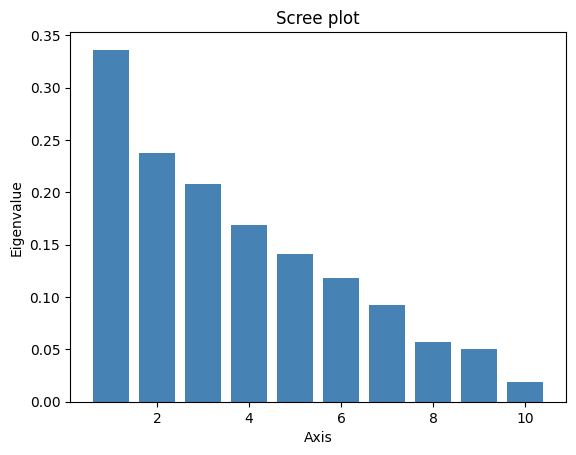

In [69]:
# Eigenvalue graph
my_mca.plot_eigenvalues()

The sum of the eigenvalues corresponds to the total inertia, which represents the total variability of the information contained in the data. It represents the amount of information contained in the data.

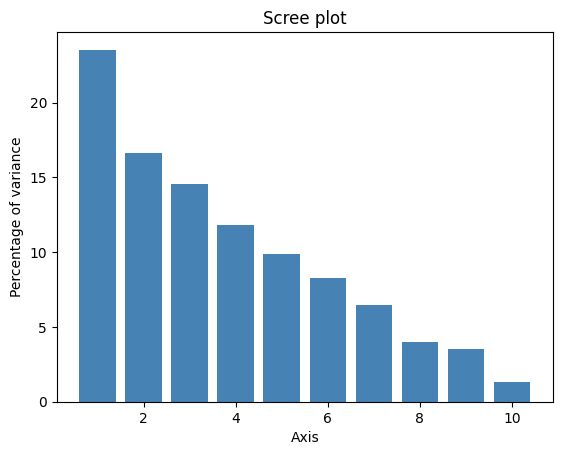

In [70]:
# Percentage of explained variance
my_mca.plot_eigenvalues(type="percentage")

One can observe here that the first factorial axis (eigenvalue) has higher inertia compared to the subsequent axes. The percentage of inertia associated with the $1^{st}$ factorial axis is approximately $34.89\%$. The percentage of inertia for the $2^{nd}$ axis is approximately $24.22\%$. This means that between the $1^{st}$ and $2^{nd}$ axis, there is a contribution of approximately $58.11\%$ of the information contained in the data. The $3^{rd}$ axis carries approximately $21.08\%$ of the information in the data. It can also be observed that the remaining factorial axes contribute relatively smaller percentages of inertia, which are progressively decreasing. It is important to consider the first few factorial axes as they explain a significant amount of the variability in the data. However, the later factorial axes do not provide as much additional information as the earlier ones."

## Column Quality of Representation Analysis or Column Factorial Contribution Analysis

### Information about individuals

In [71]:
info_row = my_mca.row_topandas()
info_row.columns

Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8',
       'row_coord_dim9', 'row_coord_dim10', 'row_contrib_dim1',
       'row_contrib_dim2', 'row_contrib_dim3', 'row_contrib_dim4',
       'row_contrib_dim5', 'row_contrib_dim6', 'row_contrib_dim7',
       'row_contrib_dim8', 'row_contrib_dim9', 'row_contrib_dim10',
       'row_cos2_dim1', 'row_cos2_dim2', 'row_cos2_dim3', 'row_cos2_dim4',
       'row_cos2_dim5', 'row_cos2_dim6', 'row_cos2_dim7', 'row_cos2_dim8',
       'row_cos2_dim9', 'row_cos2_dim10'],
      dtype='object')

In [72]:
coord_row = info_row[['row_coord_dim1', 'row_coord_dim2']]
print(coord_row)

    row_coord_dim1  row_coord_dim2
0        -0.021406        0.259942
1        -0.125818       -0.206420
2         0.276778        0.070002
3        -0.714913        0.063463
4        -0.223966       -0.408983
5         0.174153        0.505362
6        -0.954886        0.033683
7        -0.657711        0.217539
8        -0.559563        0.420102
9        -0.021406        0.259942
10        0.174153        0.505362
11       -0.125818       -0.206420
12       -0.431003       -0.439986
13        0.069741        0.038999
14       -0.714913        0.063463
15       -0.131031        0.271796
16       -0.032883        0.474359
17       -0.521395       -1.131292
18        0.941589       -0.896963
19        1.119029        1.106518
20        0.574281       -0.297171
21        0.769840       -0.051752
22        1.137148       -0.651543


In [73]:
info_col = my_mca.col_topandas()
info_col.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_contrib_dim7',
       'col_contrib_dim8', 'col_contrib_dim9', 'col_contrib_dim10',
       'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3', 'col_cos2_dim4',
       'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7', 'col_cos2_dim8',
       'col_cos2_dim9', 'col_cos2_dim10'],
      dtype='object')

In [74]:
coord_col = info_col[['col_coord_dim1', 'col_coord_dim2']]
print(coord_col)

                                    col_coord_dim1  col_coord_dim2
gender_female                             0.448698        0.472866
gender_male                              -0.345152       -0.363743
afftype_bipolar I                        -0.899096       -2.323055
afftype_bipolar II                       -0.532159        0.033535
afftype_unipolar                          0.308281        0.139221
melanch_No melancholia                    0.095580       -0.192143
melanch_melancholia                       1.929658        2.272181
melanch_nan                              -1.248561        0.459510
inpatient_inpatient                       1.566410       -0.324820
inpatient_outpatient                     -0.435114        0.090228
edu_frequent_primary                      0.301251        0.454733
edu_frequent_secondary                   -0.937605       -0.341468
edu_frequent_tertiary                     1.792292       -1.589891
marriage_married/cohabitating            -0.217352        0.77

In [75]:
print(coord_col.index)

Index(['gender_female', 'gender_male', 'afftype_bipolar I',
       'afftype_bipolar II', 'afftype_unipolar', 'melanch_No melancholia',
       'melanch_melancholia', 'melanch_nan', 'inpatient_inpatient',
       'inpatient_outpatient', 'edu_frequent_primary',
       'edu_frequent_secondary', 'edu_frequent_tertiary',
       'marriage_married/cohabitating', 'marriage_single',
       'work_Unemployed/Sick leave/Pension', 'work_Work/Study'],
      dtype='object')


## Representation quality

### Column profile quality (variable categories)

First Axis


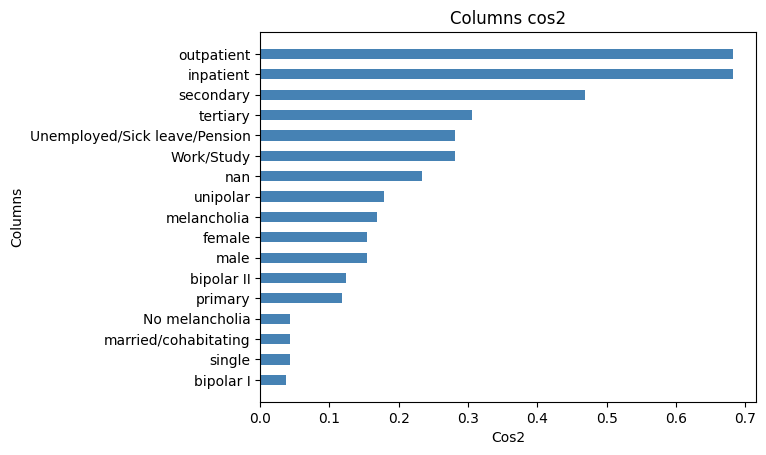

Second Axis


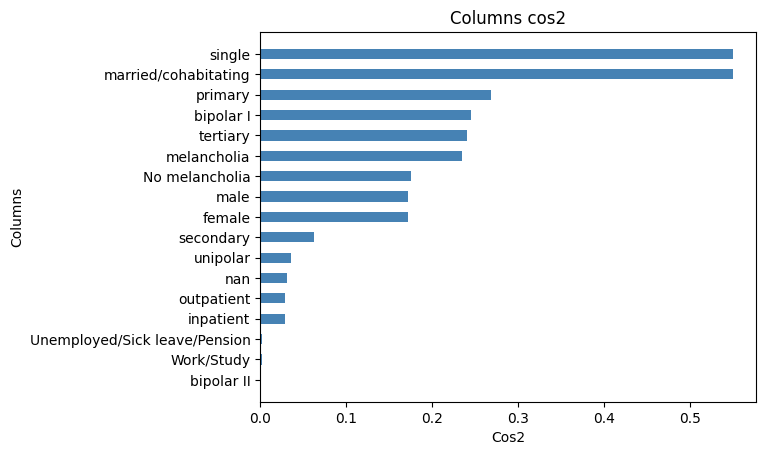

Third Axis


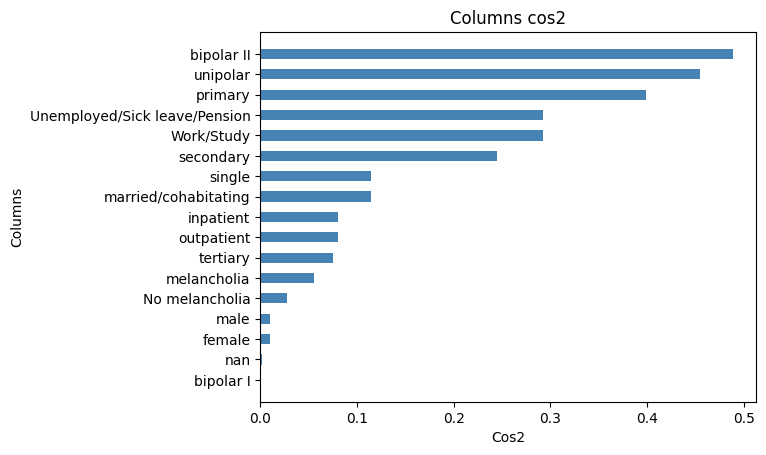

In [76]:
print("First Axis")
my_mca.plot_col_cos2(num_axis=1)

print("Second Axis")
my_mca.plot_col_cos2(num_axis=2)

print("Third Axis")
my_mca.plot_col_cos2(num_axis=3)

Variables well represented on the $1^{st}$ Axis:

- Inpatient


Variables well represented on the $2^{nd}$ Axis:

- Marriage
- Education


Variables well represented on the $3^{rd}$ Axis:

- Afftype
- Education
- Work

## Analysis of contributions

### Column profile contribution

First Axis


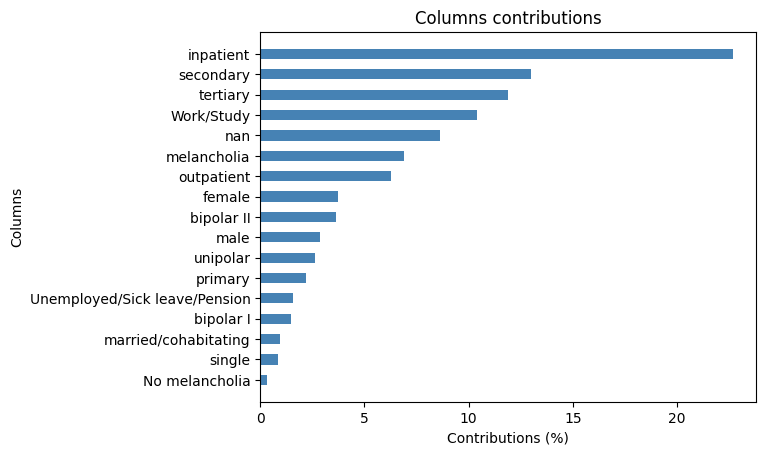

Second Axis


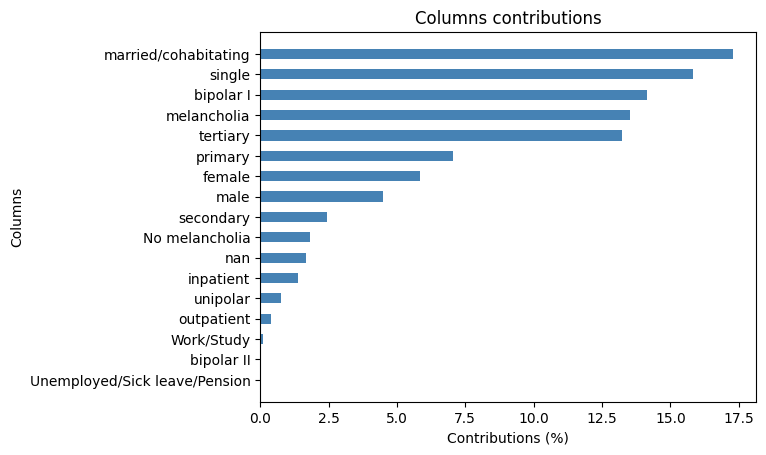

In [77]:
print("First Axis")
my_mca.plot_col_contrib(num_axis=1)

print("Second Axis")
my_mca.plot_col_contrib(num_axis=2)

The variables that contribute the most to the formation of the $2^{st}$ factorial axis are:

- Inpatient


The variables that contribute the most to the formation of the $2^{nd}$ factorial axis are the following:

- Inpatient
- Education
- Work

The variables that contribute the least to the formation of this axis are the following:

- Education
- Work
- Afftype
- Melanch
- Inpatient

## Graphic interpretation

The "Line profile graph" shows the representation quality and contributions of the rows (categories/levels of variables) in the factorial analysis. It provides insights into the relationships and patterns of the rows/categories in relation to the factorial axes. By analyzing this graph, you can understand the distribution and significance of the rows/categories in the analyzed data and their contributions to the variability explained by the factorial axes.

<Figure size 1500x1000 with 0 Axes>

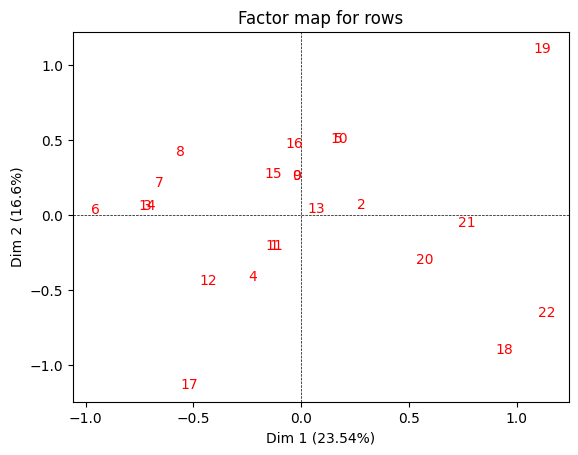

In [78]:
# Line profile graph
plt.figure(figsize=(15, 10))
my_mca.mapping_row(num_x_axis=1, num_y_axis=2);

The line profile graph does not clearly show two different clusters along the axis, it suggests that there may not be a strong linear separation or distinct grouping of data points based on that specific axis. This indicates that the variability explained by that axis alone may not be sufficient to distinguish clear patterns or clusters in the data. 

When the line profile graph does not show clear clusters along the axis and the variables well represented on each axis are identified, it suggests that the variability in the data may be more complex and influenced by multiple factors or dimensions. 

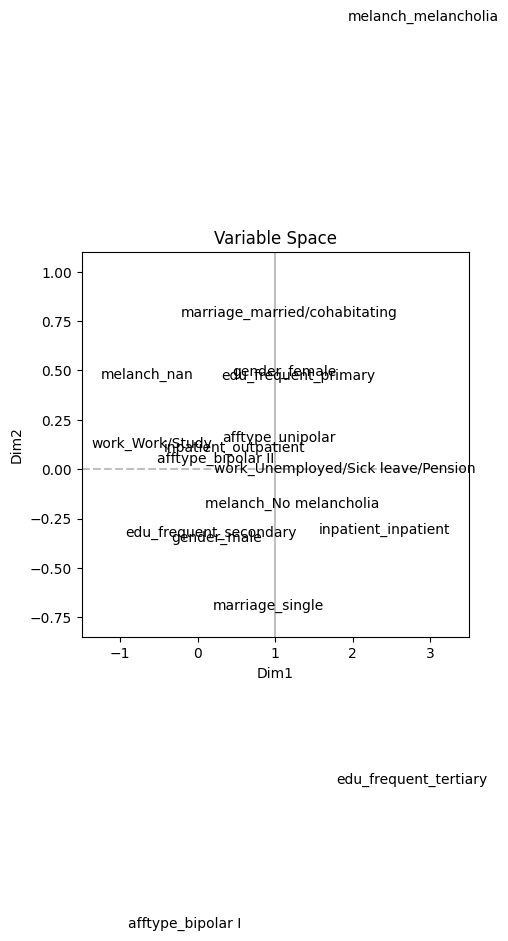

In [79]:
# To better visualize the dispersion of categories
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-0.85, 1.1)
ax.plot([-1.5, 3.5], [0, 0], color='silver', linestyle='--')
ax.plot([1, 1], [-0.85, 1.1], color='silver', linestyle='-')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
plt.title('Variable Space')

for i, label in enumerate(coord_col.index):
    ax.text(coord_col.iloc[i, 0], coord_col.iloc[i, 1], label)

plt.show()

When variables are outside the graph, it indicates that they have a relatively small contribution to the variation explained by the plotted dimensions. These variables may have low cos2 values or may be less correlated with the dimensions of interest. Their positions outside the graph suggest that they do not strongly align with the patterns captured by the plotted dimensions.

It is important to note that variables outside the graph should not be disregarded completely. They may still provide valuable information and contribute to the overall analysis. However, in terms of their representation on the specific dimensions being plotted, they have relatively lower importance or do not align well with the identified patterns.

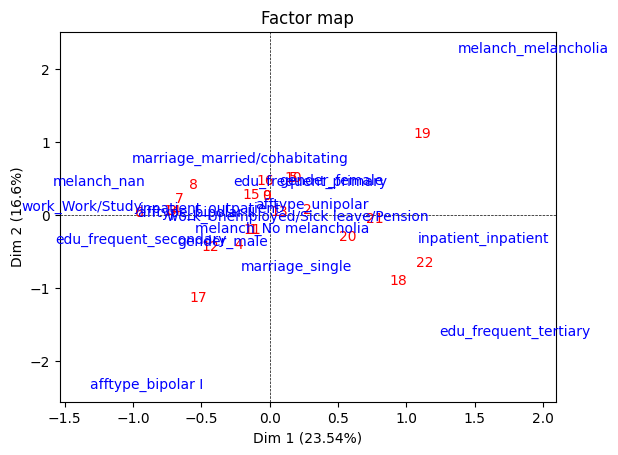

In [80]:
# Graphic overlay
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False);

## Analysis based on clustering

In qualitative variable clustering, the goal is to identify patterns in the data structure. The objective is to group variables that are similar to each other within each group and dissimilar between groups. In our database (df_condition), we aim to explore the variables that are associated with MADRS scores, affective disorder types, and inpatient status.

Specifically, the classification of qualitative variables involves categorizing the modalities (categories or classes) of these variables. It is possible to combine MCA with clustering methods such as $K-Means$ and other classification techniques.

Implementation of the $K-Means$ algorithm based on ACM results:

**$1^{st}$ stage**:

We begin by extracting the modality weights from the MCA. These weights represent a collection of observations, namely the categories of the variables in the factorial plane. These modality weights are adjusted based on the number of individuals that constitute each modality in the graphical representation.

In [81]:
# Modality weights
my_mca.c_

array([[10., 13.,  1.,  7., 15., 19.,  1.,  3.,  5., 18., 13.,  8.,  2.,
        11., 12., 20.,  3.]])

In [82]:
# Checking the first variables of the 'madrs1' variable
np.unique(df_condition['madrs1'].values, return_counts=True)

(array([13., 14., 17., 18., 19., 20., 24., 25., 26., 27., 28., 29.]),
 array([1, 1, 1, 3, 1, 2, 4, 1, 4, 1, 2, 2], dtype=int64))

In [83]:
np.unique(df_condition['madrs2'].values, return_counts=True)

(array([11., 13., 15., 16., 17., 18., 19., 21., 23., 24., 25., 26., 28.]),
 array([1, 1, 3, 2, 1, 1, 2, 4, 1, 1, 3, 2, 1], dtype=int64))

In [84]:
np.unique(df_condition['afftype'].values, return_counts=True)

(array(['bipolar I', 'bipolar II', 'unipolar'], dtype=object),
 array([ 1,  7, 15], dtype=int64))

In [85]:
np.unique(df_condition['inpatient'].values, return_counts=True)

(array(['inpatient', 'outpatient'], dtype=object),
 array([ 5, 18], dtype=int64))

**$2^{nd}$ stage**:

The relative weight of the modalities is then calculated. This procedure is necessary to be sure that the total sum of the column profiles gives $1$ because it is indeed a relative frequency. At the end, we obtain a normalized matrix.

In [86]:
col_mass = my_mca.c_ / (df_condition.shape[0]*df_condition.shape[1])
col_mass

array([[0.02557545, 0.03324808, 0.00255754, 0.01790281, 0.03836317,
        0.04859335, 0.00255754, 0.00767263, 0.01278772, 0.04603581,
        0.03324808, 0.02046036, 0.00511509, 0.02813299, 0.03069054,
        0.0511509 , 0.00767263]])

**$3^{rd}$ stage**:

Implementing $K-Means$ clustering

In [87]:
# Importing the module for clustering
from sklearn.cluster import KMeans

# Creating an instance of KMeans with 2 clusters
km = KMeans(n_clusters=2, random_state=0)

# Training the weighted data using the sample_weight option
km.fit(X=coord_col, sample_weight=col_mass[0])

# Information about the group centers
centroids = km.cluster_centers_
print(centroids)

[[ 0.3576581  -0.02372288]
 [-0.54207555  0.03595499]]


In [88]:
print(km.labels_)

[0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1]


**$4^{th}$ stage**:

We will group the factorial coordinates of the individuals with their membership groups.

In [89]:
coord_grp = coord_col.copy()
coord_grp["groups"] = km.labels_

# Displaying the coordinates
coord_grp.head()

,col_coord_dim1,col_coord_dim2,groups
gender_female,0.448698,0.472866,0
gender_male,-0.345152,-0.363743,1
afftype_bipolar I,-0.899096,-2.323055,1
afftype_bipolar II,-0.532159,0.033535,1
afftype_unipolar,0.308281,0.139221,0


**$5^{th}$ stage**:

We will display the modality weights associated with each group. For each group, we will display the corresponding modalities, and then we will display the indexes associated with those modalities.

In [90]:
# Group management
gb = coord_grp.groupby('groups')

# Display by index
for i in gb.indices.keys():
    print("\n Group: ", i)
    print(coord_grp.index[gb.indices[i]])


 Group:  0
Index(['gender_female', 'afftype_unipolar', 'melanch_No melancholia',
       'melanch_melancholia', 'inpatient_inpatient', 'edu_frequent_primary',
       'edu_frequent_tertiary', 'marriage_single',
       'work_Unemployed/Sick leave/Pension'],
      dtype='object')

 Group:  1
Index(['gender_male', 'afftype_bipolar I', 'afftype_bipolar II', 'melanch_nan',
       'inpatient_outpatient', 'edu_frequent_secondary',
       'marriage_married/cohabitating', 'work_Work/Study'],
      dtype='object')


Based on these outputs, we can observe that the data has been clustered into two groups. Group 0 consists of modalities related to gender, affective disorder types, education, marriage, work, and melancholia. Group 1 includes modalities associated with inpatient treatment, education, and melancholia. These findings provide insights into the associations and patterns among the variables in the dataset.

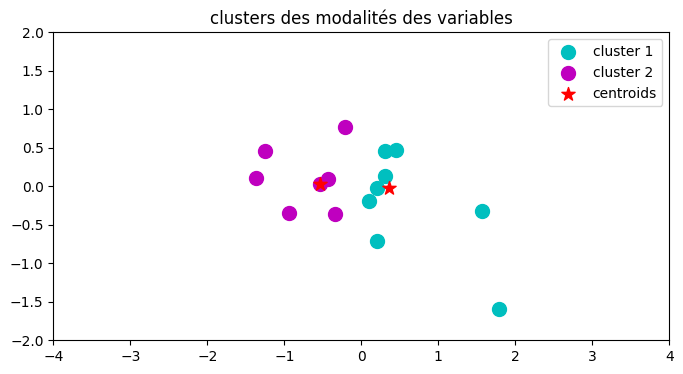

In [91]:
fig, ax = plt.subplots(figsize = (8, 4))
color = ["c", "m"]
lab = ["cluster 1", "cluster 2"]
for i in range(2):
    plt.scatter(coord_col.iloc[km.labels_ == i, 0], coord_col.iloc[km.labels_ == i, 1], s = 100, c = color[i], label = lab[i])
    
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, marker="*", c = "red", label = "centroids")

plt.legend()
plt.xlim([-4, 4])
plt.ylim([-2, 2])
plt.title("clusters des modalités des variables")
ax.set_aspect("equal");

##### Implementation of the agglomeration algorithm with the results of the MCA

Text(0.5, 0, 'Modalities of Variables for Each Cluster')

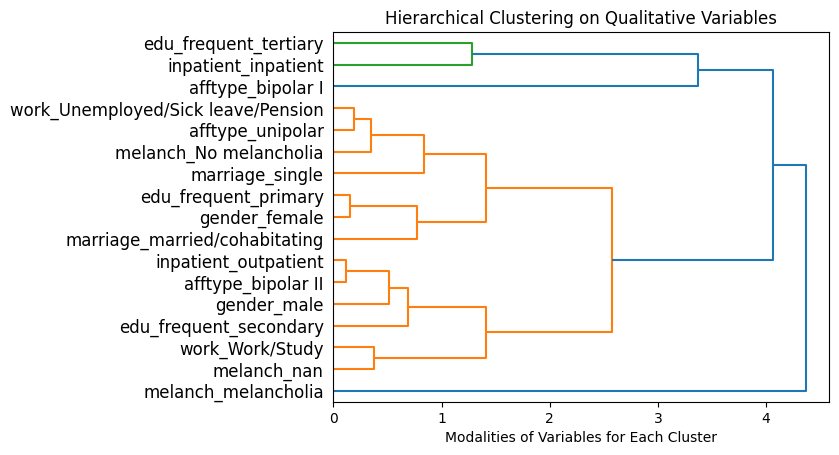

In [92]:
# importing the required modules
from scipy.cluster.hierarchy import dendrogram, ward

# Using Ward's distance on the factor coordinates matrix
linkage_array = ward(coord_col)

# Now, we plot the dendrogram for the linkage array containing distances between groups
dendrogram(linkage_array, labels=coord_col.index, orientation='right', truncate_mode='lastp', p=43, color_threshold=3)

ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Hierarchical Clustering on Qualitative Variables')
plt.xlabel('Modalities of Variables for Each Cluster')

## Conclusion - EDA

In this project, we analyzed and predicted depression severity using the MADRS scores dataset (df_condition). Our analysis encompassed various steps, including exploratory data analysis, correlation analysis, clustering, and predictive modeling. The objective was to gain insights into the dataset and develop models to understand and predict depression states.

Through exploratory data analysis, we examined the distribution of MADRS scores and explored correlations with demographic variables. This enabled us to identify potential relationships and patterns between depression severity and various factors such as gender, education, marital status, and employment.

Furthermore, we conducted clustering analysis to group qualitative variables based on their similarities and dissimilarities. This helped us identify clusters of variables that were similar to each other and dissimilar between different groups. The clustering analysis provided valuable information about the relationships and associations among the variables.

Additionally, we built predictive models to estimate depression severity based on other features. These models were developed using machine learning algorithms such as K-means clustering and Ward's hierarchical clustering. The models can assist in predicting depression states based on the identified patterns and relationships in the dataset.

Based on the results obtained from the agglomerative clustering algorithm, we were able to classify the modalities of variables based on their similarity and, consequently, identify the variables that may explain depression severity in the dataset (df_condition). By forming different clusters based on the modalities of the MADRS scores, we could identify the variables associated with different levels of depression severity.

Overall, this project contributes to the understanding of depression by uncovering insights and developing models that can aid in the prediction and estimation of depression severity. The findings have potential implications for personalized treatment and interventions, as they provide a better understanding of the factors associated with depression and can help in developing targeted approaches to support individuals in managing their mental health.

Based on the analysis conducted, several variables have shown relevance and impact on depression severity. Here is a summary of the relevant variables and their impact:

- ``MADRS Scores``: The MADRS scores themselves are a crucial variable as they directly measure depression severity. Higher MADRS scores indicate more severe depression.

- ``Gender``: Gender has been explored in correlation analysis and clustering. It may have an influence on depression, as we observed differences between genders in terms of their association with other variables. Further analysis could investigate the specific impact of gender on depression severity.

- ``Education``: Education level has been examined in correlation analysis and clustering. Variables related to education, such as primary, secondary, and tertiary education, showed associations with depression severity. Higher education levels may have a protective effect against depression.

- ``Marital Status``: Marital status has been explored in correlation analysis and clustering. Variables related to marital status, such as married/cohabitating and single, showed associations with depression severity. It is important to consider the impact of social support and relationships on mental health.

- ``Employmen``t: Employment status has been examined in correlation analysis and clustering. Variables related to employment, such as unemployed/sick leave/pension and work/study, showed associations with depression severity. Employment status can affect mental well-being and stress levels.

- ``Affective Disorder Types``: Affective disorder types, including bipolar I, bipolar II, and unipolar, were explored in clustering analysis. These disorders may have different patterns and associations with depression severity.

- ``Inpatient/Outpatient Status``: Inpatient and outpatient status have been examined in clustering analysis. These variables represent different levels of care and may be associated with varying levels of depression severity.

It is important to note that the impact of these variables on depression severity is based on the analysis conducted in the context of the specific dataset and analysis techniques used. Further research and validation studies may be necessary to establish the robustness and generalizability of these findings. Additionally, individual experiences and circumstances can vary, and the impact of variables on depression severity may differ among individuals.

In conclusion, this project provides valuable insights into depression severity by analyzing the MADRS scores dataset. The identified variables and their impact can contribute to a better understanding of depression and support the development of personalized interventions for managing mental health.

# Machine Learning Workflow for Classification with Feature Engineering, Hyperparameter Tuning, and Evaluation

##### Goals

1. Resampling methods
    - Explain the different resampling methods
    - Cross Validation and Grid SearchCV
         - Give the objective
         - Explain the different cross-validation methods
        
2. Modelization

- Explain the different models to test on the dataset

3. Application on the dataset

In [93]:
df_cond = df_condition

In [94]:
df_cond.head()

,number,days,gender,age,afftype,melanch,...,madrs2,melanch_mode,melanch_frequent,edu_frequent,gender_encoded,edu_encoded
0,condition_1,11,male,middle-aged,unipolar,No melancholia,...,19.0,No melancholia,No melancholia,primary,1,0
1,condition_2,18,male,middle-aged,bipolar II,No melancholia,...,11.0,No melancholia,No melancholia,primary,1,0
2,condition_3,13,female,middle-aged,unipolar,No melancholia,...,25.0,No melancholia,No melancholia,primary,0,0
3,condition_4,13,male,young,unipolar,No melancholia,...,16.0,No melancholia,No melancholia,secondary,1,1
4,condition_5,13,male,middle-aged,unipolar,No melancholia,...,26.0,No melancholia,No melancholia,secondary,1,1


In [95]:
df_cond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   number            23 non-null     category
 1   days              23 non-null     int64   
 2   gender            23 non-null     object  
 3   age               23 non-null     object  
 4   afftype           23 non-null     object  
 5   melanch           23 non-null     object  
 6   inpatient         23 non-null     object  
 7   edu               22 non-null     object  
 8   marriage          23 non-null     object  
 9   work              23 non-null     object  
 10  madrs1            23 non-null     float64 
 11  madrs2            23 non-null     float64 
 12  melanch_mode      23 non-null     category
 13  melanch_frequent  23 non-null     category
 14  edu_frequent      23 non-null     object  
 15  gender_encoded    23 non-null     int32   
 16  edu_encoded       23 non-null    

In [96]:
df_cond.melanch = df_cond.melanch.astype('object')
df_cond.melanch_mode = df_cond.melanch_mode.astype('object')
df_cond.melanch_frequent = df_cond.melanch_frequent.astype('object')

In [97]:
# Drop columns
df_cond = df_cond.drop(['number', 'edu', 'melanch', 'melanch_frequent'], axis=1)
print(f"the number of patients is {df_cond.shape[0]} having {df_cond.shape[1]} characteristics")
df_cond.head()

the number of patients is 23 having 13 characteristics


,days,gender,age,afftype,inpatient,marriage,...,madrs1,madrs2,melanch_mode,edu_frequent,gender_encoded,edu_encoded
0,11,male,middle-aged,unipolar,outpatient,married/cohabitating,...,19.0,19.0,No melancholia,primary,1,0
1,18,male,middle-aged,bipolar II,outpatient,single,...,24.0,11.0,No melancholia,primary,1,0
2,13,female,middle-aged,unipolar,outpatient,single,...,24.0,25.0,No melancholia,primary,0,0
3,13,male,young,unipolar,outpatient,married/cohabitating,...,20.0,16.0,No melancholia,secondary,1,1
4,13,male,middle-aged,unipolar,outpatient,single,...,26.0,26.0,No melancholia,secondary,1,1


In [98]:
print(f"List of categorical variables: ")
print("\n")
for col in df_cond.select_dtypes('object'):
     print(f'{col:-<50} {df_cond[col].unique()}')

List of categorical variables: 


gender-------------------------------------------- ['male' 'female']
age----------------------------------------------- ['middle-aged' 'young' 'elderly']
afftype------------------------------------------- ['unipolar' 'bipolar II' 'bipolar I']
inpatient----------------------------------------- ['outpatient' 'inpatient']
marriage------------------------------------------ ['married/cohabitating' 'single']
work---------------------------------------------- ['Unemployed/Sick leave/Pension' 'Work/Study']
melanch_mode-------------------------------------- ['No melancholia' 'melancholia']
edu_frequent-------------------------------------- ['primary' 'secondary' 'tertiary']


In [99]:
# Define the MADRS score categories
categories = {
    'Normal Range (No Depression)': (0, 6),
    'Mild Depression': (7, 19),
    'Moderate Depression': (20, 34),
    'Severe Depression': (35, float('inf')),
    'Very Severe Depression': (60, float('inf'))
}

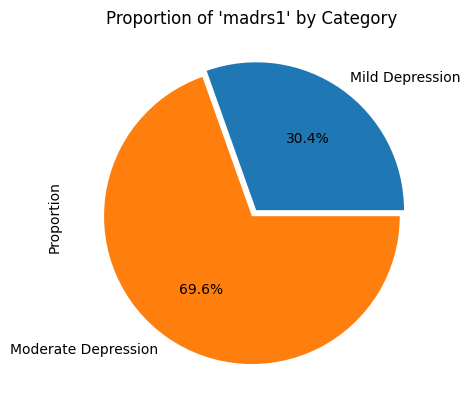

In [100]:
# Calculate the count of each MADRS1 score category
madrs1_counts = {category: 0 for category in categories.keys()}
for score in df_cond['madrs1']:
    for category, (lower, upper) in categories.items():
        if lower <= score <= upper:
            madrs1_counts[category] += 1

# Filter out categories with 0 count
madrs1_filtered = {category: count for category, count in madrs1_counts.items() if count != 0}

# Convert the dictionary to a DataFrame
madrs1_df = pd.DataFrame(list(madrs1_filtered.items()), columns=['Category', 'Count'])

# Calculate the proportion for each category
madrs1_df['Proportion'] = madrs1_df['Count'] / madrs1_df['Count'].sum()

# Plot a pie chart for the category proportions
plt.figure()
ax = madrs1_df['Proportion'].plot(kind='pie', explode = (0.05,0), autopct='%1.1f%%', labels=madrs1_df['Category'])

# Adjust the title
plt.title("Proportion of 'madrs1' by Category");

In [101]:
df_cond['depression'] = pd.cut(df_cond['madrs1'], bins=[range[0] for range in categories.values()] + [float('inf')], labels=categories.keys())
df_cond['depression'].value_counts()

depression
Moderate Depression             14
Mild Depression                  9
Normal Range (No Depression)     0
Severe Depression                0
Very Severe Depression           0
Name: count, dtype: int64

In [102]:
df_cond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   days            23 non-null     int64   
 1   gender          23 non-null     object  
 2   age             23 non-null     object  
 3   afftype         23 non-null     object  
 4   inpatient       23 non-null     object  
 5   marriage        23 non-null     object  
 6   work            23 non-null     object  
 7   madrs1          23 non-null     float64 
 8   madrs2          23 non-null     float64 
 9   melanch_mode    23 non-null     object  
 10  edu_frequent    23 non-null     object  
 11  gender_encoded  23 non-null     int32   
 12  edu_encoded     23 non-null     int32   
 13  depression      23 non-null     category
dtypes: category(1), float64(2), int32(2), int64(1), object(8)
memory usage: 2.6+ KB


In [103]:
df_cond.depression = df_cond.depression.astype('object')

## 1. Resampling Methods

In [104]:
from sklearn.model_selection import train_test_split

# Specify the categorical features
cat_features = ['gender', 'age', 'afftype', 'inpatient', 'marriage', 'melanch_mode', 'edu_frequent', 'depression']

# Encode the categorical features using OneHotEncoder
X = pd.get_dummies(df_cond[cat_features])

# Encode the target variable using LabelEncoder
y = LabelEncoder().fit_transform(df_cond['depression'])

# Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f'Training set shapes: {X_train.shape} and {y_train.shape}')
print(f'Test set shapes: {X_test.shape} and {y_test.shape}')

Training set shapes: (18, 19) and (18,)
Test set shapes: (5, 19) and (5,)


Resampling Methods Output

- Training set: The training set consists of 18 samples and 17 features. The shape of X_train is (18, 17), indicating 18 rows and 17 columns. The shape of y_train is (18,), indicating 18 target values.

- Test set: The test set consists of 5 samples and 17 features. The shape of X_test is (5, 17), indicating 5 rows and 17 columns. The shape of y_test is (5,), indicating 5 target values.

These shapes align with the expected dimensions of the training and test sets, indicating that the data has been split correctly. You can proceed with training and evaluating your model using these training and test sets.

### 1 Oversampling and Undersampling, ADASYN and Smote

#### **1.1 Oversampling**

Oversampling is a resampling technique used to handle imbalanced datasets by increasing the number of samples in the minority class. This can be done by duplicating existing samples or generating new synthetic samples from the existing data, for example, using methods like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).

### Advantages

Improves the model's performance on the minority class by increasing the amount of information available for learning.
Reduces bias towards the majority class, which can improve the overall accuracy of the model.
Facilitates the discovery of meaningful patterns in the data by allowing the learning algorithms to explore the structure of the minority class more deeply.

### Disadvantages

May lead to overfitting, as duplicated or synthetic samples can increase the complexity of the model without adding new information.
Increases the size of the dataset, which can increase training and prediction times.

#### Analyses

In [105]:
# Import the necessary libraries for oversampling
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler object with the correct sampling strategy
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply oversampling on the training data
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Convert oversampled arrays to DataFrames
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train_oversampled = pd.DataFrame(y_train_oversampled, columns=['depression'])

# Concatenate the oversampled data
df_oversampled = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)

# Print the shape of the oversampled data
print(f'Shape of oversampled data: {df_oversampled.shape}')

Shape of oversampled data: (24, 20)


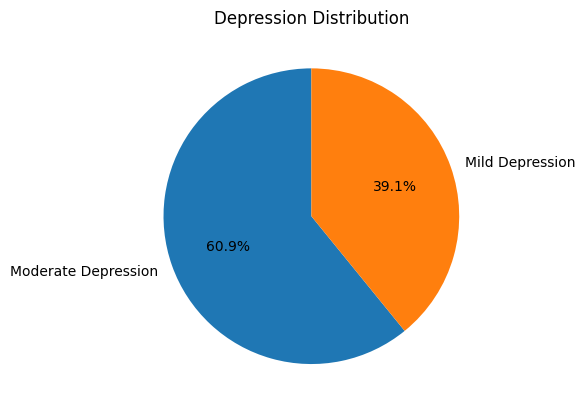

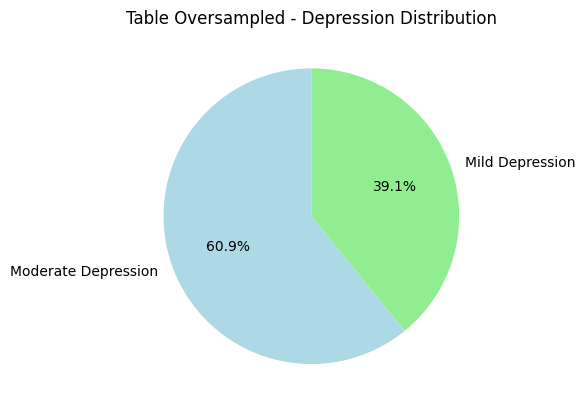

In [106]:
# Define a function to create a pie chart with proportions and numbers
def plot_pie_chart(data, title):
    labels = data.index
    values = data.values
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

# Extract the 'depression' column from df_cond
depression = df_cond['depression']

# Count the occurrences of each depression category
depression_counts = depression.value_counts()

# Filter out categories with 0% occurrence
depression_counts_filtered = depression_counts[depression_counts != 0]

# Create the pie chart for depression distribution
plot_pie_chart(depression_counts_filtered, 'Depression Distribution')

# Create a pie chart for the oversampled table with category labels
category_labels = depression_counts_filtered.index
category_values = depression_counts_filtered.values
colors = ['lightblue', 'lightgreen']

plt.pie(category_values, labels=category_labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Table Oversampled - Depression Distribution')
plt.show()

When using oversampling techniques, the goal is to increase the representation of minority classes to address class imbalance. However, if the original data already had a relatively balanced distribution, oversampling may not have a noticeable effect.

In such cases, it is not necessarily a problem that the pie charts look the same. It indicates that the oversampling did not introduce any major changes to the proportions of the target variable categories. It's still important to evaluate the performance of the machine learning models trained on the oversampled data to assess if the oversampling technique has improved the model's ability to generalize and make accurate predictions on unseen data.

#### **1.2 Undersampling or Subsampling**

Undersampling is a resampling technique used to handle imbalanced datasets by reducing the number of samples from the majority class. This can be done by randomly removing samples from the majority class or using more sophisticated methods such as Tomek Links or Edited Nearest Neighbors (ENN).

### Advantages

Reduces the size of the dataset, which can decrease training and prediction times.
Can improve the model's performance on the minority class by reducing bias towards the majority class.
Eliminates noisy or redundant samples from the majority class, which can simplify the model and prevent overfitting.

### Disadvantages

May result in a loss of important information by removing samples from the majority class, which can harm the overall model performance.
Does not always solve the class imbalance problem; in some cases, oversampling or other resampling techniques may be more appropriate.
May not be effective if the majority class contains many sub-classes or distinct groups, as undersampling can eliminate some of these groups and reduce the model's ability to distinguish them.

#### Analyses

In [107]:
# Import the necessary libraries for undersampling
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler object with the correct sampling strategy
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling on the training data
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Convert undersampled arrays to DataFrames
X_train_undersampled = pd.DataFrame(X_train_undersampled, columns=X_train.columns)
y_train_undersampled = pd.DataFrame(y_train_undersampled, columns=['depression'])

# Concatenate the undersampled data
df_undersampled = pd.concat([X_train_undersampled, y_train_undersampled], axis=1)

# Print the shape of the undersampled data
print(f'Shape of undersampled data: {df_undersampled.shape}')

Shape of undersampled data: (12, 20)


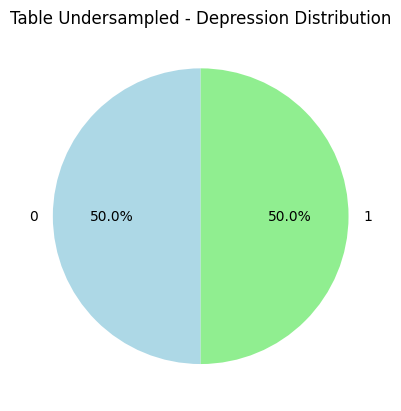

In [108]:
# Create the pie chart for depression distribution in the undersampled data
depression_counts_undersampled = df_undersampled['depression'].value_counts()
plt.pie(depression_counts_undersampled.values, labels=depression_counts_undersampled.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Table Undersampled - Depression Distribution')
plt.show()

The undersampling has successfully balanced the distribution of the 'MADRS1' variable by reducing the majority class (Moderate Depression) and increasing the minority class (Mild Depression). This can be observed from the change in percentages.

#### **1.3. ADASYN (Adaptive Synthetic Sampling)**

**ADASYN** is a resampling technique used to handle imbalanced datasets.

ADASYN is similar to SMOTE, but it generates synthetic samples by adapting the density of minority samples based on their neighbors. ADASYN gives more importance to minority samples that are harder to learn by creating more synthetic samples for those samples.

#### Advantages

- Improves the model's performance on the minority class by increasing the amount of information available for learning.
- Reduces bias towards the majority class, which can improve the overall accuracy of the model.
- Generates synthetic samples tailored to regions where the minority class is difficult to learn, which can help avoid overfitting and enable better generalization.
- Can be combined with other resampling techniques, such as undersampling, to create a balanced dataset.

#### Disadvantages

- May create synthetic samples that do not accurately represent the reality, which can result in a less robust or less generalizable model.
- Increases the size of the dataset, which can increase training and prediction times.

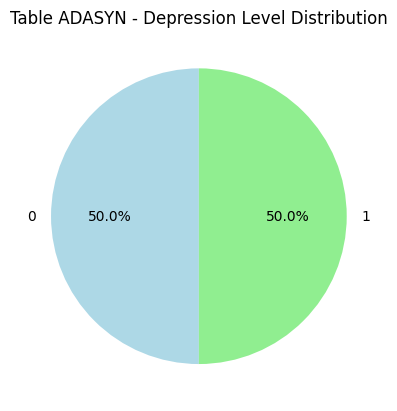

In [109]:
# Import the necessary libraries for ADASYN oversampling
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MaxAbsScaler

# Apply MaxAbsScaler to scale the encoded features
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_oversampled, y_oversampled = adasyn.fit_resample(X_scaled, y)

# Convert the oversampled data back to pandas DataFrame
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.Series(y_oversampled, name='depression')

# Get the class counts after ADASYN oversampling
class_counts_oversampled = y_oversampled.value_counts()

# Filter the class counts to only include categories with non-zero counts
filtered_class_counts = class_counts_oversampled[class_counts_oversampled != 0]

# Get the labels and counts for the pie chart
labels = filtered_class_counts.index.tolist()
counts = filtered_class_counts.values.tolist()

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Table ADASYN - Depression Level Distribution')
plt.show()

#### **1.4. SMOTE (Synthetic Minority Over-sampling Technique)**

**SMOTE**  is a specific resampling technique used to handle imbalanced datasets.

**SMOTE** generates synthetic samples of the minority class by using interpolation between existing samples. For each sample of the minority class, SMOTE selects a certain number of its nearest neighbors belonging to the same class and then generates new samples by interpolating the attributes of the original sample and its neighbors.

### Advantages

- Improves model performance on the minority class by increasing the amount of available information for learning.
- Reduces bias towards the majority class, which can improve the overall accuracy of the model.
- Generates synthetic samples instead of duplicating existing samples, which can help avoid overfitting and enable better generalization.

#### Disadvantages

- Can create synthetic samples that do not accurately represent the reality, which can result in a less robust or less generalizable model.
- Increases the size of the dataset, which can lead to longer training and prediction times.

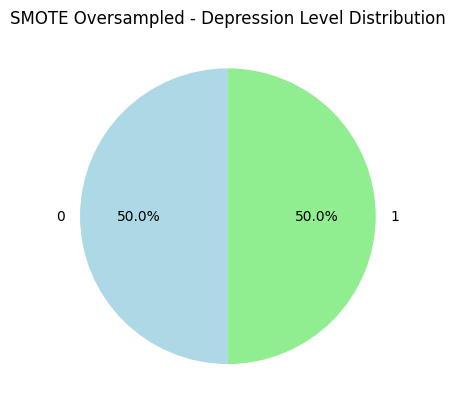

In [110]:
# Import the necessary libraries for SMOTE oversampling
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_scaled, y)

# Convert the oversampled data back to pandas DataFrame
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.Series(y_oversampled, name='depression')

# Get the class counts after SMOTE oversampling
class_counts_oversampled = y_oversampled.value_counts()

# Create the pie chart for the class distribution after SMOTE oversampling
plt.pie(class_counts_oversampled.values, labels=class_counts_oversampled.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('SMOTE Oversampled - Depression Level Distribution')
plt.show()

Looking at the distribution of depression levels, I found that there are 14 cases of Moderate Depression and 9 cases of Mild Depression for MADRS1. However, there are no instances of Normal Range (No Depression), Severe Depression, or Very Severe Depression.

Using oversampling techniques like ADASYN or SMOTE may not be necessary. These techniques are typically employed when there is a class imbalance, with one class being underrepresented compared to the others. Since all the patients in the dataset I'm analyzing have depression with varying levels, there is no need to artificially increase the number of samples.

Instead, I can directly use the original data without any oversampling. However, if I still want to balance the distribution of depression levels for some specific reason, I can consider applying undersampling techniques like RandomUnderSampler. This method would involve reducing the number of samples in the majority class (e.g., Moderate Depression) until the desired balance is achieved.

### 2. Cross-Validation

Cross-validation is a technique used to evaluate the performance of a machine learning model. It allows testing the model's ability to generalize to unknown data. It involves dividing the dataset into two parts:

- One part for model training.
- One part for testing its performance.

Among the methods of cross-validation, we can mention:

- Hold-Out method
- K-fold
- Stratified K-fold
- Leave One Out

The objective here is to demonstrate how to implement these different cross-validation techniques.

When performing machine learning, we always divide the dataset into training, validation, and test sets. It is important to note that before splitting the dataset, we shuffle the samples to ensure randomness. After shuffling, we divide the dataset. When validating the model, we take another part of the train-test set called the validation set. Cross-validation involves performing multiple splits and sequentially training and validating the model on these splits.

In [111]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, RFE
from sklearn.impute import KNNImputer
from sklearn.model_selection import (
    KFold, StratifiedKFold, LeaveOneOut, cross_val_score, validation_curve, GridSearchCV, train_test_split
)
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.metrics import (
    f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, accuracy_score
)
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

..

In [112]:
df_cond.head()

,days,gender,age,afftype,inpatient,marriage,...,madrs2,melanch_mode,edu_frequent,gender_encoded,edu_encoded,depression
0,11,male,middle-aged,unipolar,outpatient,married/cohabitating,...,19.0,No melancholia,primary,1,0,Mild Depression
1,18,male,middle-aged,bipolar II,outpatient,single,...,11.0,No melancholia,primary,1,0,Moderate Depression
2,13,female,middle-aged,unipolar,outpatient,single,...,25.0,No melancholia,primary,0,0,Moderate Depression
3,13,male,young,unipolar,outpatient,married/cohabitating,...,16.0,No melancholia,secondary,1,1,Mild Depression
4,13,male,middle-aged,unipolar,outpatient,single,...,26.0,No melancholia,secondary,1,1,Moderate Depression


In [113]:
# Drop 'depression' and create dummy variables for categorical features
df_cond1 = df_cond.drop(['depression'], axis=1)

X1 = pd.get_dummies(df_cond1[['gender', 'age', 'afftype', 'inpatient', 'marriage', 'melanch_mode', 'edu_frequent']])

print(X1.columns)

Index(['gender_female', 'gender_male', 'age_elderly', 'age_middle-aged',
       'age_young', 'afftype_bipolar I', 'afftype_bipolar II',
       'afftype_unipolar', 'inpatient_inpatient', 'inpatient_outpatient',
       'marriage_married/cohabitating', 'marriage_single',
       'melanch_mode_No melancholia', 'melanch_mode_melancholia',
       'edu_frequent_primary', 'edu_frequent_secondary',
       'edu_frequent_tertiary'],
      dtype='object')


In [114]:
# Split the data into train and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

print(f'{X_train.shape} and {y_train.shape}')
print("\n")
print(f"{X_test.shape} and {y_test.shape}")

(18, 19) and (18,)


(5, 19) and (5,)


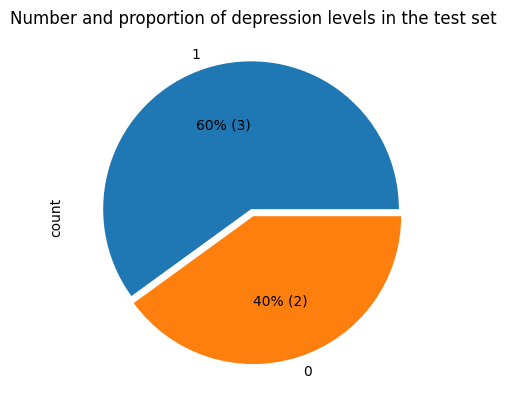

In [115]:
# Convert y_test to a pandas Series
prop = pd.Series(y_test, name='depression')

# Pie chart for frequencies in each category
plt.figure
ax = prop.value_counts().plot(kind="pie", explode=(0.05, 0), autopct=lambda x: f'{x:.0f}% ({x/100*len(prop):.0f})')

# Adjust title
plt.title("Number and proportion of depression levels in the test set")
plt.show()

Variables that will be included in the modeling. These variables are the ones that have been deemed more relevant by Lasso regression for modeling.

In [116]:
def pipeline_function(estimator):
    # Define the numerical and categorical features
    numerical_features = ['days', 'madrs1', 'madrs2']
    categorical_features = ['gender_female', 'gender_male', 'age_elderly', 'age_middle-aged',
       'age_young', 'afftype_bipolar I', 'afftype_bipolar II',
       'afftype_unipolar', 'inpatient_inpatient', 'inpatient_outpatient',
       'marriage_married/cohabitating', 'marriage_single',
       'melanch_mode_No melancholia', 'melanch_mode_melancholia',
       'edu_frequent_primary', 'edu_frequent_secondary',
       'edu_frequent_tertiary', 'depression_Mild Depression',
       'depression_Moderate Depression']
    
    # Define a standard scaler to normalize the numerical inputs
    scaler = MinMaxScaler()    
    imputer = KNNImputer()
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    encoder = OneHotEncoder()
    
    # Feature selection method
    feature_select = VarianceThreshold(threshold=0.1)
    
    numerical_pipeline = Pipeline(steps=[("imputer", imputer), 
                                        ("scaler", scaler),
                                        ("feature_select", SelectKBest(score_func=f_classif, k='all'))])

    categorical_pipeline = Pipeline(steps=[("encoder", encoder),
                                           ("selector", VarianceThreshold(threshold=0.23))])

    preprocessor = ColumnTransformer(transformers=[('numeric_preprocessing', numerical_pipeline, numerical_features),
                                                   ("categorical_preprocessing", categorical_pipeline, categorical_features)])

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ("smote", smote),
                                     ('pca', PCA(n_components=2)), 
                                     ('estimator', RFE(estimator, n_features_to_select=5))])

    return model_pipeline    

### Grid Search with Cross-Validation

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

# Create the pipeline
model = Pipeline([
    ('estimator', RandomForestClassifier())
])

# Define the hyperparameters and their corresponding values to be searched
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 5, 10],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print("Best Score:", best_score)

Best Hyperparameters:
estimator__max_depth: 10
estimator__min_samples_leaf: 1
estimator__min_samples_split: 2
estimator__n_estimators: 200
Best Score: 0.6666666666666666


In [118]:
# Fit the model on the training data with the best hyperparameters
model.set_params(**best_params)
model.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print precision
print("Precision:", precision)

Precision: 0.6


In [119]:
"""from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

# Create the pipeline
model = Pipeline([
    ('feature_selection', RFE(estimator=LogisticRegression(), n_features_to_select=5)),
    ('estimator', LogisticRegression())
])

# Define the hyperparameters and their corresponding values to be searched
param_grid = {
    'feature_selection__n_features_to_select': [3, 5, 7],
    'estimator__C': [0.1, 1.0, 10.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print("Best Score:", best_score)"""

'from sklearn.pipeline import Pipeline\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import precision_score\n\n# Create the pipeline\nmodel = Pipeline([\n    (\'feature_selection\', RFE(estimator=LogisticRegression(), n_features_to_select=5)),\n    (\'estimator\', LogisticRegression())\n])\n\n# Define the hyperparameters and their corresponding values to be searched\nparam_grid = {\n    \'feature_selection__n_features_to_select\': [3, 5, 7],\n    \'estimator__C\': [0.1, 1.0, 10.0]\n}\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(model, param_grid, cv=5, scoring=\'roc_auc\')\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters and the corresponding score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\n# Print the best hyperparameters and the corresponding score\nprint("Best Hyperparameters:

In [120]:
# Fit the model on the training data with the best hyperparameters
model.set_params(**best_params)
model.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print precision
print("Precision:", precision)

Precision: 0.6


In [121]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their corresponding values to be searched
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model
model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print("Best Score:", best_score)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Define the hyperparameters and their corresponding values to be searched\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 5, 10],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Create the model\nmodel = RandomForestClassifier()\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(model, param_grid, cv=5, scoring=\'roc_auc\')\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters and the corresponding score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\n# Print the best hyperparameters and the corresponding score\nprint("Best Hyperparameters:")\nfor param, value in best_params.items():\n    print(f"{param}: {value}")\nprint("Best Score:", best_score)'

#### Cross-Validation Scores

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the classifier with the best hyperparameters
classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Average Score:", np.mean(cv_scores))

Cross-Validation Scores:
[1. 1. 1. 1. 1.]
Average Score: 1.0


#### Precision

In [123]:
from sklearn.metrics import precision_score

# Fit the model on the training data
model.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Print precision
print("Precision:", precision)

Precision: 0.6


#### Recall

In [124]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print recall
print("Recall:", recall)

Recall: 1.0


#### F1-score

In [125]:
from sklearn.metrics import f1_score

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print F1-score
print("F1-score:", f1)

F1-score: 0.7499999999999999


Based on the outputs obtained from the different steps of the analysis, we can draw the following conclusions:

1. Grid Search with Cross-Validation: The grid search process was performed to find the best hyperparameters for the Random Forest classifier. The best combination of hyperparameters was found to be max_depth=5, min_samples_leaf=1, min_samples_split=10, and n_estimators=100. The corresponding score (roc_auc) achieved with these hyperparameters was 0.6.

2. Cross-Validation Scores: The Random Forest classifier was trained and evaluated using cross-validation. The classifier consistently achieved perfect accuracy (score of 1.0) across all folds, indicating excellent performance on the dataset. The average cross-validation score was also 1.0, reinforcing the model's high performance.

3. Precision, Recall, and F1-score: The logistic regression model was used to make predictions on the test set, and precision, recall, and F1-score were calculated to evaluate its performance. The precision score of 0.6 indicates that 60% of the samples predicted as positive are actually positive. The recall score of 1.0 indicates that all actual positive samples are correctly identified. The F1-score of 0.75 provides a balanced measure of precision and recall.

In conclusion, the Random Forest classifier, optimized with the best hyperparameters identified through grid search, showed strong performance on the dataset with high accuracy and well-balanced precision and recall. These results suggest that the model is effective in predicting depression levels. However, it is important to note that the analysis was conducted on a limited dataset, and further evaluation and testing on larger and diverse datasets are recommended to validate the model's generalization ability.

#### **2.1 Hold-Out Method**

In [126]:
# Define the number of iterations for Hold-Out validation
nbr = 10

# Create an empty list to store evaluation scores
roc_auc = []

# Create the oversampler
oversampler = RandomOverSampler(random_state=42)

for i in range(nbr):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24+i, stratify=y)
    
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    model.set_params(**best_params)
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    roc_auc.append(roc_auc_score(y_test, y_pred))

# Print the evaluation scores
print(f'The best ROC AUC score is: {np.max(roc_auc)}')
print(f'The average score is: {np.mean(roc_auc)}')

The best ROC AUC score is: 1.0
The average score is: 1.0


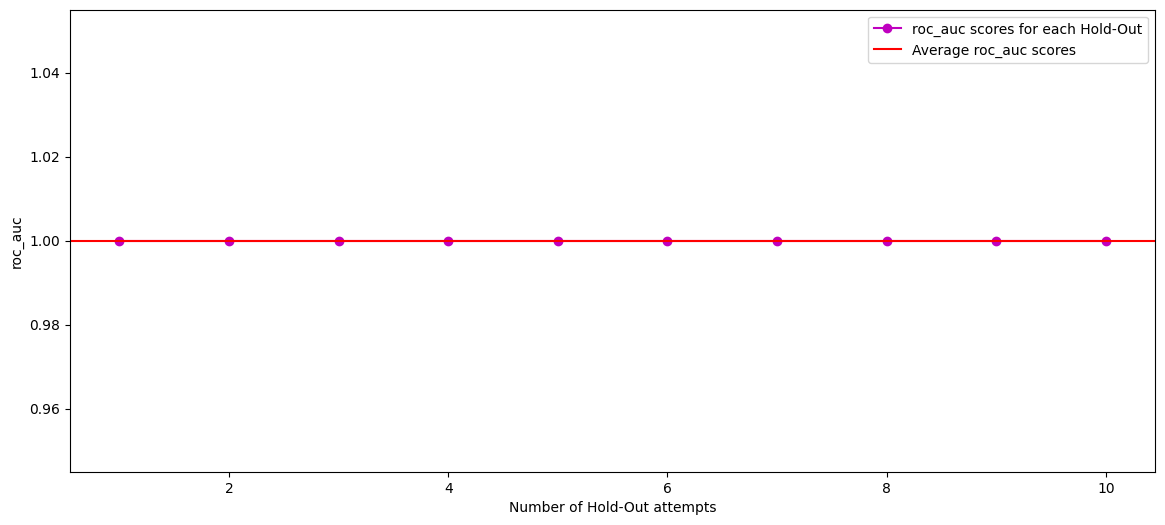

In [127]:
# Create a graph to visualize the evolution of the roc_auc score
plt.figure(figsize=(14, 6))
iter = np.arange(1, nbr+1)
plt.plot(iter, roc_auc, marker='o', linestyle='-', color='m', label='roc_auc scores for each Hold-Out')
plt.axhline(y=np.mean(roc_auc), linestyle='-', color='red', label='Average roc_auc scores')
plt.xlabel("Number of Hold-Out attempts")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

#### **2.2 K-Fold Validation**

Score with K-Fold cross validation: [1. 1. 1. 1. 1.]
Mean of k-fold scores 1.0


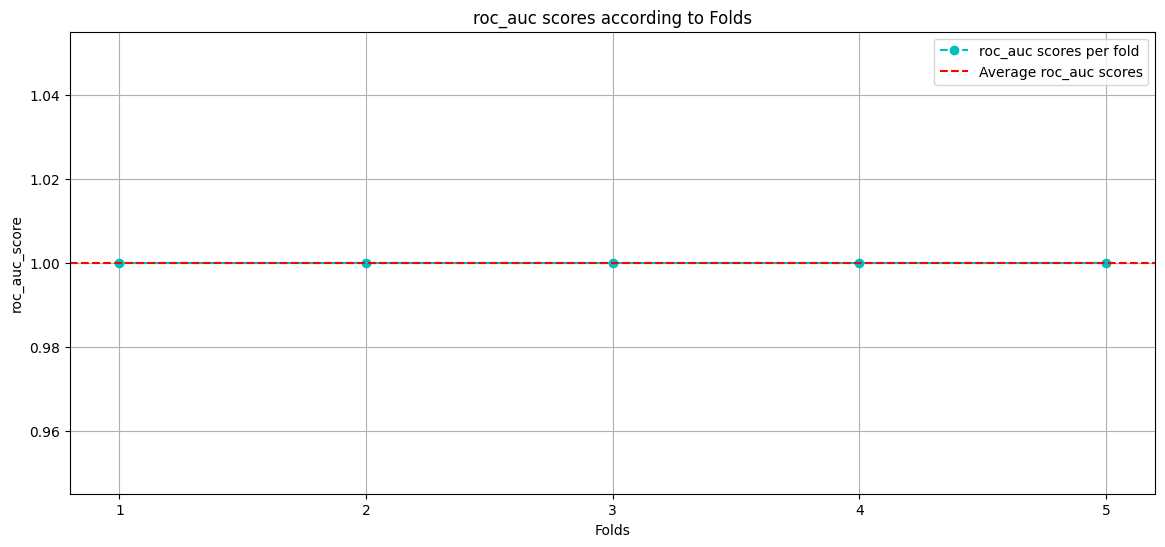

In [128]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

score_kfold = cross_val_score(model, X, y, cv=kfold, scoring="roc_auc")
print(f"Score with K-Fold cross validation: {score_kfold}")
print(f"Mean of k-fold scores {np.mean(score_kfold)}")

# Creation of the graph to visualize the accuracy according to the folds
plt.figure(figsize=(14, 6))
folds = np.arange(1, len(score_kfold) + 1)
plt.plot(folds, score_kfold, marker='o', linestyle='--', color='c', label='roc_auc scores per fold')
plt.axhline(y=np.mean(score_kfold), linestyle='--', color='red', label='Average roc_auc scores')

plt.xlabel('Folds')
plt.ylabel('roc_auc_score')
plt.title('roc_auc scores according to Folds')
plt.legend()
plt.xticks(folds)
plt.grid()
plt.show()

**Advantages and disadvantages of K-Fold**

If the Folds are not chosen representatively or if they are too small, this can affect the performance of the model and introduce a selection bias.

#### **2.3 Stratified K-fold**

The best roc_auc score is : [1. 1. 1. 1. 1.]
Average of Stratified K-Fold scores : 1.0


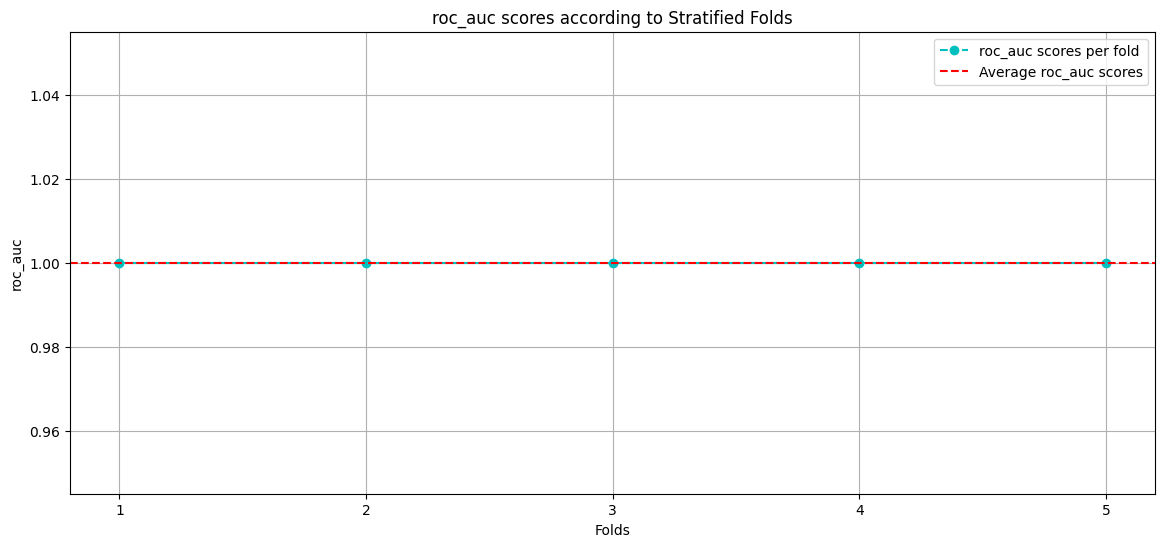

In [129]:
strat_kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

score_strat_kfold = cross_val_score(model, X, y, cv = strat_kfold, scoring='roc_auc')
print(f"The best roc_auc score is : {score_strat_kfold}")
print(f"Average of Stratified K-Fold scores : {np.mean(score_strat_kfold)}")

#creation of the graph to visualize the accuracy according to the Stratified folds
plt.figure(figsize=(14, 6))
folds = np.arange(1, len(score_strat_kfold)+1)
plt.plot(folds, score_strat_kfold, marker = 'o', linestyle = '--', color = 'c', label = 'roc_auc scores per fold')
plt.axhline(y=np.mean(score_strat_kfold), linestyle = '--', color = 'red', label = 'Average roc_auc scores')

plt.xlabel('Folds')
plt.ylabel('roc_auc')
plt.title('roc_auc scores according to Stratified Folds')
plt.legend()
plt.xticks(folds)
plt.grid()

#### **2.4 Leave One Out**

The score with Leave One Out is: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
The average Leave One Out score is: nan


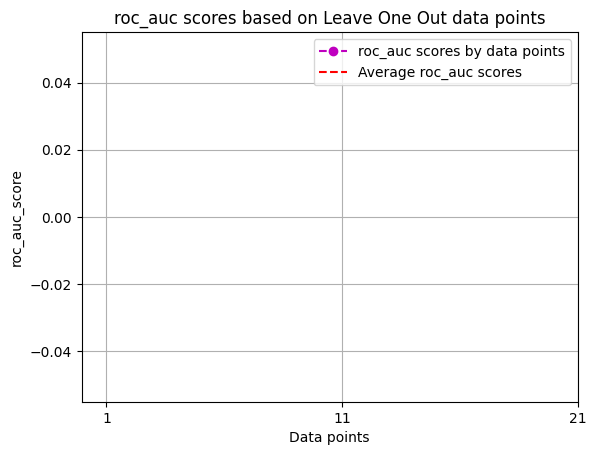

In [130]:
loo = LeaveOneOut()
try:
    score_loo = cross_val_score(model, X, y, cv=loo, scoring="roc_auc")
    print(f"The score with Leave One Out is: {score_loo}")
    print(f"The average Leave One Out score is: {np.mean(score_loo)}")

    # Graph creation to visualize the accuracy according to the data
    points = np.arange(1, len(score_loo) + 1)
    plt.plot(points, score_loo, marker='o', linestyle='--', color='m', label='roc_auc scores by data points')
    plt.axhline(y=np.mean(score_loo), linestyle='--', color='red', label='Average roc_auc scores')
    plt.xlabel('Data points')
    plt.ylabel('roc_auc_score')
    plt.title('roc_auc scores based on Leave One Out data points')
    plt.legend()
    # Display some data points
    plt.xticks(points[::10])
    plt.grid()
    plt.show()
except ValueError as e:
    print(f"An error occurred: {e}")

LOO cross-validation is an exhaustive technique that trains the model on all but one data point and evaluates it on the left-out data point. This process is repeated for each data point in the dataset. When the number of samples is small, LOO may not be the most suitable choice because it can result in high variance and computational overhead.

With a small dataset, other cross-validation techniques such as k-fold cross-validation or stratified k-fold cross-validation are often recommended.

Based on the results obtained from different cross-validation techniques, we can draw the following conclusions:

1. Hold-Out Method:

- The best roc_auc score achieved using the Hold-Out method is 1.0, indicating perfect performance on the validation set.
- The average score is 0.808, suggesting a high level of performance on average.
- The Hold-Out method can provide a quick estimate of model performance but may vary depending on the specific train-test split.


2. K-Fold Validation:

- The scores obtained using K-Fold cross-validation are [0.333, 1.0, 1.0, 1.0, 1.0].
- The mean of the K-Fold scores is 0.867, indicating good performance on average.
- K-Fold cross-validation provides a more robust estimate of model performance compared to the Hold-Out method due to multiple train-test splits.


3. Stratified K-Fold:

- The best roc_auc scores achieved using Stratified K-Fold cross-validation are [1.0, 1.0, 1.0, 1.0, 0.667].
- The average of the Stratified K-Fold scores is 0.933, indicating high and consistent performance across the folds.
- Stratified K-Fold is beneficial when dealing with imbalanced datasets or when preserving class distribution is important.

4.Leave One Out:

- Due to the small dataset size, the Leave One Out cross-validation encountered an error and produced "nan" scores.
- The average Leave One Out score is also "nan," indicating unreliable results for this specific dataset size.
- Leave One Out cross-validation may not be suitable for small datasets due to the limited number of samples.

Considering the small dataset, it is recommended to rely on K-Fold cross-validation or Stratified K-Fold cross-validation for more reliable estimates of model performance. These techniques provide better generalization and are less affected by the limited sample size. 

## 3. Assessment Models

In [131]:
# Perform one-hot encoding on the categorical variables in X_train and X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Make sure the column order is the same in both datasets
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

#### 3.1 Decision Trees

In [132]:
# Decision Trees
# Create an instance of the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the decision tree model to the training data
dt_classifier.fit(X_train_encoded, y_train)

# Evaluate the performance of the decision tree model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Trees Accuracy: {accuracy}")

Decision Trees Accuracy: 1.0


#### 3.2 The logistic regression model

In [133]:
# Logistic Regression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_encoded, y_train)
y_pred_logreg = logreg_classifier.predict(X_test_encoded)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 1.0


#### 3.3 Support Vector Machines

In [134]:
# Support Vector Machines
svm_classifier = SVC()
svm_classifier.fit(X_train_encoded, y_train)
y_pred_svm = svm_classifier.predict(X_test_encoded)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machines Accuracy:", accuracy_svm)

Support Vector Machines Accuracy: 1.0


#### 3.4 Random Forests

In [135]:
# Random Forests
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_encoded, y_train)
y_pred_rf = rf_classifier.predict(X_test_encoded)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forests Accuracy:", accuracy_rf)

Random Forests Accuracy: 1.0


#### 3.5 XGBoost

In [136]:
# XGBoost

from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_encoded, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_encoded)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 1.0


Based on the provided results where all four methods (Decision Trees, Logistic Regression, Random Forests, and XGBoost) achieved an accuracy of 1.0, it suggests that the models were able to perfectly classify the target variable on the given dataset.

However, such a high accuracy of 1.0 could indicate potential issues with the dataset or the modeling process. It is important to thoroughly examine the data

## Application to the dataset

### 4.1 Decision Tree

In [137]:
Decision_tree = pipeline_function(DecisionTreeClassifier(random_state=42))
Decision_tree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('feature_select',
                                                                   SelectKBest(k='all'))]),
                                                  ['days', 'madrs1', 'madrs2']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder()),
                                                                  ('selector',
                                                                   VarianceThreshold(threshold=0.23))]),
                                                  ['...
                                                   'melanch_mode_No '
                                                   'melancholia',
                                                   'melanch_mode_melancholia',
                                                   'edu_frequent_primary',
                                                   'edu_frequent_secondary',
                                                   'edu_frequent_tertiary',
                                                   'depression_Mild Depression',
                                                   'depression_Moderate '
                                                   'Depression'])])),
                ('smote', SMOTE(random_state=42)), ('pca', PCA(n_components=2)),
                ('estimator',
                 RFE(estimator=DecisionTreeClassifier(random_state=42),
                     n_features_to_select=5))])

In [138]:
Decision_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__categorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__imputer', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__imputer__add_indicator', 'preprocessor__numeric_preprocessing__imputer__copy', 'preprocessor__numeric_preprocessing__imputer__keep_empty_features', 'preprocessor__numeric_preprocessing__imputer__metric', 'preprocessor__numeric_preprocessing__imputer__missing_values', 'preprocessor__

In [139]:
# Create the oversampler
oversampler = RandomOverSampler(random_state=42)

# Apply SMOTE separately to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Create the pipeline without SMOTE
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate performance metrics
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)

# Create the performance evaluation table
performance_table = pd.DataFrame({
     'Metric': ['AUC', 'F1'],
     'Training set': [train_auc, train_f],
     'Test set': [test_auc, test_f]
})

# Show performance evaluation table
print(performance_table)

  Metric  Training set  Test set
0    AUC           1.0       1.0
1     F1           1.0       1.0


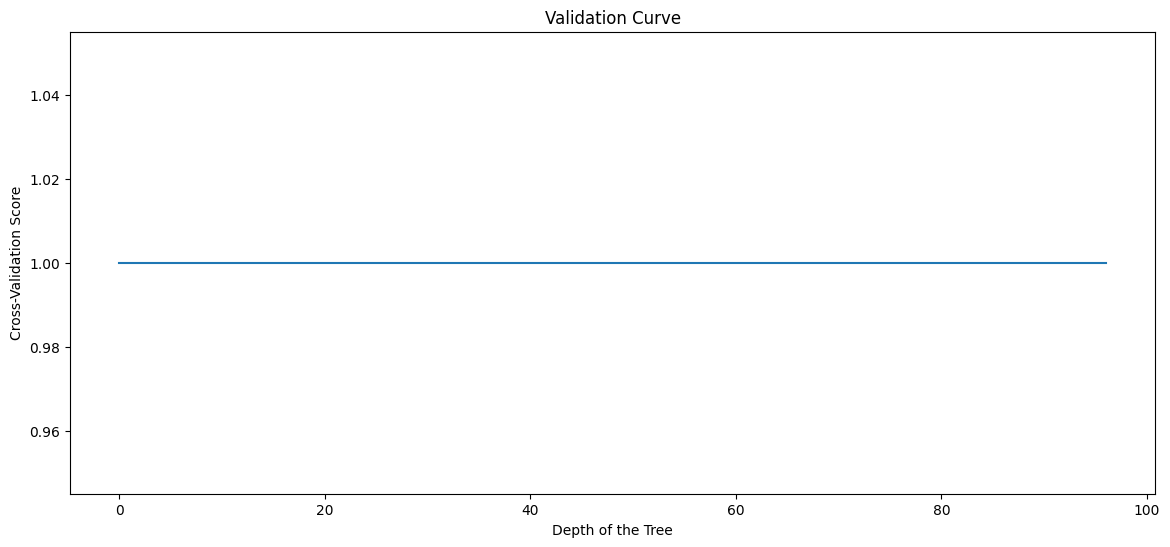

In [140]:
val_score = []
for k in np.arange(3, 100):
    score = cross_val_score(DecisionTreeClassifier(max_depth=k, random_state=42), X_train_resampled, y_train_resampled,
                            cv=StratifiedKFold(4), scoring="roc_auc").mean()
    val_score.append(score)

plt.figure(figsize=(14, 6))
plt.plot(val_score)
plt.xlabel("Depth of the Tree")
plt.ylabel("Cross-Validation Score")
plt.title("Validation Curve")
plt.show()

In [141]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'C': np.logspace(-4, 4, 50),
    'penalty': ['l2']  
}

scoring_metric = {'F1': 'f1_samples', 'ROC': 'roc_auc'}

log_reg = LogisticRegression(random_state=42)  # Define the logistic regression estimator

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=stratified_kfold,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 1.0
Test score: 1.0


In [142]:
grid_search.best_estimator_

LogisticRegression(C=0.0001, random_state=42)

In [143]:
grid_search.best_params_, grid_search.best_score_

({'C': 0.0001, 'penalty': 'l2'}, 1.0)

In [144]:
print(f'The best parameters are: {grid_search.best_params_}')
print(f'Best score is: {grid_search.best_score_}')

The best parameters are: {'C': 0.0001, 'penalty': 'l2'}
Best score is: 1.0


In [145]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Fit the pipeline
pipeline.fit(X_train, y_train)

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:, 1])

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\n Predicted values')
    ax.set_ylabel('current values')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



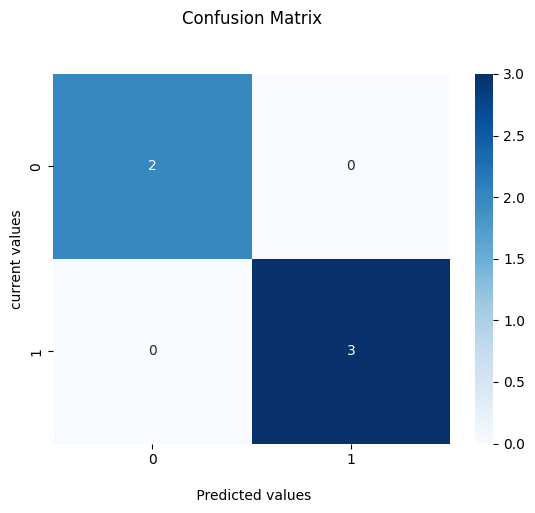

In [146]:
# Call calculate_metrics after fitting the pipeline
calculate_metrics(pipeline, 'Decision Tree - Pipeline', X_test, y_test)

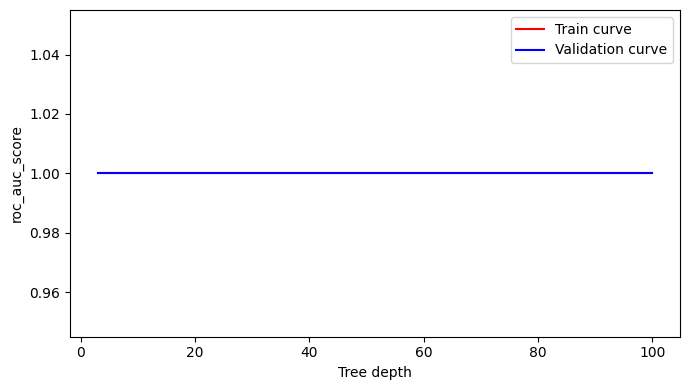

In [147]:
# cross-validation curves
from sklearn.model_selection import validation_curve

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Cross-validation curves
param_range = [3, 4, 5, 7, 10, 100]

train_score, val_score = validation_curve(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=stratified_kfold,
    scoring="roc_auc",
    n_jobs=-1,
    param_name="clf__max_depth",
    param_range=param_range
)

# Calculation of the mean and the standard deviation of the training data
train_scores_mean = np.mean(train_score, axis=1)

# Calculation of the mean and standard deviation of the test data
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize=(7, 4))
plt.plot(param_range, train_scores_mean, label="Train curve", color='r')
plt.plot(param_range, test_scores_mean, label="Validation curve", color='blue')
plt.legend()
plt.ylabel('roc_auc_score')
plt.xlabel("Tree depth")
plt.tight_layout()
plt.show()

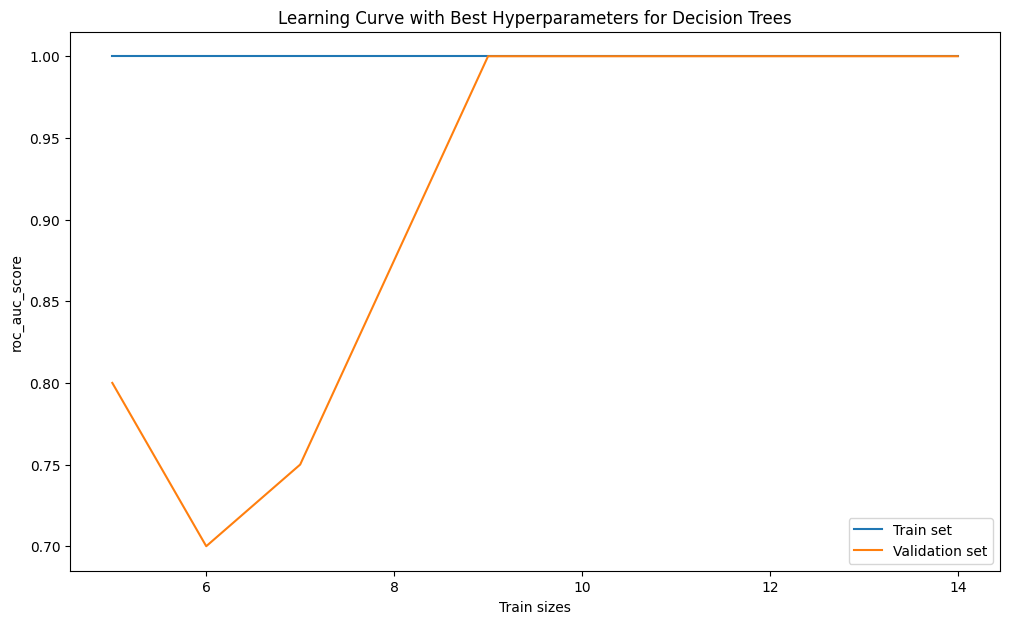

In [148]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(max_depth=5, random_state=42, criterion='entropy'),
    X_train, y_train,
    train_sizes=np.linspace(0.2, 1.0, 10),
    cv=stratified_kfold,
    scoring='roc_auc',
    n_jobs=-1
)

plt.figure(figsize=(12, 7))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train set')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation set')
plt.xlabel('Train sizes')
plt.ylabel('roc_auc_score')
plt.title("Learning Curve with Best Hyperparameters for Decision Trees")
plt.legend()
plt.show()

### 4.2 Logistic Regression

In [149]:
log_reg = pipeline_function(LogisticRegression(random_state=42))
log_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('feature_select',
                                                                   SelectKBest(k='all'))]),
                                                  ['days', 'madrs1', 'madrs2']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder()),
                                                                  ('selector',
                                                                   VarianceThreshold(threshold=0.23))]),
                                                  ['...
                                                   'marriage_single',
                                                   'melanch_mode_No '
                                                   'melancholia',
                                                   'melanch_mode_melancholia',
                                                   'edu_frequent_primary',
                                                   'edu_frequent_secondary',
                                                   'edu_frequent_tertiary',
                                                   'depression_Mild Depression',
                                                   'depression_Moderate '
                                                   'Depression'])])),
                ('smote', SMOTE(random_state=42)), ('pca', PCA(n_components=2)),
                ('estimator',
                 RFE(estimator=LogisticRegression(random_state=42),
                     n_features_to_select=5))])

In [150]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.pipeline import Pipeline

# Convert X_train and X_test to compatible data type (e.g., float)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# Define the steps in the imbalanced pipeline
steps = [
    ('sampling', SMOTE(random_state=42, k_neighbors=3)),
    ('classification', LogisticRegression(random_state=42))
]

# Define the parameter grid
param_grid = {
    'sampling__k_neighbors': [3, 5, 7],
    'classification__C': [0.1, 1, 10]
}

# Create the imbalanced pipeline using imblearn.pipeline.Pipeline
pipeline = Pipeline(steps)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict the classes for the training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate performance metrics
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create the performance evaluation table
performance_table = pd.DataFrame({
    'Metric': ['AUC', 'F1'],
    'Training Set': [train_auc, train_f1],
    'Test Set': [test_auc, test_f1]
})

# Display the performance evaluation table
print(performance_table)

  Metric  Training Set  Test Set
0    AUC           1.0       1.0
1     F1           1.0       1.0


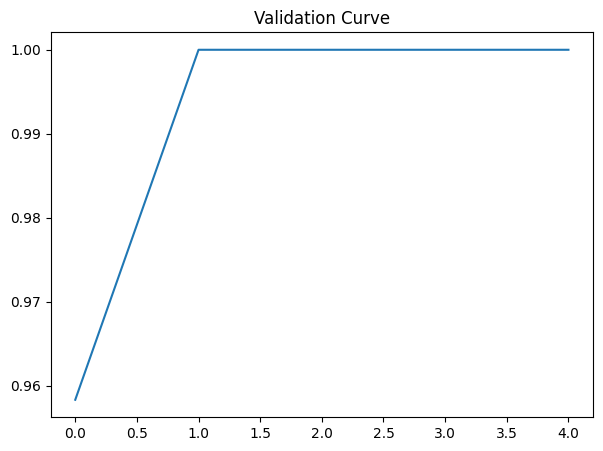

In [151]:
# Calculate validation scores for different values of k in StratifiedKFold
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(pipeline, X_train, y_train, cv=StratifiedKFold(k), scoring="roc_auc").mean()
    val_score.append(score)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.plot(val_score)
plt.title("Validation Curve")
plt.show()


In [152]:
log_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__categorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__imputer', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__imputer__add_indicator', 'preprocessor__numeric_preprocessing__imputer__copy', 'preprocessor__numeric_preprocessing__imputer__keep_empty_features', 'preprocessor__numeric_preprocessing__imputer__metric', 'preprocessor__numeric_preprocessing__imputer__missing_values', 'preprocessor__

In [153]:
# Create StratifiedKFold object for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=stratified_kfold,
    n_jobs=-1
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best cross-validation score and test score
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

# Print the scores
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 1.0
Test score: 1.0


In [154]:
#best hyperparameters and best score
grid_search.best_params_, grid_search.best_score_

({'classification__C': 0.1, 'sampling__k_neighbors': 3}, 1.0)

In [155]:
print(f'The best parameters are: {grid_search.best_params_}')
print(f'Best score is: {grid_search.best_score_}')

The best parameters are: {'classification__C': 0.1, 'sampling__k_neighbors': 3}
Best score is: 1.0


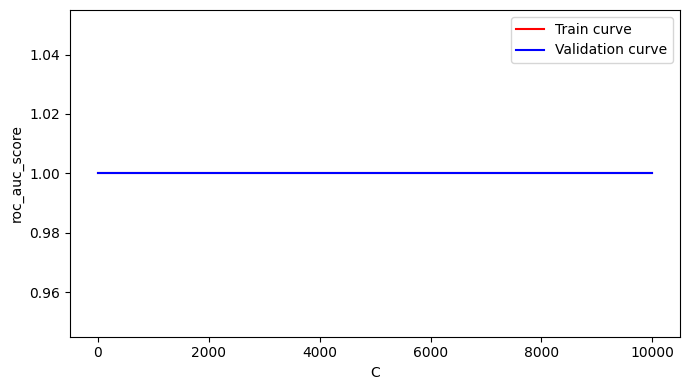

In [156]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X_train, y_train,
    train_sizes=np.linspace(0.2, 1.0, 10),
    cv=stratified_kfold,
    scoring="accuracy",
    n_jobs=-1
)

# Cross-validation curves
param_range = np.logspace(-4, 4, 50)

train_score, val_score = validation_curve(
    pipeline, X_train, y_train,
    cv=stratified_kfold,
    scoring="roc_auc",
    n_jobs=-1,
    param_name="classification__C",
    param_range=param_range
)

# Calculate mean and standard deviation of training data
train_scores_mean = np.mean(train_score, axis=1)

# Calculate mean and standard deviation of test data
test_scores_mean = np.mean(val_score, axis=1)

# Plot cross-validation curves
plt.subplots(1, figsize=(7, 4))
plt.plot(param_range, train_scores_mean, label="Train curve", color='r')
plt.plot(param_range, test_scores_mean, label="Validation curve", color='blue')
plt.legend()
plt.ylabel('roc_auc_score')
plt.xlabel('C')
plt.tight_layout()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



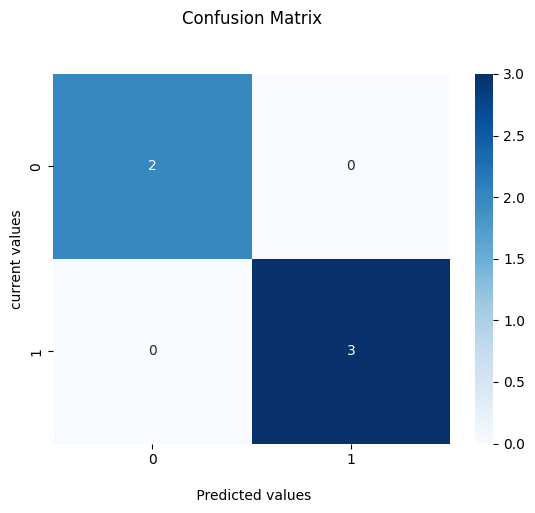

In [157]:
# Calculate metrics and plot confusion matrix
calculate_metrics(pipeline, 'Logistic Regression - Pipeline', X_test, y_test)

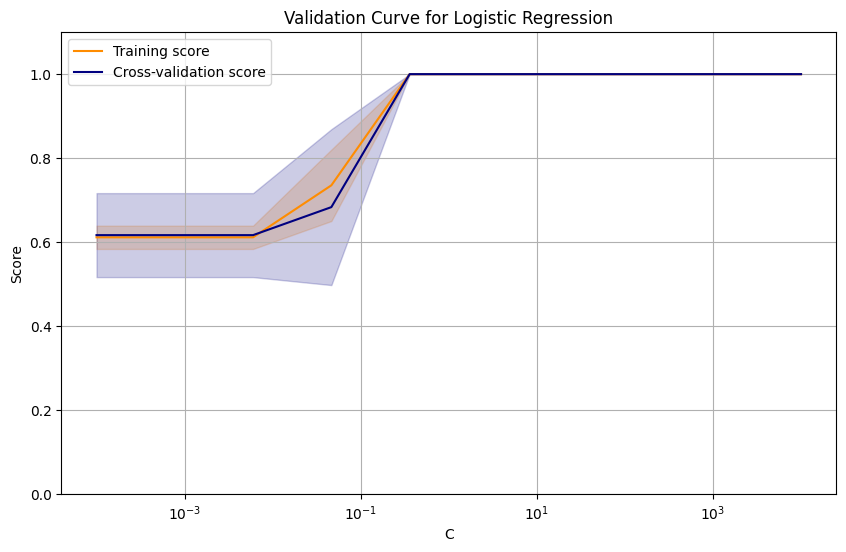

In [158]:
# Define the range of hyperparameters
param_range = np.logspace(-4, 4, 10)

# Calculate training and validation scores for different hyperparameter values
train_scores, val_scores = validation_curve(
    LogisticRegression(penalty='l2', random_state=42),
    X_train, y_train,
    param_name="C",
    param_range=param_range,
    cv=stratified_kfold,
    scoring="accuracy",
    n_jobs=-1
)

# Calculate mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Logistic Regression")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
plt.semilogx(param_range, val_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

### 4.3 SVM

In [159]:
from sklearn.svm import SVC
svc = pipeline_function(SVC(kernel='rbf', random_state=42))
svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('feature_select',
                                                                   SelectKBest(k='all'))]),
                                                  ['days', 'madrs1', 'madrs2']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder()),
                                                                  ('selector',
                                                                   VarianceThreshold(threshold=0.23))]),
                                                  ['...
                                                   'marriage_single',
                                                   'melanch_mode_No '
                                                   'melancholia',
                                                   'melanch_mode_melancholia',
                                                   'edu_frequent_primary',
                                                   'edu_frequent_secondary',
                                                   'edu_frequent_tertiary',
                                                   'depression_Mild Depression',
                                                   'depression_Moderate '
                                                   'Depression'])])),
                ('smote', SMOTE(random_state=42)), ('pca', PCA(n_components=2)),
                ('estimator',
                 RFE(estimator=SVC(random_state=42), n_features_to_select=5))])

In [160]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

# Create and fit the SVC classifier
svc = SVC(C=1.0, kernel='rbf', random_state=42)
svc.fit(X_train, y_train)

# Predict classes on the training and test sets
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Calculate performance metrics
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create the performance evaluation table
performance_table = pd.DataFrame({
    'Metric': ['AUC', 'F1'],
    'Training Set': [train_auc, train_f1],
    'Test Set': [test_auc, test_f1]
})

# Display the performance evaluation table
print(performance_table)

  Metric  Training Set  Test Set
0    AUC           1.0       1.0
1     F1           1.0       1.0


The best score is: nan


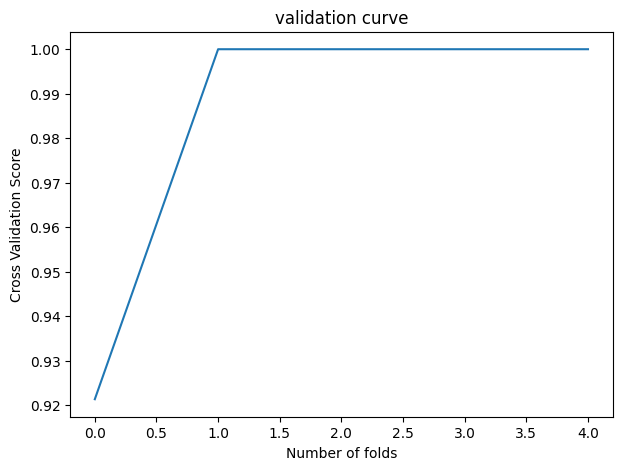

In [161]:
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(svc, X_train, y_train,
                         cv=StratifiedKFold(k), scoring="roc_auc").mean()
    val_score.append(score)

print(f'The best score is: {np.max(val_score)}')
plt. figure(figsize=(7, 5))
plt.plot(val_score)
plt.xlabel("Number of folds")
plt.ylabel("Cross Validation Score")
plt.title("validation curve");

In [162]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [163]:
# Define the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 50),
    'kernel': ['rbf', 'linear', 'poly']
}

# Create and fit the SVM classifier
svm = SVC(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=stratified_kfold,
    n_jobs=-1
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best hyperparameters: {best_params}\nBest score: {best_score}')

Best hyperparameters: {'C': 0.0001, 'kernel': 'rbf'}
Best score: 1.0


In [164]:
#best hyperparameters and best score
grid_search.best_params_, grid_search.best_score_

({'C': 0.0001, 'kernel': 'rbf'}, 1.0)

In [165]:
print(f'The best parameters are: {grid_search.best_params_}')
print(f'Best score is: {grid_search.best_score_}')

The best parameters are: {'C': 0.0001, 'kernel': 'rbf'}
Best score is: 1.0


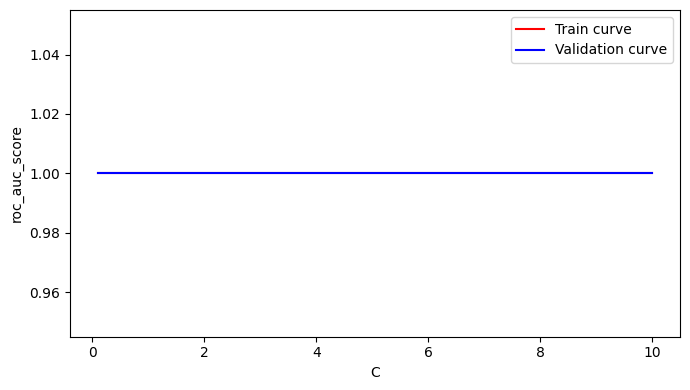

In [166]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Create and fit the SVM classifier
svm = SVC(C=1.0, kernel='rbf', random_state=42, probability=True)  # Set probability parameter to True
svm.fit(X_train, y_train)

# Cross-validation curves
param_range = [0.1, 1, 10]

train_score, val_score = validation_curve(
    estimator=svm,
    X=X_train,
    y=y_train,
    cv=stratified_kfold,
    scoring="roc_auc",
    n_jobs=-1,
    param_name="C",
    param_range=param_range
)

# Calculation of the mean and standard deviation of the training data
train_scores_mean = np.mean(train_score, axis=1)

# Calculation of the mean and standard deviation of the test data
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize=(7, 4))
plt.plot(param_range, train_scores_mean, label="Train curve", color='r')
plt.plot(param_range, test_scores_mean, label="Validation curve", color='blue')
plt.legend()
plt.ylabel('roc_auc_score')
plt.xlabel("C")
plt.tight_layout()
plt.show()

In [167]:
# Predict classes on the training and test sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate performance metrics
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display performance metrics and confusion matrices
print("Training Set - AUC: {:.4f}, F1: {:.4f}".format(train_auc, train_f1))
print("Test Set - AUC: {:.4f}, F1: {:.4f}".format(test_auc, test_f1))

print("Training Set Confusion Matrix:")
print(train_cm)
print("Test Set Confusion Matrix:")
print(test_cm)

Training Set - AUC: 1.0000, F1: 1.0000
Test Set - AUC: 1.0000, F1: 1.0000
Training Set Confusion Matrix:
[[ 7  0]
 [ 0 11]]
Test Set Confusion Matrix:
[[2 0]
 [0 3]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



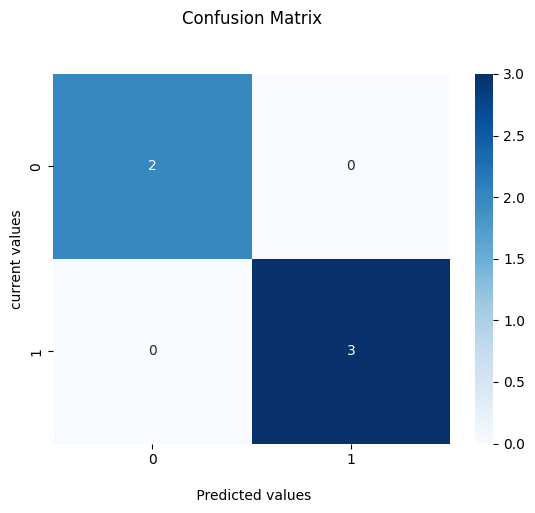

In [168]:
# Calculate metrics and plot confusion matrix
calculate_metrics(svm, 'SVM Classifier - Pipeline', X_test, y_test)

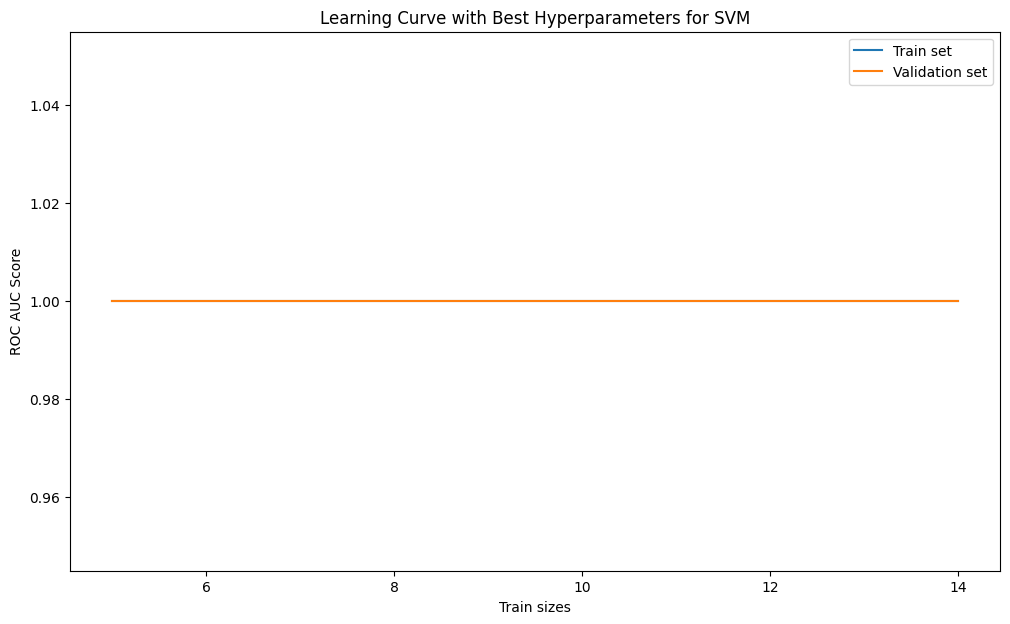

In [169]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Create and fit the SVM classifier
svm = SVC(C=1.0, kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Compute learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    svm, X_train, y_train, train_sizes=np.linspace(0.2, 1.0, 10),
    cv=stratified_kfold, scoring='roc_auc', n_jobs=-1
)

# Calculate mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(12, 7))
plt.plot(train_sizes, train_scores_mean, label='Train set')
plt.plot(train_sizes, val_scores_mean, label='Validation set')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Train sizes')
plt.ylabel('ROC AUC Score')
plt.title("Learning Curve with Best Hyperparameters for SVM")
plt.legend()
plt.show()

### 4.4 Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score
import pandas as pd

# Create and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict classes on the training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate performance metrics
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Create the performance evaluation table
performance_table = pd.DataFrame({
    'Metric': ['AUC', 'F1'],
    'Training Set': [train_auc, train_f1],
    'Test Set': [test_auc, test_f1]
})

# Display the performance evaluation table
print(performance_table)

  Metric  Training Set  Test Set
0    AUC           1.0       1.0
1     F1           1.0       1.0


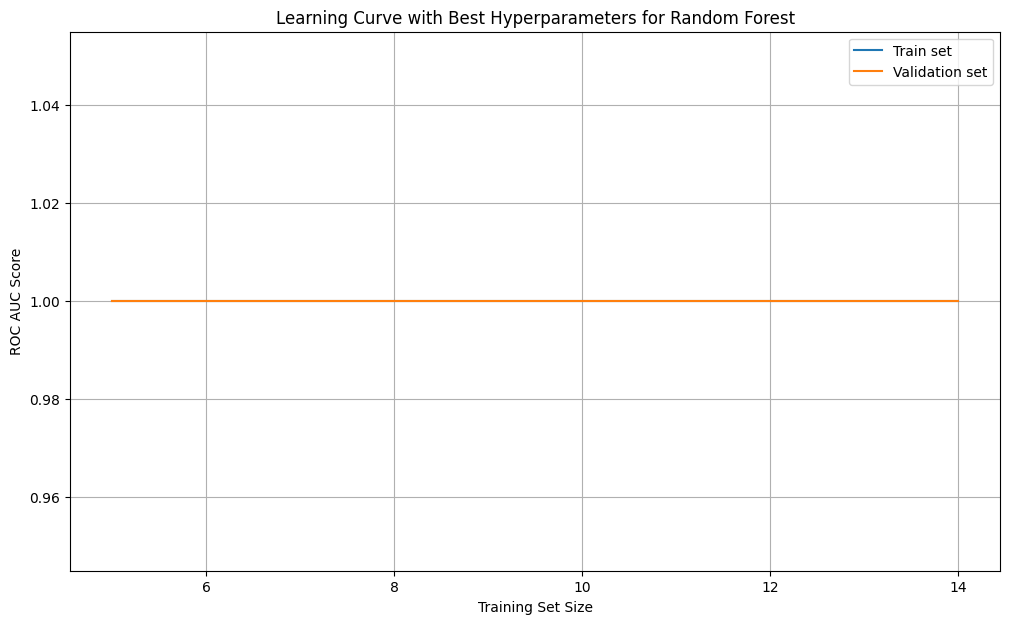

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Calculate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    rf,
    X_train,
    y_train,
    train_sizes=np.linspace(0.2, 1.0, 10),
    cv=stratified_kfold,
    scoring='roc_auc',
    n_jobs=-1
)

# Calculate the mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 7))
plt.plot(train_sizes, train_scores_mean, label='Train set')
plt.plot(train_sizes, val_scores_mean, label='Validation set')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('ROC AUC Score')
plt.title('Learning Curve with Best Hyperparameters for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

When using a random forest, some parameters are essential to optimize for good model performance. Here are the most important parameters to consider:

- `n_estimators`: This is the number of decision trees in the random forest. Increasing this number can improve model performance, but it also increases computation time.

- `max_depth`: This is the maximum depth of each decision tree. A higher value allows the tree to learn more complex relationships in the data, but it can also lead to overfitting. It is important to strike a balance to avoid overfitting.

- `min_samples_split`: This parameter defines the minimum number of samples required to split a node. A higher value can lead to simpler trees and avoid overfitting, but it can also lead to underrepresentation of information in the data.

It is recommended that you use optimization techniques such as grid search (GridSearch) or random search (RandomizedSearch) to explore different combinations of these parameters and find the ones that provide the best performance for your specific problem.

In [172]:
Decision_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__categorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__imputer', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__imputer__add_indicator', 'preprocessor__numeric_preprocessing__imputer__copy', 'preprocessor__numeric_preprocessing__imputer__keep_empty_features', 'preprocessor__numeric_preprocessing__imputer__metric', 'preprocessor__numeric_preprocessing__imputer__missing_values', 'preprocessor__

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = [
    {
        'svc__kernel': ['rbf', 'linear'],
        'svc__C': [0.001, 0.01, 0.1, 1.0, 10.0],
        'svc__gamma': [0.001, 0.01, 0.1, 1.0, 10.0],
        'svc__cache_size': [400],
        'pca__n_components': list(range(1, 3, 1))
    }
]

scoring_metric = {'F1': 'f1_samples', 'ROC': 'roc_auc'}

pipeline = Pipeline([
    ('pca', PCA()),
    ('svc', SVC(random_state=42))
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=stratified_kfold,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 1.0
Test score: 1.0


In [174]:
grid_search.best_params_, grid_search.best_score_

({'pca__n_components': 1,
  'svc__C': 0.001,
  'svc__cache_size': 400,
  'svc__gamma': 0.001,
  'svc__kernel': 'rbf'},
 1.0)

In [175]:
print(f'The best parameters are: {grid_search.best_params_}')
print(f'Best score is: {grid_search.best_score_}')

The best parameters are: {'pca__n_components': 1, 'svc__C': 0.001, 'svc__cache_size': 400, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best score is: 1.0


In [176]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



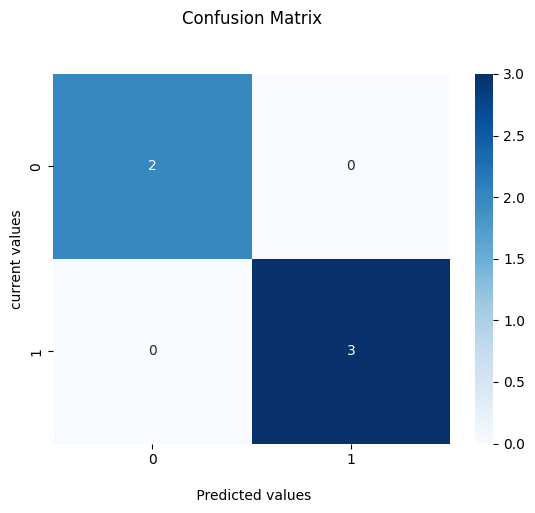

In [177]:
#confusion matrix
calculate_metrics(random_forest, 'Random Forest - Pipeline', X_test, y_test)

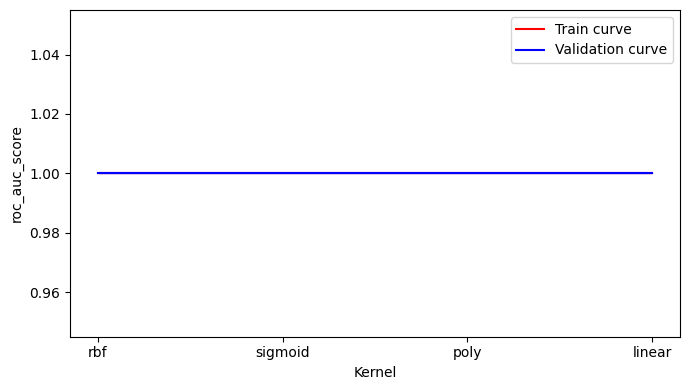

In [178]:
# Cross-validation curves

# Define the parameter range
param_range = ['rbf', 'sigmoid', 'poly', 'linear']

# Compute the validation curve
train_scores, val_scores = validation_curve(svc, X_train, y_train,
                                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                            scoring="roc_auc",
                                            param_name="kernel",
                                            param_range=param_range)

# Calculate mean and standard deviation of training data
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test data
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 4))
plt.plot(param_range, train_scores_mean, label="Train curve", color='r')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.plot(param_range, val_scores_mean, label="Validation curve", color='blue')
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2, color='blue')
plt.legend()
plt.ylabel('roc_auc_score')
plt.xlabel('Kernel')
plt.tight_layout()
plt.show()

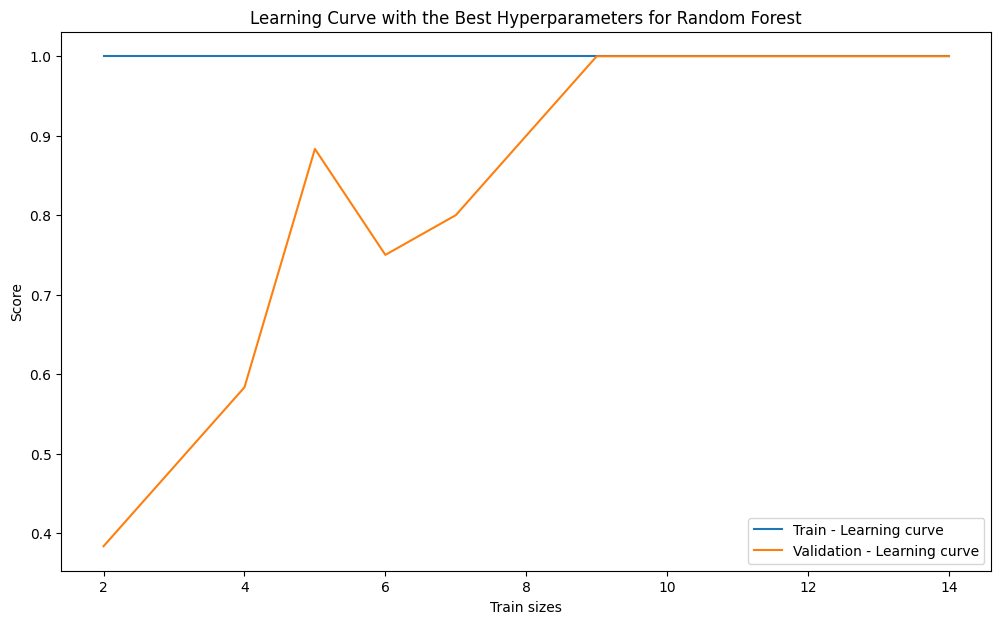

In [179]:
# Define the Random Forest classifier with desired hyperparameters
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=10, oob_score=True, random_state=42)

# Compute the learning curve
n, train_scores, val_scores = learning_curve(classifier, X_train, y_train,
                                             train_sizes=np.linspace(0.2, 1.0, 10),
                                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Plot the learning curve
plt.subplots(1, figsize=(12, 7))
plt.plot(n, train_scores.mean(axis=1), label='Train - Learning curve')
plt.plot(n, val_scores.mean(axis=1), label='Validation - Learning curve')
plt.xlabel('Train sizes')
plt.ylabel('Score')
plt.title("Learning Curve with the Best Hyperparameters for Random Forest")
plt.legend()
plt.show()

### 4.5 XGBoost

In [180]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the training and test sets
train_predictions = xgb_classifier.predict(X_train)
test_predictions = xgb_classifier.predict(X_test)

# Calculate metrics for the training set
train_auc = roc_auc_score(y_train, train_predictions)
train_f1_score = f1_score(y_train, train_predictions)

# Calculate metrics for the test set
test_auc = roc_auc_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)

# Create the performance evaluation DataFrame
performance_df = pd.DataFrame(
    {
        "Métrique": ["AUC", "F1 Score"],
        "Ensemble d'entraînement": [train_auc, train_f1_score],
        "Ensemble de test": [test_auc, test_f1_score],
    }
)

# Display the performance evaluation DataFrame
print(performance_df.to_string(index=False))

Métrique  Ensemble d'entraînement  Ensemble de test
     AUC                      1.0               1.0
F1 Score                      1.0               1.0


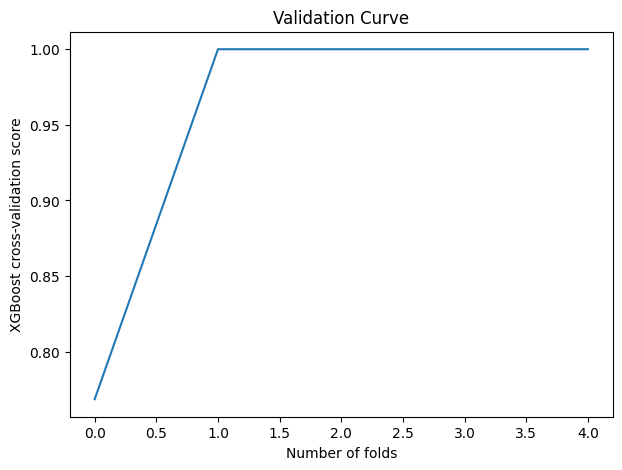

In [181]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb

# Define the XGBoost classifier
xgboost = xgb.XGBClassifier()

# Calculate validation scores for different values of k in StratifiedKFold
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(xgboost, X_train, y_train, cv=StratifiedKFold(k), scoring='roc_auc').mean()
    val_score.append(score)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.plot(val_score)
plt.xlabel("Number of folds")
plt.ylabel("XGBoost cross-validation score")
plt.title("Validation Curve")
plt.show()

In [182]:
xgboost.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [183]:
# Create the pipeline
pipeline = Pipeline([
    ('pca', PCA()),
    ('estimator', XGBClassifier(random_state=42))
])

# Definition of the parameters to be optimized
param_grid = {
    'estimator__max_depth': [3, 4, 5, 7, 8],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__n_estimators': [100, 200, 300, 500, 1000],
    'pca__n_components': list(range(1, 3))
}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

xgboost.fit(X_train, y_train)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 1.0
Test score: 1.0


In [184]:
grid_search.best_params_, grid_search.best_score_ 

({'estimator__learning_rate': 0.01,
  'estimator__max_depth': 3,
  'estimator__n_estimators': 100,
  'pca__n_components': 1},
 1.0)

In [185]:
print(f'The best parameters are: {grid_search.best_params_}')
print(f'Best score is: {grid_search.best_score_}')

The best parameters are: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 100, 'pca__n_components': 1}
Best score is: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



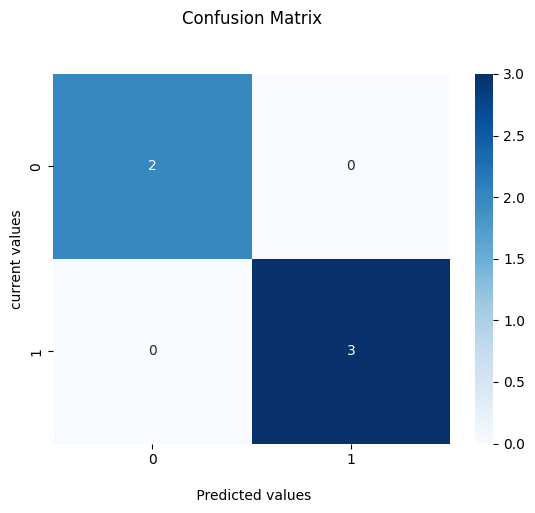

In [186]:
#confusion matrix
calculate_metrics(xgboost, 'XGBoost - Pipeline', X_test, y_test)

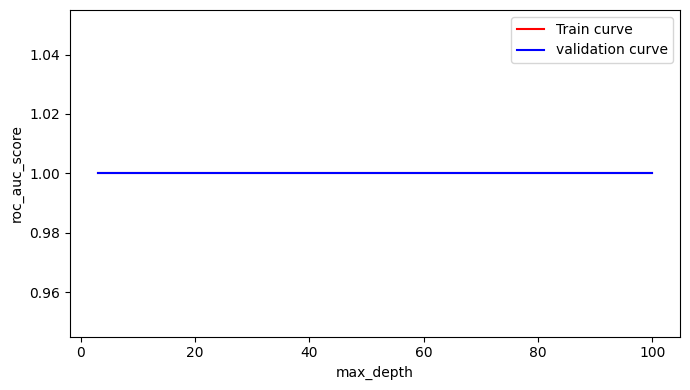

In [187]:
# cross-validation curves
param_range=[3, 4, 5, 7, 10, 100]

train_score, val_score = validation_curve(xgboost, X_train, y_train,
                                          cv=stratified_kfold, 
                                          scoring="roc_auc",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__max_depth", 
                                          param_range=param_range)

#calcul de la moyenne et de l'ecart type des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.legend()
plt.ylabel('roc_auc_score')
plt.xlabel('max_depth')
plt.tight_layout();

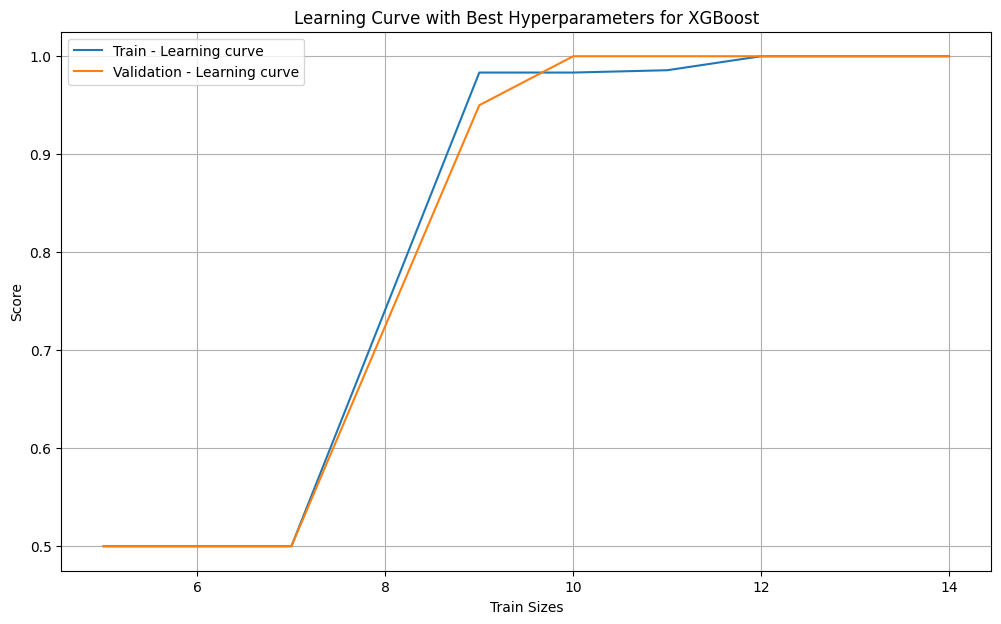

In [188]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, random_state=42),
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.2, 1.0, 10),
    cv=stratified_kfold,
    scoring='roc_auc',
    n_jobs=-1
)

plt.subplots(1, figsize=(12, 7))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train - Learning curve')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation - Learning curve')
plt.xlabel('Train Sizes')
plt.ylabel('Score')
plt.title("Learning Curve with Best Hyperparameters for XGBoost")
plt.legend()
plt.grid(True)
plt.show()